In [41]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import time
from tqdm import tqdm
import gsd.hoomd
from matplotlib import cm
from matplotlib.colors import Normalize


In [42]:
import sys
import os

# Absolute path to your module's directory
module_path = os.path.abspath('/localscratch/zippoema/git/HPA/src/')
if module_path not in sys.path:
    sys.path.insert(0, module_path)

import hpa.rates as hpar  # Now this should work

In [43]:
plt.style.use('default')
plt.style.use('/localscratch/zippoema/md_plots/rates_plot.mplstyle')

In [52]:
path_CAL = '/localscratch/zippoema/zippo_phd_data_bckp/project_hps_phospho_tdp43_natcomm_bckp/single-tdp43/data_CALVADOS3/'
path_new = '/media/zippoema/Elements/zippo_phd_data/new_data/'
path_no = '/localscratch/zippoema/project_ness/simulations/no_pser_mass_method/200-tdp43_CAL3/'
path_single = '/localscratch/zippoema/project_ness/simulations/single-tdp43_CAL3_masspSer/'
path_drop = '/localscratch/zippoema/project_ness/simulations/droplet_200-tdp43-lcd/'
path_slab = '/localscratch/zippoema/project_ness/simulations/slab_200-tdp43-lcd/'
path_struct = '/localscratch/zippoema/project_ness/simulations/condensate_structure/'
path_drop_an = '/localscratch/zippoema/project_ness/analysis/droplet_200-tdp43-lcd/'
path_slab_an = '/localscratch/zippoema/project_ness/analysis/slab_200-tdp43-lcd/'
path_struct_an = '/localscratch/zippoema/project_ness/analysis/condensate_structure/'
path_drop_pl = '/localscratch/zippoema/project_ness/plots/droplet_200-tdp43-lcd/'
path_slab_pl = '/localscratch/zippoema/project_ness/plots/slab_200-tdp43-lcd/'
path_struct_pl = '/localscratch/zippoema/project_ness/plots/condensate_structure/'
path_work = '/localscratch/zippoema/working_dir/'
path_plot = '/localscratch/zippoema/project_ness/plots/'

In [45]:
ser_i = np.array([266, 273, 292, 305, 317, 332, 333, 342, 347, 350, 369, 373, 375, 377, 379, 387, 389, 393, 395, 403, 404, 407, 409, 410])-260-1 
ser_i_full = ser_i+121 
ser_i_equi = np.linspace(8, 146, 24, dtype=int)
n_ser = len(ser_i)
ser_i

array([  5,  12,  31,  44,  56,  71,  72,  81,  86,  89, 108, 112, 114,
       116, 118, 126, 128, 132, 134, 142, 143, 146, 148, 149])

In [46]:
ser_typeid = np.loadtxt('/localscratch/zippoema/git/hoomd3_phosphorylation/input_stats/CA_TDP-43_human.pdb', dtype=str, skiprows=1, max_rows=414)

ser_i_full_tdp43 = np.where(ser_typeid[:,3]=='SER')[0]
ser_i_full_tdp43

array([  1,  19,  28,  47,  90,  91, 103, 124, 143, 162, 179, 182, 189,
       211, 241, 253, 257, 265, 272, 291, 304, 316, 331, 332, 341, 346,
       349, 368, 372, 374, 376, 378, 386, 388, 392, 394, 402, 403, 406,
       408, 409])

In [49]:
def linear(x, a,b):
    return a*x+b

## Test MC kinetic

In [7]:
rp_MC_kin, drp_MC_kin = hpar.estimator_rate_single_exponential(dirpath='/localscratch/zippoema/project_ness/simulations/single-tdp43_CAL3_MC_kin/sims_sh_CAL3_MC_kin/',
                                                 file_suffix='sh_tdp43-lcd_com-ck1d-open_CAL3_MC_kin_contacts.txt',
                                                 ser_l=ser_i, n_sims=20, max_time=2*10**8)
rp_MC_kin *= 10**8      # units \mu s^-1
drp_MC_kin *= 10**8

rp_mpser, drp_mpser = hpar.estimator_rate_single_exponential(dirpath='/localscratch/zippoema/project_ness/simulations/single-tdp43_CAL3_masspSer/sims_sh_CAL3_mpSer_rs/',
                                                 file_suffix='sh_tdp43-lcd_com-ck1d-open_CAL3_mpSer_rs_contacts.txt',
                                                 ser_l=ser_i, n_sims=20, max_time=2*10**8)
rp_mpser *= 10**8      # units \mu s^-1
drp_mpser *= 10**8


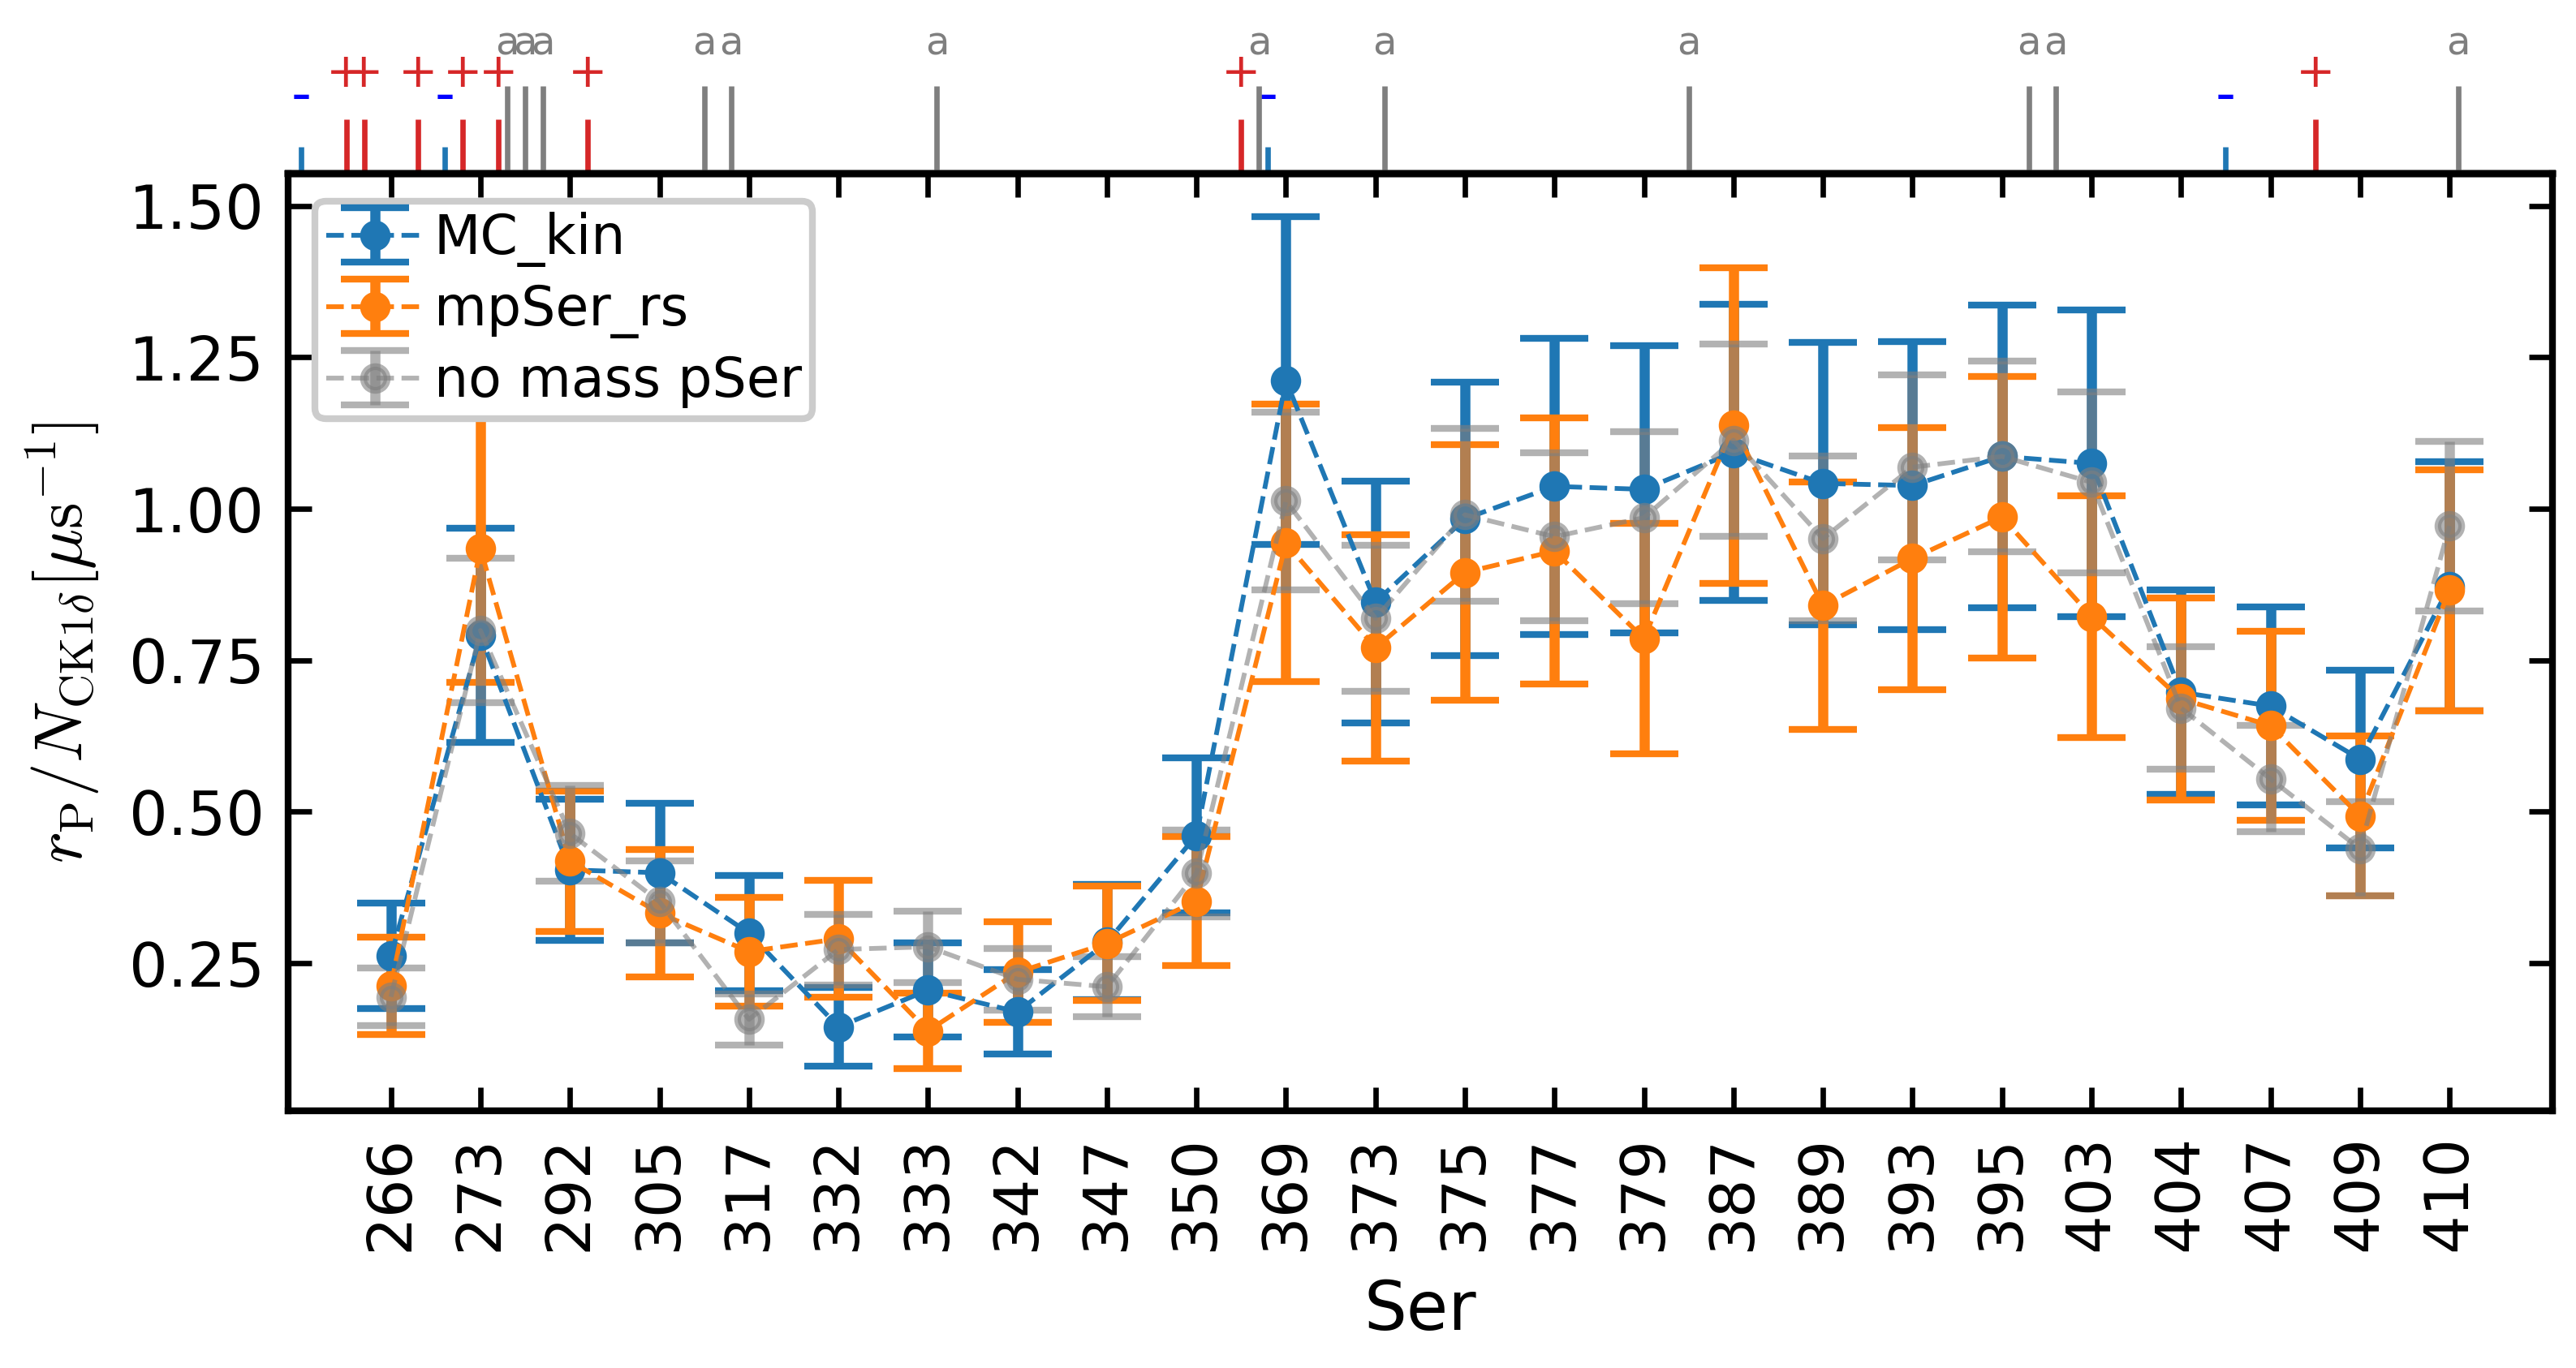

In [11]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp_MC_kin, drp_MC_kin, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"MC_kin")
ax1.errorbar(np.arange(1,25), rp_mpser, drp_mpser, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"mpSer_rs")
ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:grey', alpha=0.6, elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"no mass pSer")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')

plt.savefig('/localscratch/zippoema/project_ness/plots/rates_MC_test_1-tdp43-lcd_1-com-ck1d-open_dmu-48.png', dpi=1200)

## CK1d + TDP-43 LCD, no mass pser method

In [27]:
rp_no, drp_no = hpar.estimator_rate_single_exponential(dirpath=path_CAL+'sim_sh_network_ck1d/', file_suffix='ck1d_tdp43_CALVADOS3_network_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=50, max_time=2*10**8)
rp_no *= 10**8      # units \mu s^-1
drp_no *= 10**8

rp_f_no, drp_f_no = hpar.estimator_rate_single_exponential(dirpath=path_CAL+'sim_sh_network_full_ck1d/', file_suffix='full-ck1d_tdp43_CALVADOS3_network_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=50, max_time=2*10**8)
rp_f_no *= 10**8      # units \mu s^-1
drp_f_no *= 10**8

In [10]:
rc, drc = hpar.count_contacts(dirpath=path_CAL+'sim_np_network_ck1d/', file_suffix='ck1d_tdp43_CALVADOS3_network_np_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=5)
rc /= 10      # units \mu s^-1
drc/= 10

rc_f, drc_f = hpar.count_contacts(dirpath=path_CAL+'sim_np_network_full_ck1d/', file_suffix='full-ck1d_tdp43_CALVADOS3_network_np_b30_250K_contacts.txt',
                                                  ser_l=ser_i, n_sims=5)
rc_f /= 10      # units \mu s^-1
drc_f /= 10

In [14]:
rp_f_ps328ps331_no, drp_f_ps328ps331_no = hpar.estimator_rate_single_exponential(dirpath=path_pfull+'sim_ph_tdp43-lcd_pS328pS331-full-ck1d-open/', 
                                                                           file_suffix='tdp43-lcd_com-pS328pS331-full-ck1d-open_ph_CAL3_contacts.txt',
                                                                           ser_l=ser_i, n_sims=20, max_time=2*10**8)
rp_f_ps328ps331_no *= 10**8       # units \mu s^-1
drp_f_ps328ps331_no *= 10**8 

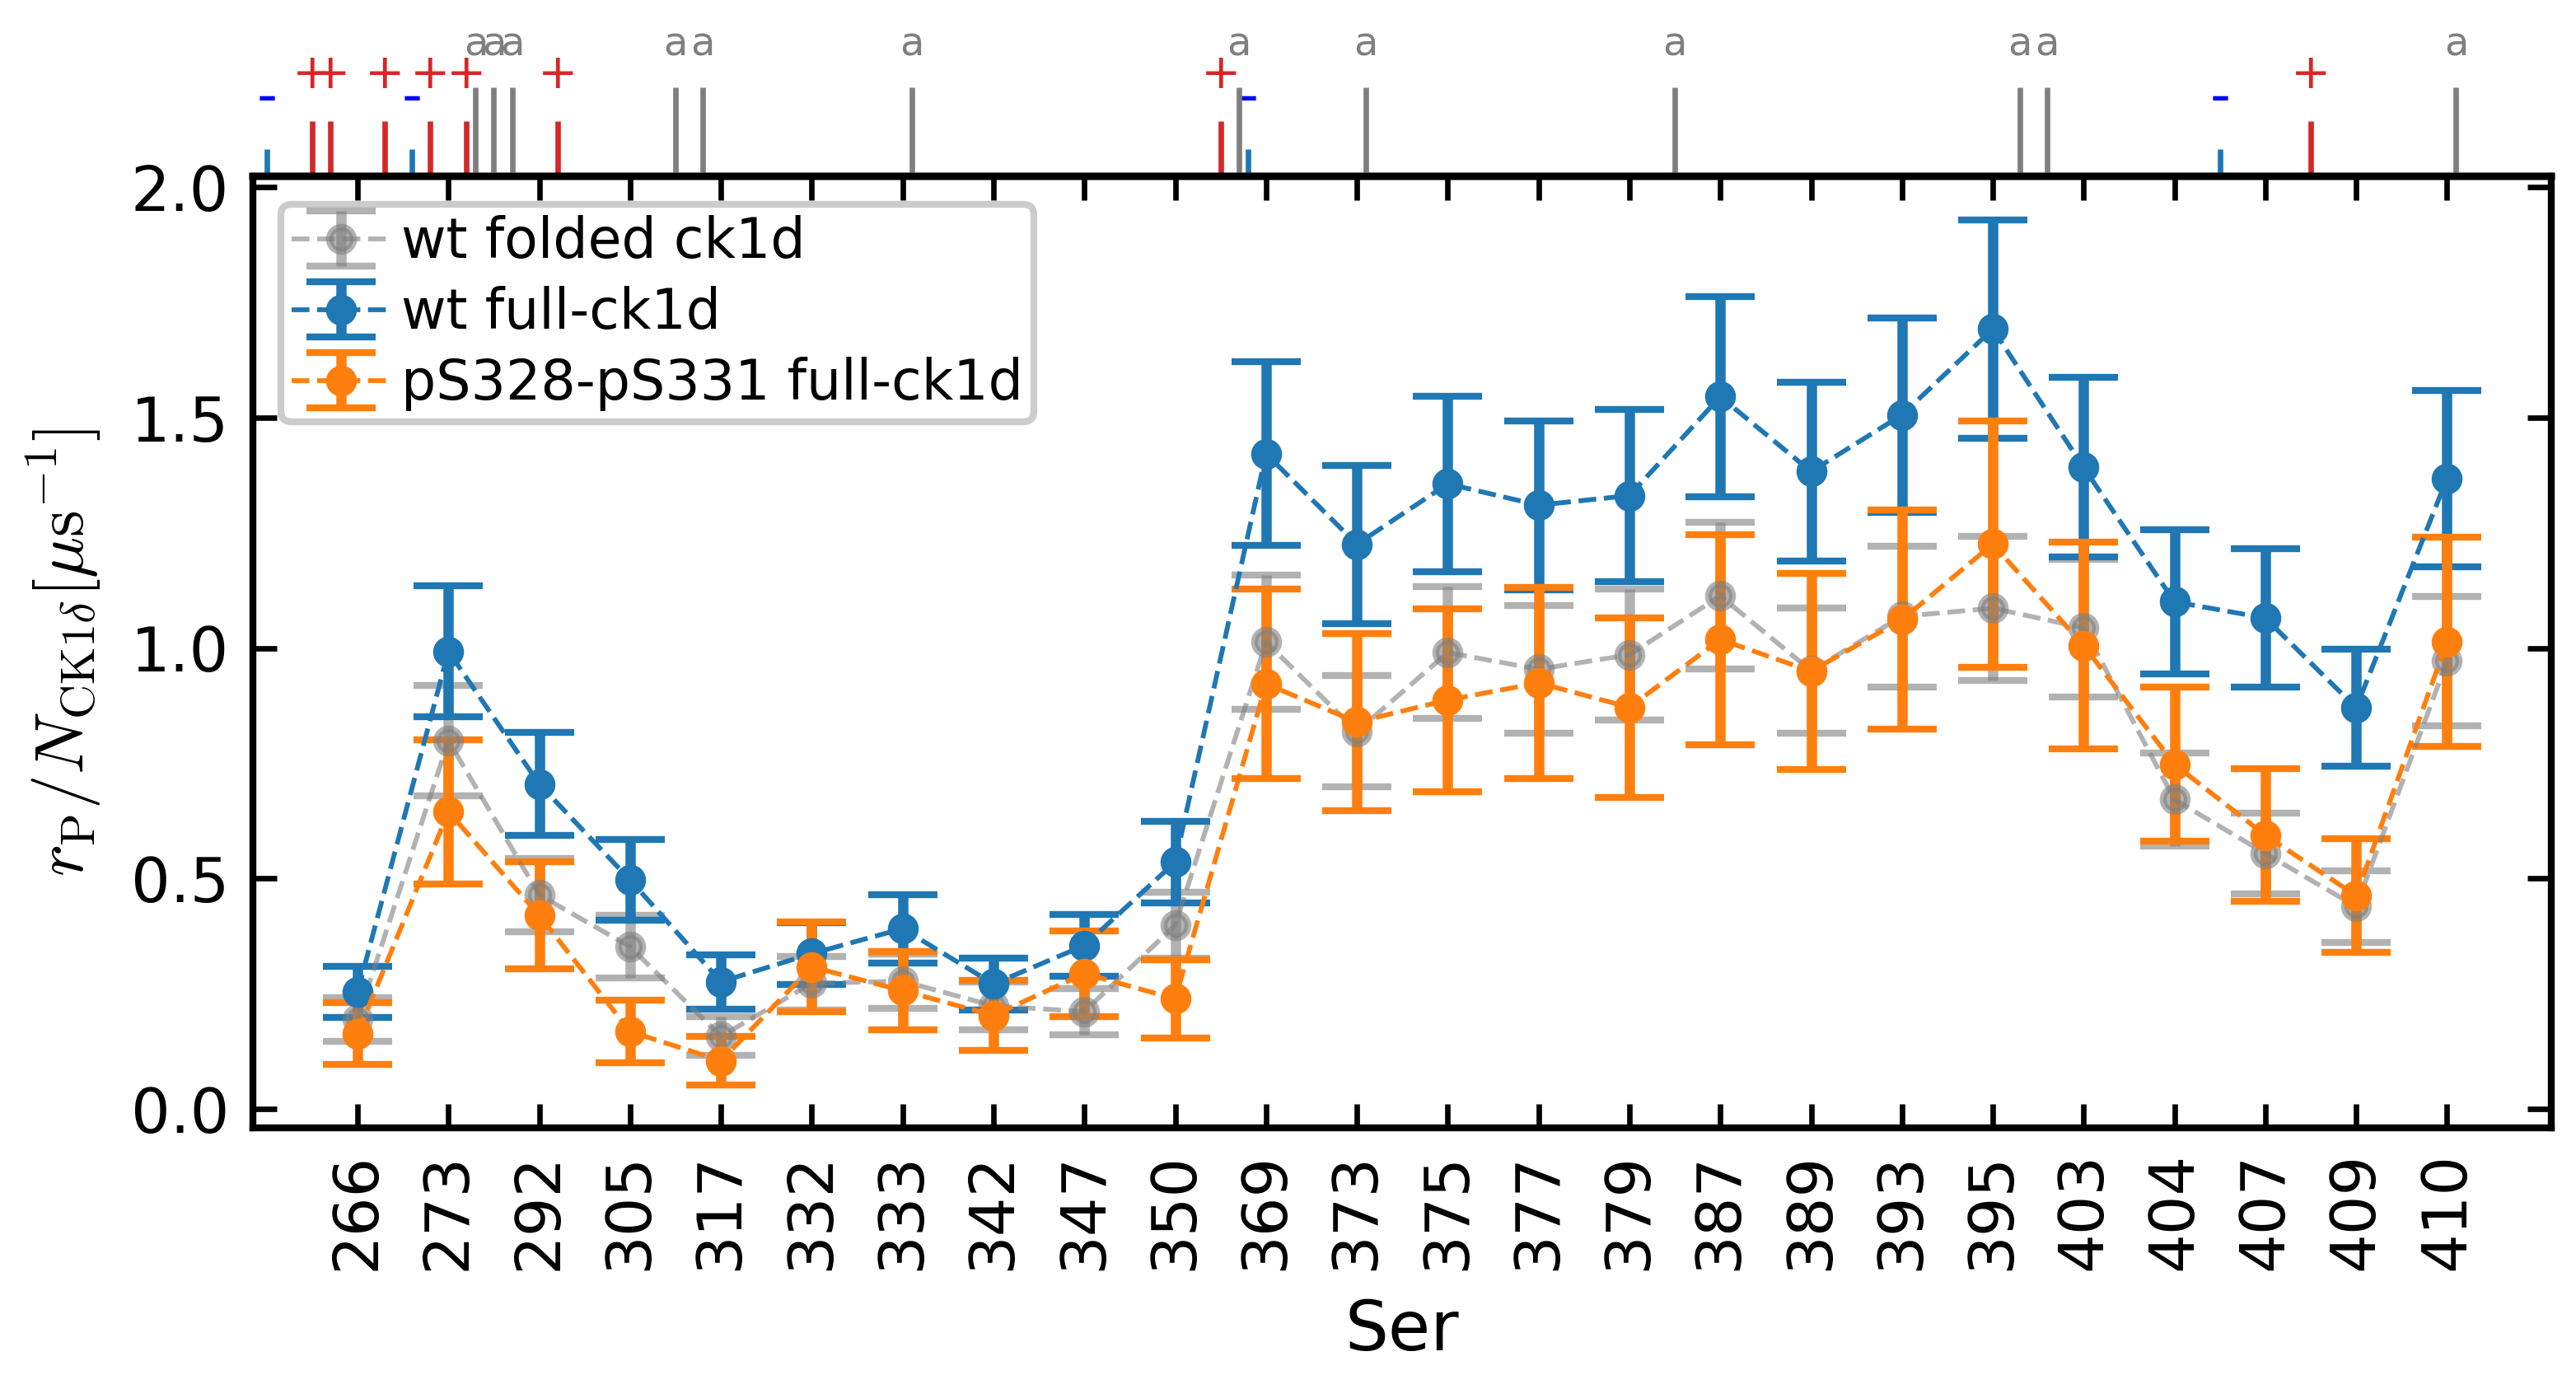

In [40]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp_no, drp_no, fmt='.--', color='tab:grey', alpha=0.6, elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"wt folded ck1d")
ax1.errorbar(np.arange(1,25), rp_f_no, drp_f_no, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"wt full-ck1d")
ax1.errorbar(np.arange(1,25), rp_f_ps328ps331_no, drp_f_ps328ps331_no, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"pS328-pS331 full-ck1d")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

## CK1d + full TDP-43

In [7]:
rp, drp = hpar.estimator_rate_single_exponential(dirpath=path_single+'sims_sh_1-tdp43-lcd_1-ck1d-open_CAL3_mpSer_rs/', 
                                                 file_suffix='sh_tdp43-lcd_com-ck1d-open_CAL3_mpSer_rs_contacts.txt',
                                                 ser_l=ser_i, n_sims=20, max_time=2*10**8)
rp *= 10**8      # units \mu s^-1
drp *= 10**8

rp_ftdp, drp_ftdp = hpar.estimator_rate_single_exponential(dirpath=path_single+'sims_sh_1-full-tdp43_1-ck1d-open_CAL3_mpSer_rs/', 
                                                           file_suffix='1-com-full-tdp43_1-com-ck1d-open_CAL3_contacts.txt',
                                                           ser_l=ser_i_full_tdp43, n_sims=10, max_time=2*10**8)
rp_ftdp *= 10**8      # units \mu s^-1
drp_ftdp *= 10**8


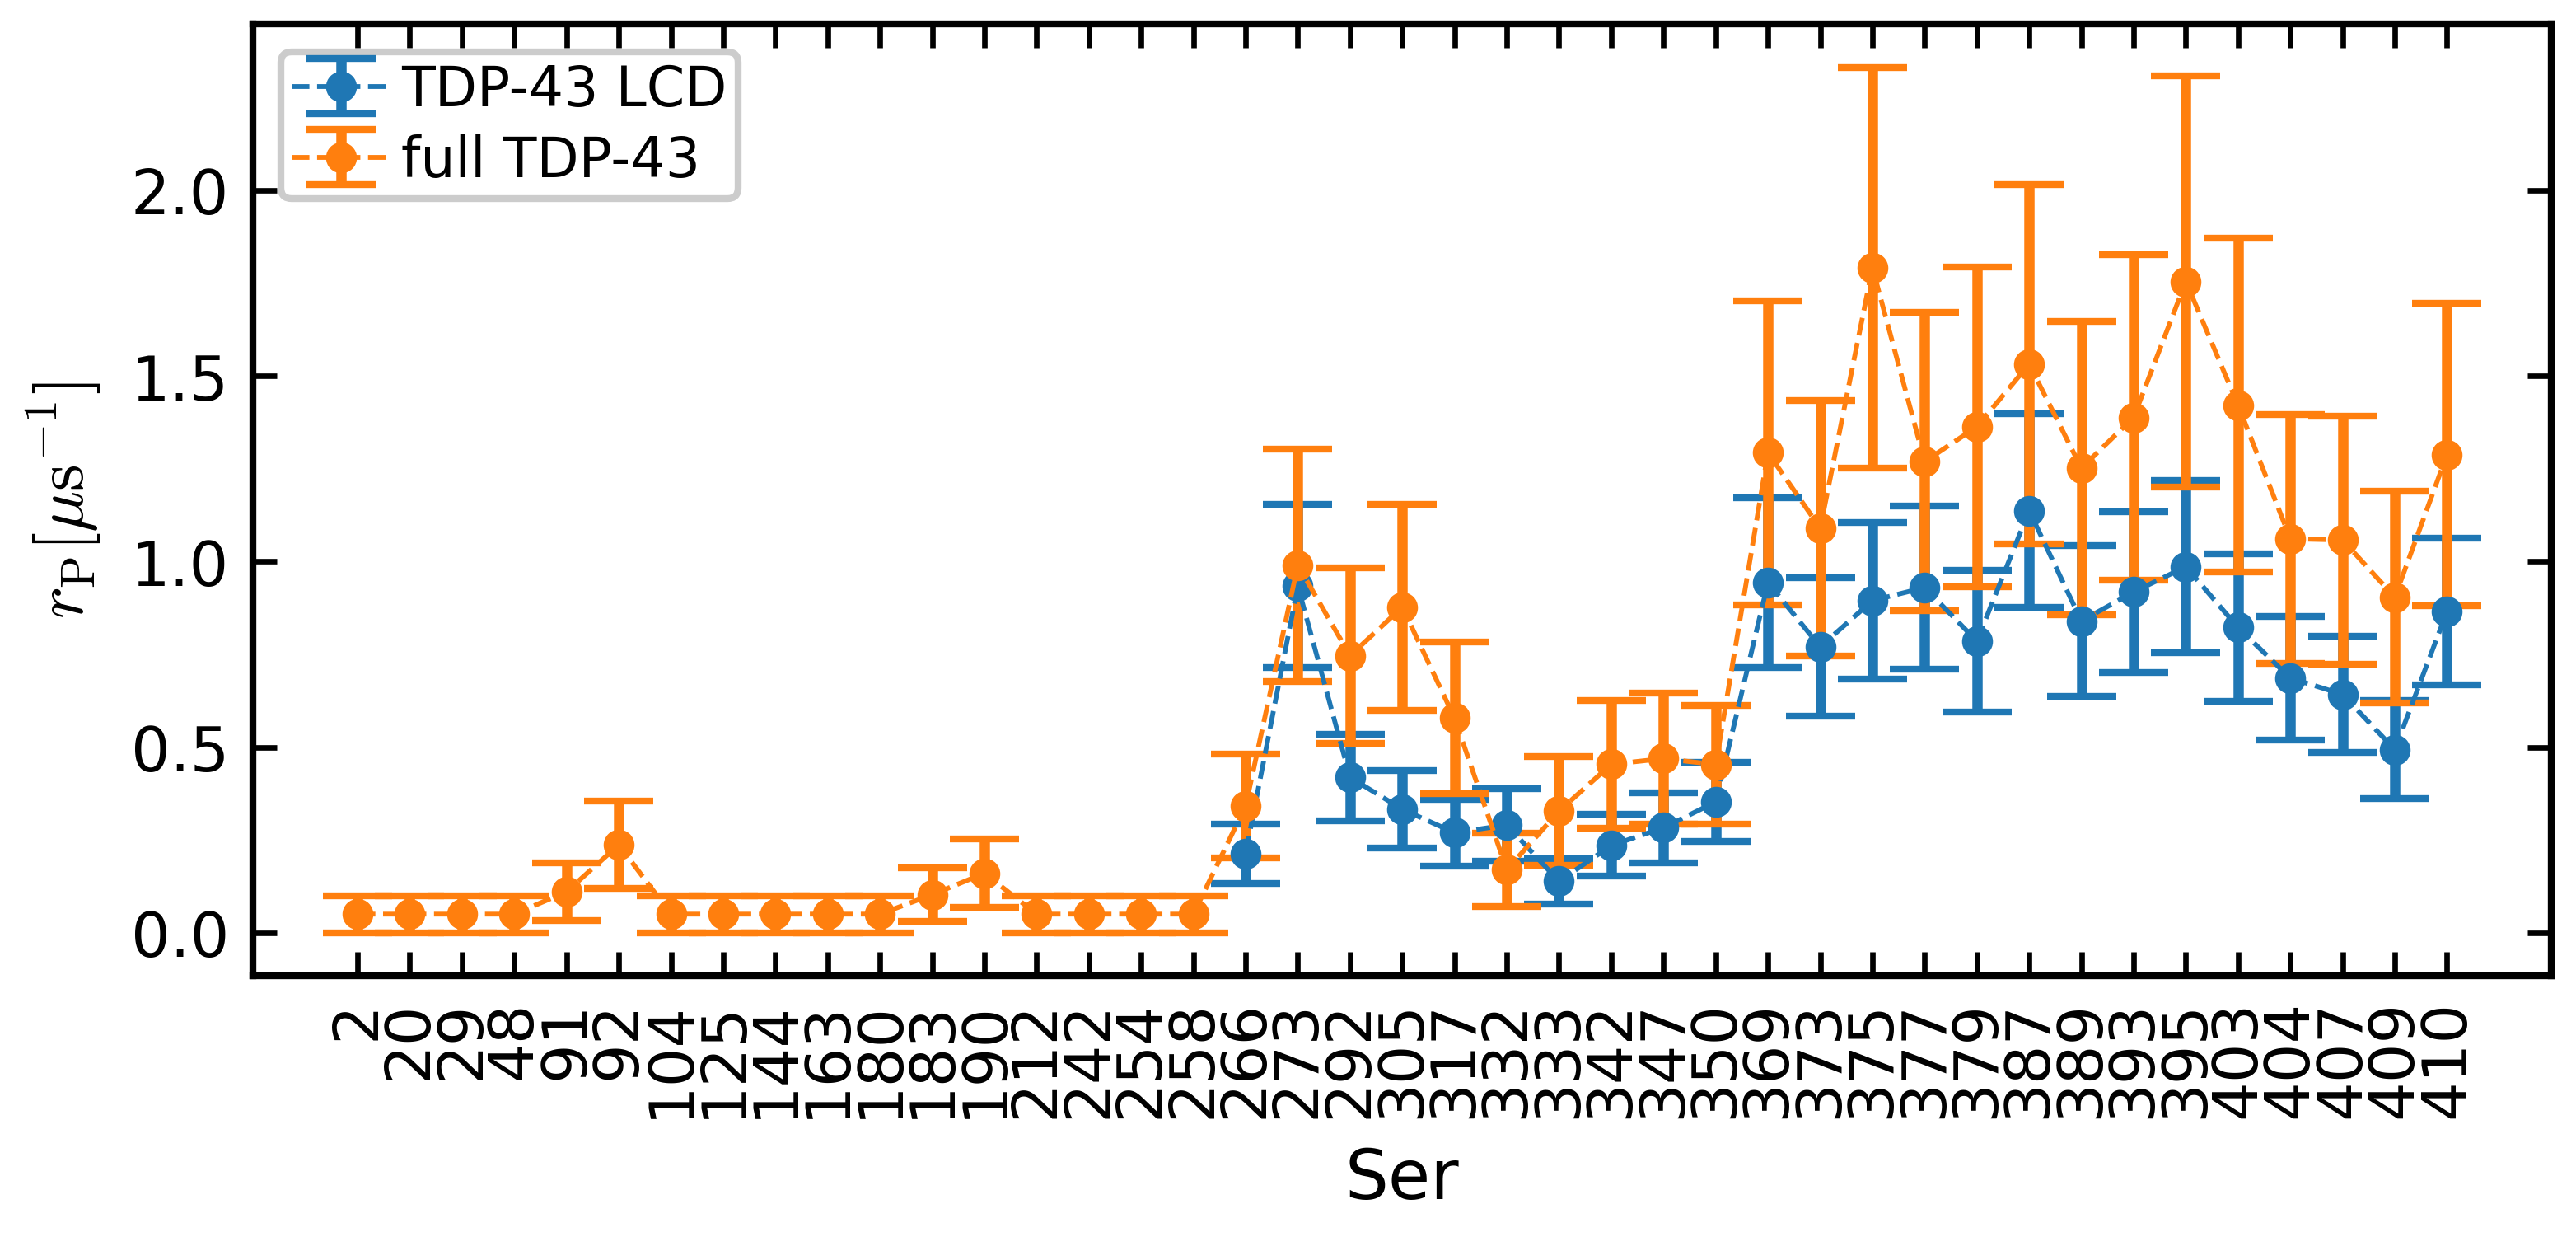

In [11]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(len(ser_i_full_tdp43)-len(ser_i),len(ser_i_full_tdp43))+1, rp, drp, fmt='.--', 
             color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"TDP-43 LCD")
ax1.errorbar(np.arange(len(ser_i_full_tdp43))+1, rp_ftdp, drp_ftdp, fmt='.--', color='tab:orange', 
             elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"full TDP-43")
'''
secax = ax1.secondary_xaxis('top')
secax.set_xticks(np.array([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5])+(len(ser_i_full_tdp43)-len(ser_i)), 
                 ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks(np.array([0., 1.6, 10.8, 21.5])+(len(ser_i_full_tdp43)-len(ser_i)), 
                  ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks(np.array([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1])+(len(ser_i_full_tdp43)-len(ser_i)),
                  ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)
'''

plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(len(ser_i_full_tdp43))+1 , ser_i_full_tdp43+1, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}} [\mathrm{\mu s}^{-1}]$')
#plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')

filename = path_plot+'single-tdp43_rates/rates_tdp43-lcd_full-tdp43_CAL3_mpSer_rs'
plt.savefig(filename+'.png', dpi=600)
plt.savefig(filename+'.pdf', dpi=600)

## 150 full-length TDP-43, 5 CK1d

In [35]:
rp_150tdp, drp_150tdp = hpar.count_contacts(dirpath=path_struct+'phospho-dephospho/sim_slab_150-full-tdp43_5-ck1d-open_dmu-48/', 
                                            file_suffix='slab_150-full-tdp43-375pser_5-com-ck1d-open_dmu-48_CAL3_contacts.txt',
                                            ser_l=ser_i_full_tdp43, n_sims=1, type_of_contact=1, len_prot=414, n_prot=150, end=0.5*10**8)
rp_150tdp /= 5.  # \mu s
drp_150tdp/= 5.  # \mu s


/localscratch/zippoema/git/HPA/src/hpa/rates.py:327: RuntimeWarning: invalid value encountered in divide
  count_err = np.std(counts, axis=0)/np.sqrt(len(sims_list)-1)


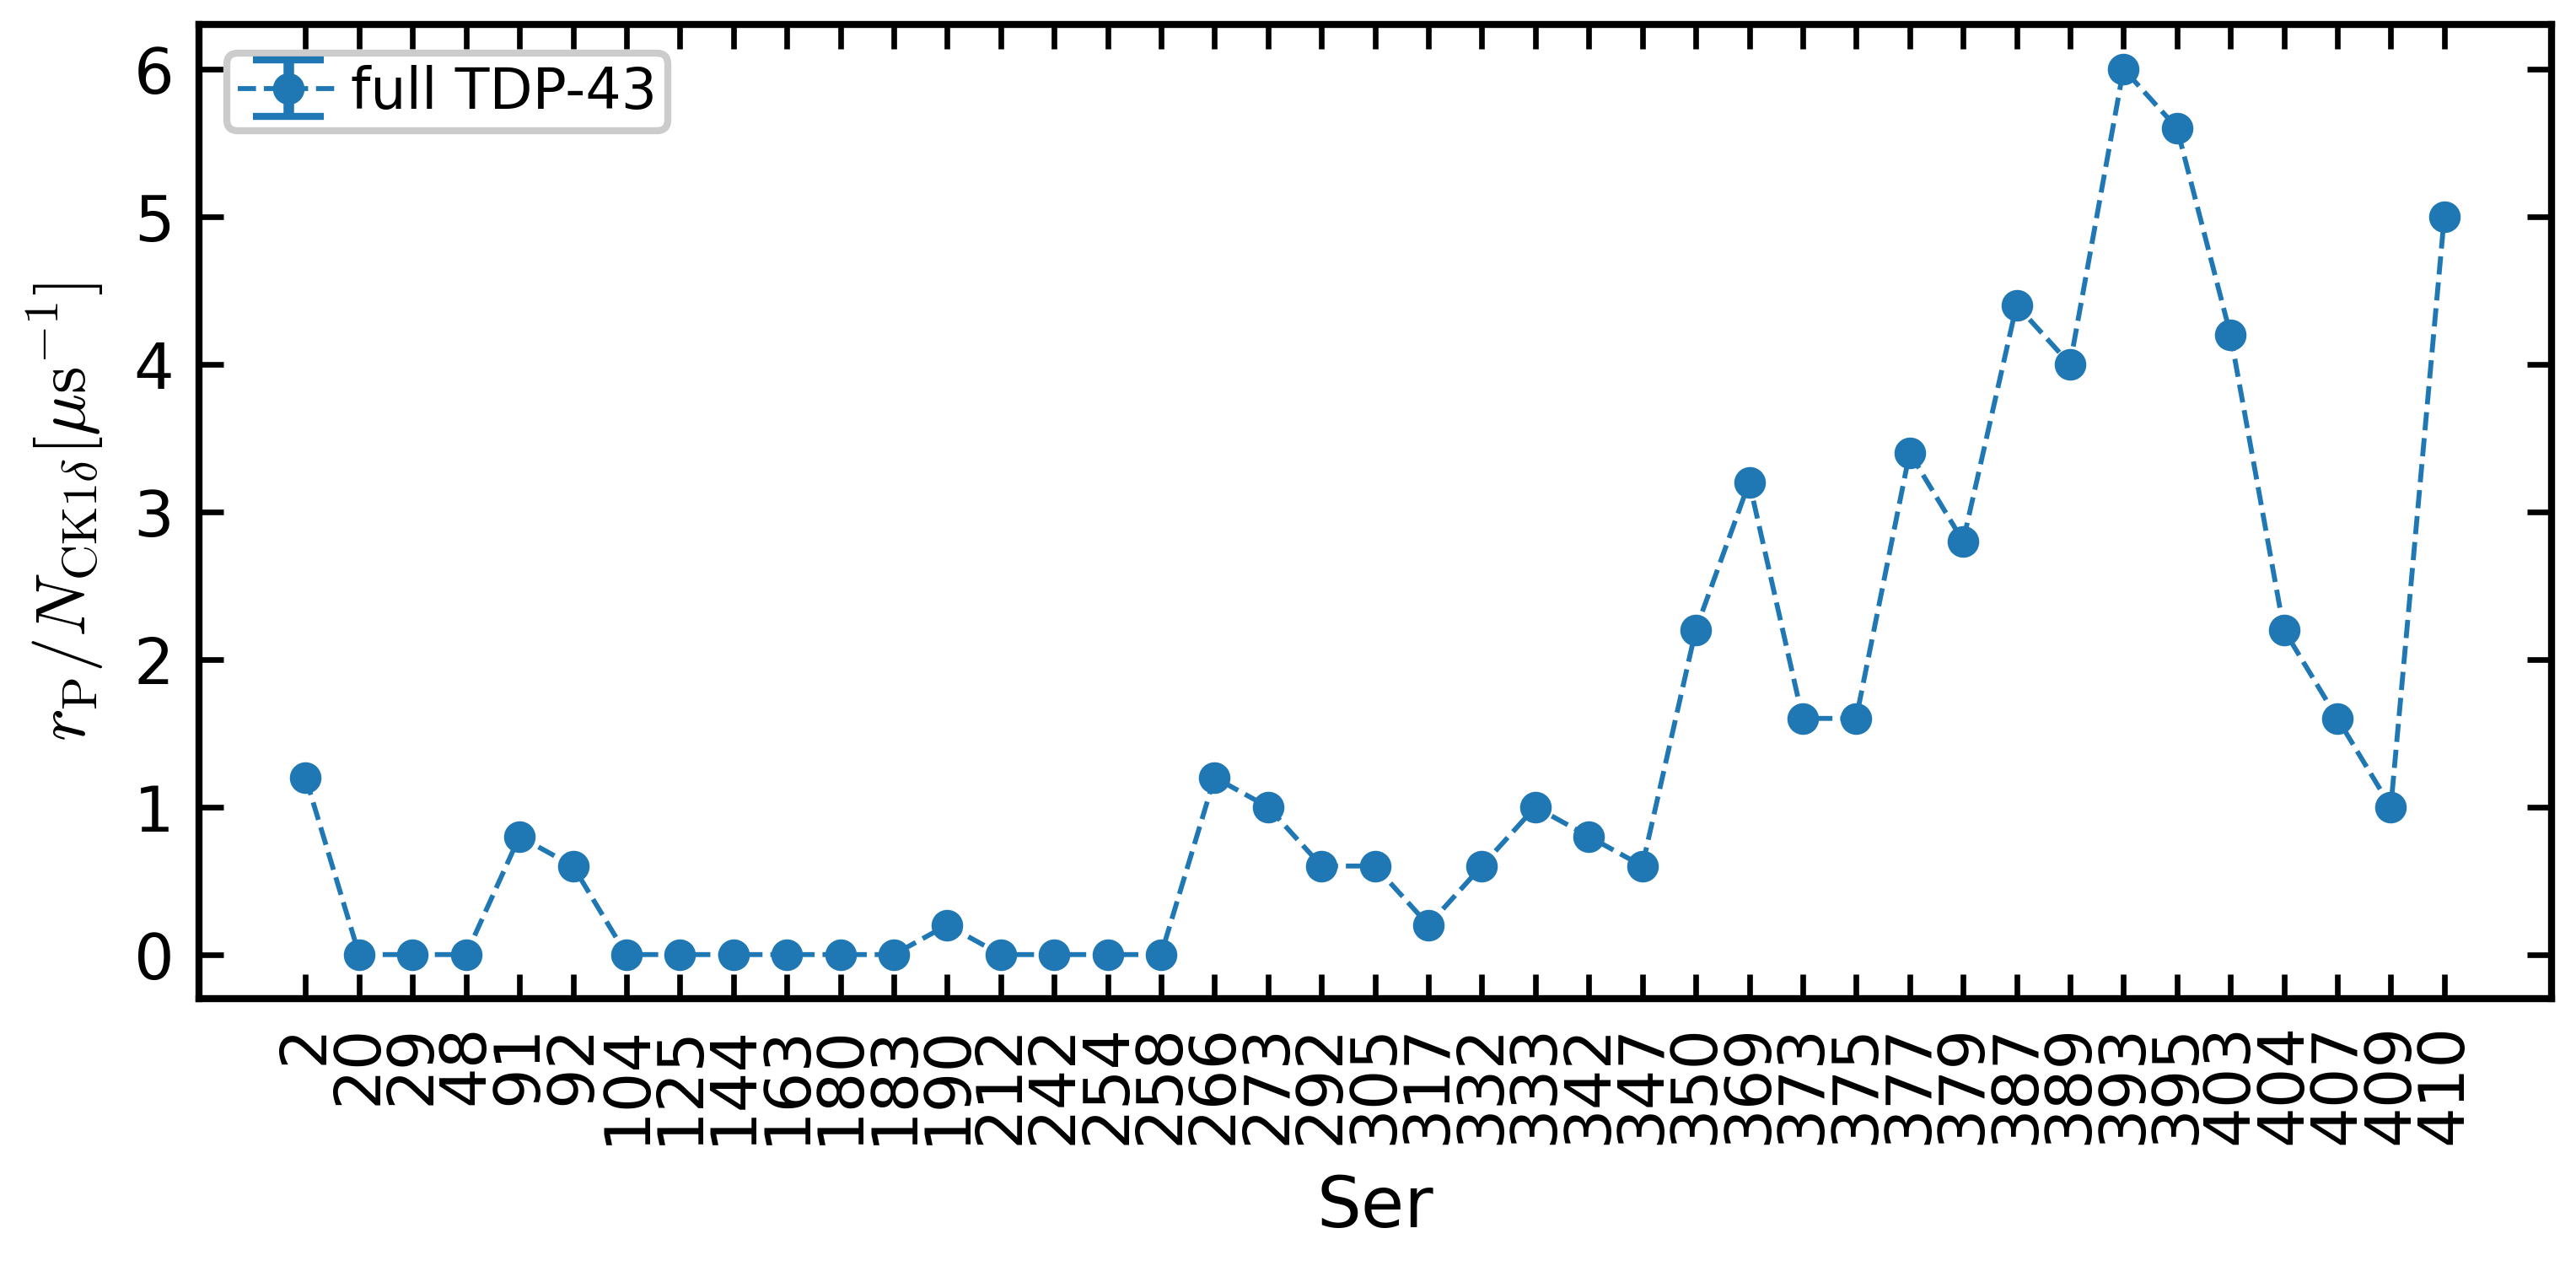

In [36]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,len(ser_i_full_tdp43)+1), rp_150tdp, drp_150tdp, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"full TDP-43")
'''
secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)
'''

plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,len(ser_i_full_tdp43)+1) , ser_i_full_tdp43+1, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.savefig('/localscratch/zippoema/project_ness/plots/rates_150-com-full-tdp43_5-com-ck1d-open_dmu-48.png', dpi=1200)

41

## 2 TDP-43 LCD, 1 CK1d, 1 pp3 

In [6]:
path1 = '/localscratch/zippoema/project_ness/simulations/2-tdp43-lcd_1-ck1d-open_1-pp3/'


In [7]:
(rp_k, drp_k), (rp_p, drp_p) = hpar.count_contacts(dirpath=path1+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_contacts.txt', 
                                              ser_l=ser_i, n_sims=25, type_of_contact=1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rdp_k, drdp_k), (rdp_p, drdp_p) = hpar.count_contacts(dirpath=path1+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_contacts.txt', 
                                              ser_l=ser_i, n_sims=25, type_of_contact=-1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rc_k, drc_k), (rc_p, drc_p) = hpar.count_contacts(dirpath=path1+'sim_np_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_np_contacts.txt', 
                                              ser_l=ser_i, n_sims=10, type_of_contact=None, len_prot=154, n_prot=2, max_dist=1.05, nenz=2)



TypeError: object of type 'int' has no len()

In [8]:
(rp_k_dmu5, drp_k_dmu5), (rp_p_dmu5, drp_p_dmu5) = hpar.count_contacts(dirpath=path1+'sim_dmu-5_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-5_0_contacts.txt', 
                                              ser_l=ser_i, n_sims=20, type_of_contact=1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rdp_k_dmu5, drdp_k_dmu5), (rdp_p_dmu5, drdp_p_dmu5) = hpar.count_contacts(dirpath=path1+'sim_dmu-5_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-5_0_contacts.txt', 
                                              ser_l=ser_i, n_sims=20, type_of_contact=-1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rp_k_dmu10, drp_k_dmu10), (rp_p_dmu10, drp_p_dmu10) = hpar.count_contacts(dirpath=path1+'sim_dmu-10_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-10_0_contacts.txt', 
                                              ser_l=ser_i, n_sims=20, type_of_contact=1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)

(rdp_k_dmu10, drdp_k_dmu10), (rdp_p_dmu10, drdp_p_dmu10) = hpar.count_contacts(dirpath=path1+'sim_dmu-10_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-10_0_contacts.txt', 
                                              ser_l=ser_i, n_sims=20, type_of_contact=-1, len_prot=154, n_prot=2, max_dist=1.05, nenz=2, start=200000000)


TypeError: object of type 'int' has no len()

In [9]:
times = np.arange(0,2000,20)
len(times)


100

In [11]:
pSer, d_pSer = hpar.pSer_per_chain(dirpath=path1+'sim_ph_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_ph_dump.gsd', 
                                              ser_l=ser_i, n_sims=25, times=times)

/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),
100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 51.87it/s]


In [12]:
pSer_dmu0, d_pSer_dmu0 = hpar.pSer_per_chain(dirpath=path1+'sim_dmu0_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu0_0_dump.gsd', 
                                              ser_l=ser_i, n_sims=20, times=times)

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 74.00it/s]


In [13]:
pSer_dmu5, d_pSer_dmu5 = hpar.pSer_per_chain(dirpath=path1+'sim_dmu-5_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-5_0_dump.gsd', 
                                              ser_l=ser_i, n_sims=20, times=times)

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.27it/s]


In [14]:
pSer_dmu10, d_pSer_dmu10 = hpar.pSer_per_chain(dirpath=path1+'sim_dmu-10_0_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-10_0_dump.gsd', 
                                              ser_l=ser_i, n_sims=20, times=times)

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 73.41it/s]


In [15]:
pSer_dmu40, d_pSer_dmu40 = hpar.pSer_per_chain(dirpath=path1+'sim_dmu-40_8_2-tdp43-lcd_1-ck1d-open_1-pp3/', 
                                              file_suffix='2-tdp43-lcd_com-ck1d-open_com-pp3_CAL3_dmu-40_8_dump.gsd', 
                                              ser_l=ser_i, n_sims=20, times=times)

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 77.39it/s]


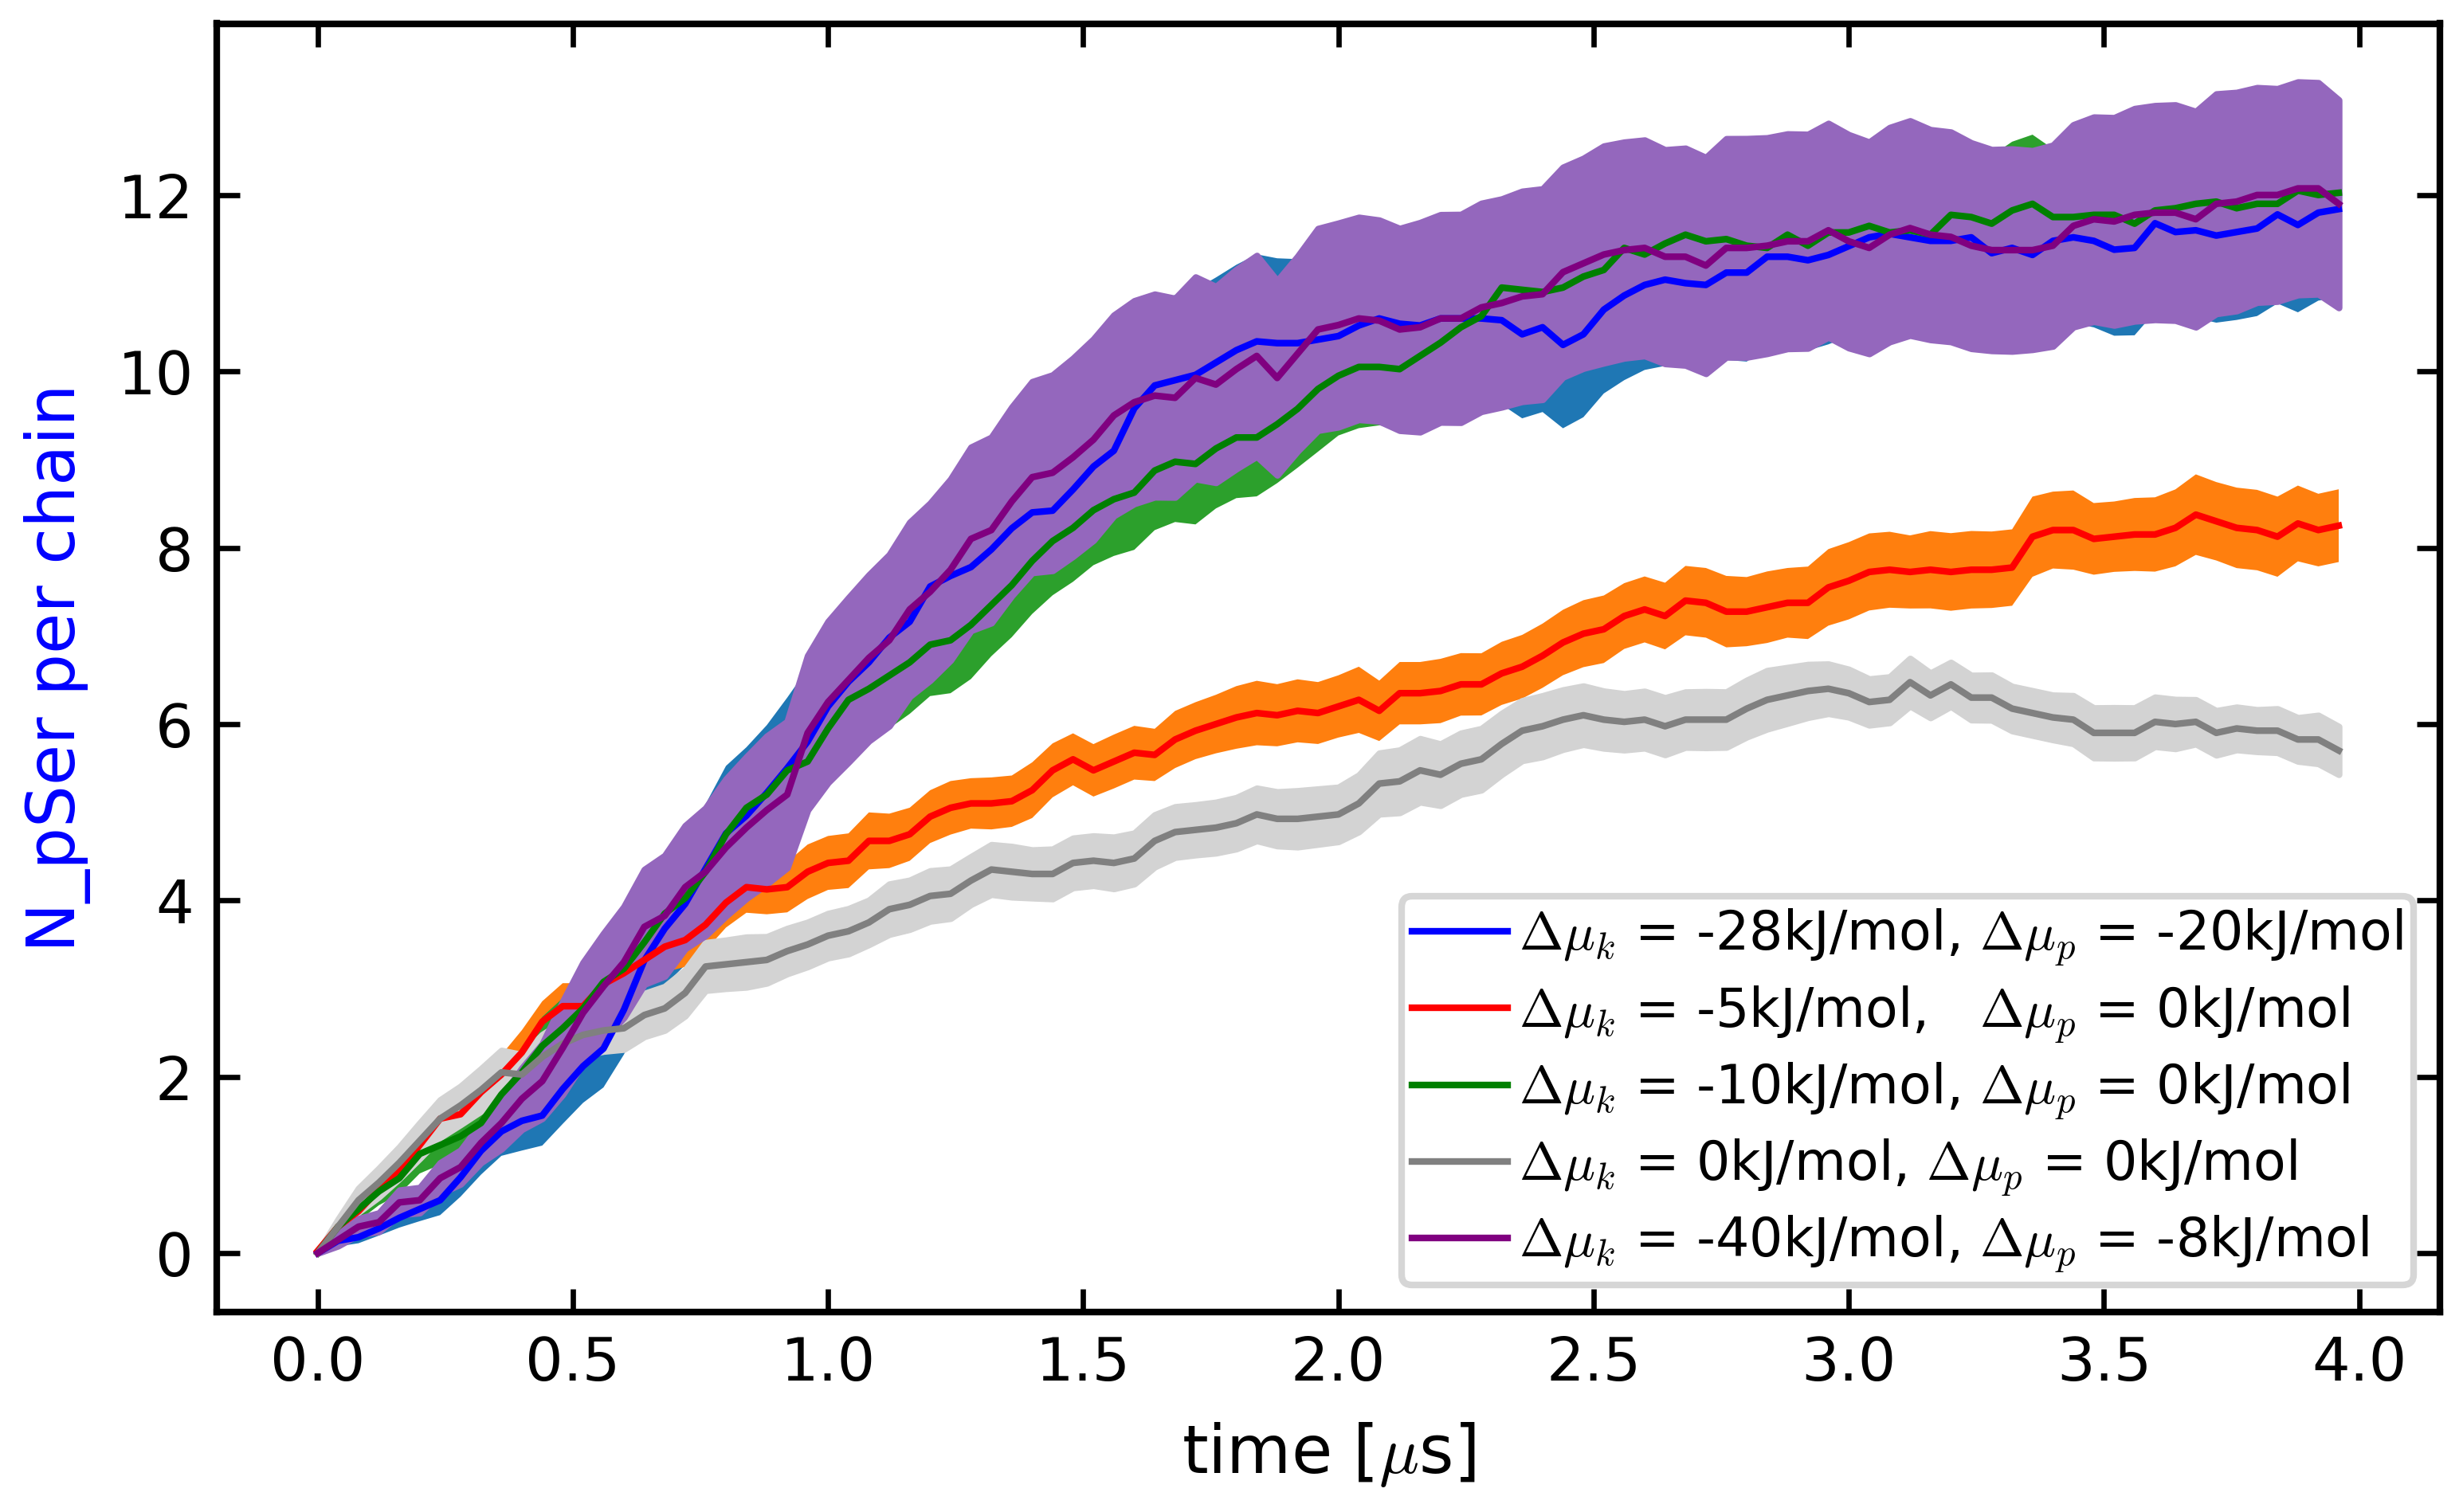

In [16]:
time_step = times*200000/1e8

fig, ax1 = plt.subplots(figsize=(6, 3.5))

# Plot the first array with the primary y-axis
ax1.plot(time_step, pSer, 'b', label=r'$\Delta \mu_k$ = -28kJ/mol, $\Delta \mu_p$ = -20kJ/mol')
ax1.fill_between(time_step, pSer-d_pSer, pSer+d_pSer)
ax1.plot(time_step, pSer_dmu5, 'r', label=r'$\Delta \mu_k$ = -5kJ/mol,   $\Delta \mu_p$ = 0kJ/mol')
ax1.fill_between(time_step, pSer_dmu5-d_pSer_dmu5, pSer_dmu5+d_pSer_dmu5)
ax1.plot(time_step, pSer_dmu10, 'g', label=r'$\Delta \mu_k$ = -10kJ/mol, $\Delta \mu_p$ = 0kJ/mol')
ax1.fill_between(time_step, pSer_dmu10-d_pSer_dmu10, pSer_dmu10+d_pSer_dmu10)
ax1.plot(time_step, pSer_dmu0, color='grey', label=r'$\Delta \mu_k$ = 0kJ/mol, $\Delta \mu_p$ = 0kJ/mol')
ax1.fill_between(time_step, pSer_dmu0-d_pSer_dmu0, pSer_dmu0+d_pSer_dmu0, color='lightgrey')
ax1.plot(time_step, pSer_dmu40, color='purple', label=r'$\Delta \mu_k$ = -40kJ/mol, $\Delta \mu_p$ = -8kJ/mol')
ax1.fill_between(time_step, pSer_dmu40-d_pSer_dmu40, pSer_dmu40+d_pSer_dmu40, color='tab:purple')
#ax1.set_xlabel('time [steps]')
ax1.set_xlabel(r'time [$\mu$s]')
ax1.set_ylabel('N_pSer per chain', color='b')


ax1.legend(ncols=1, loc='lower right')

filename = '/localscratch/zippoema/project_ness/plots/2-tdp43-lcd_1-ck1d-open_1-pp3/n_pser_in_time'
plt.savefig(filename+'.png', dpi=600)
plt.savefig(filename+'.pdf', dpi=600)

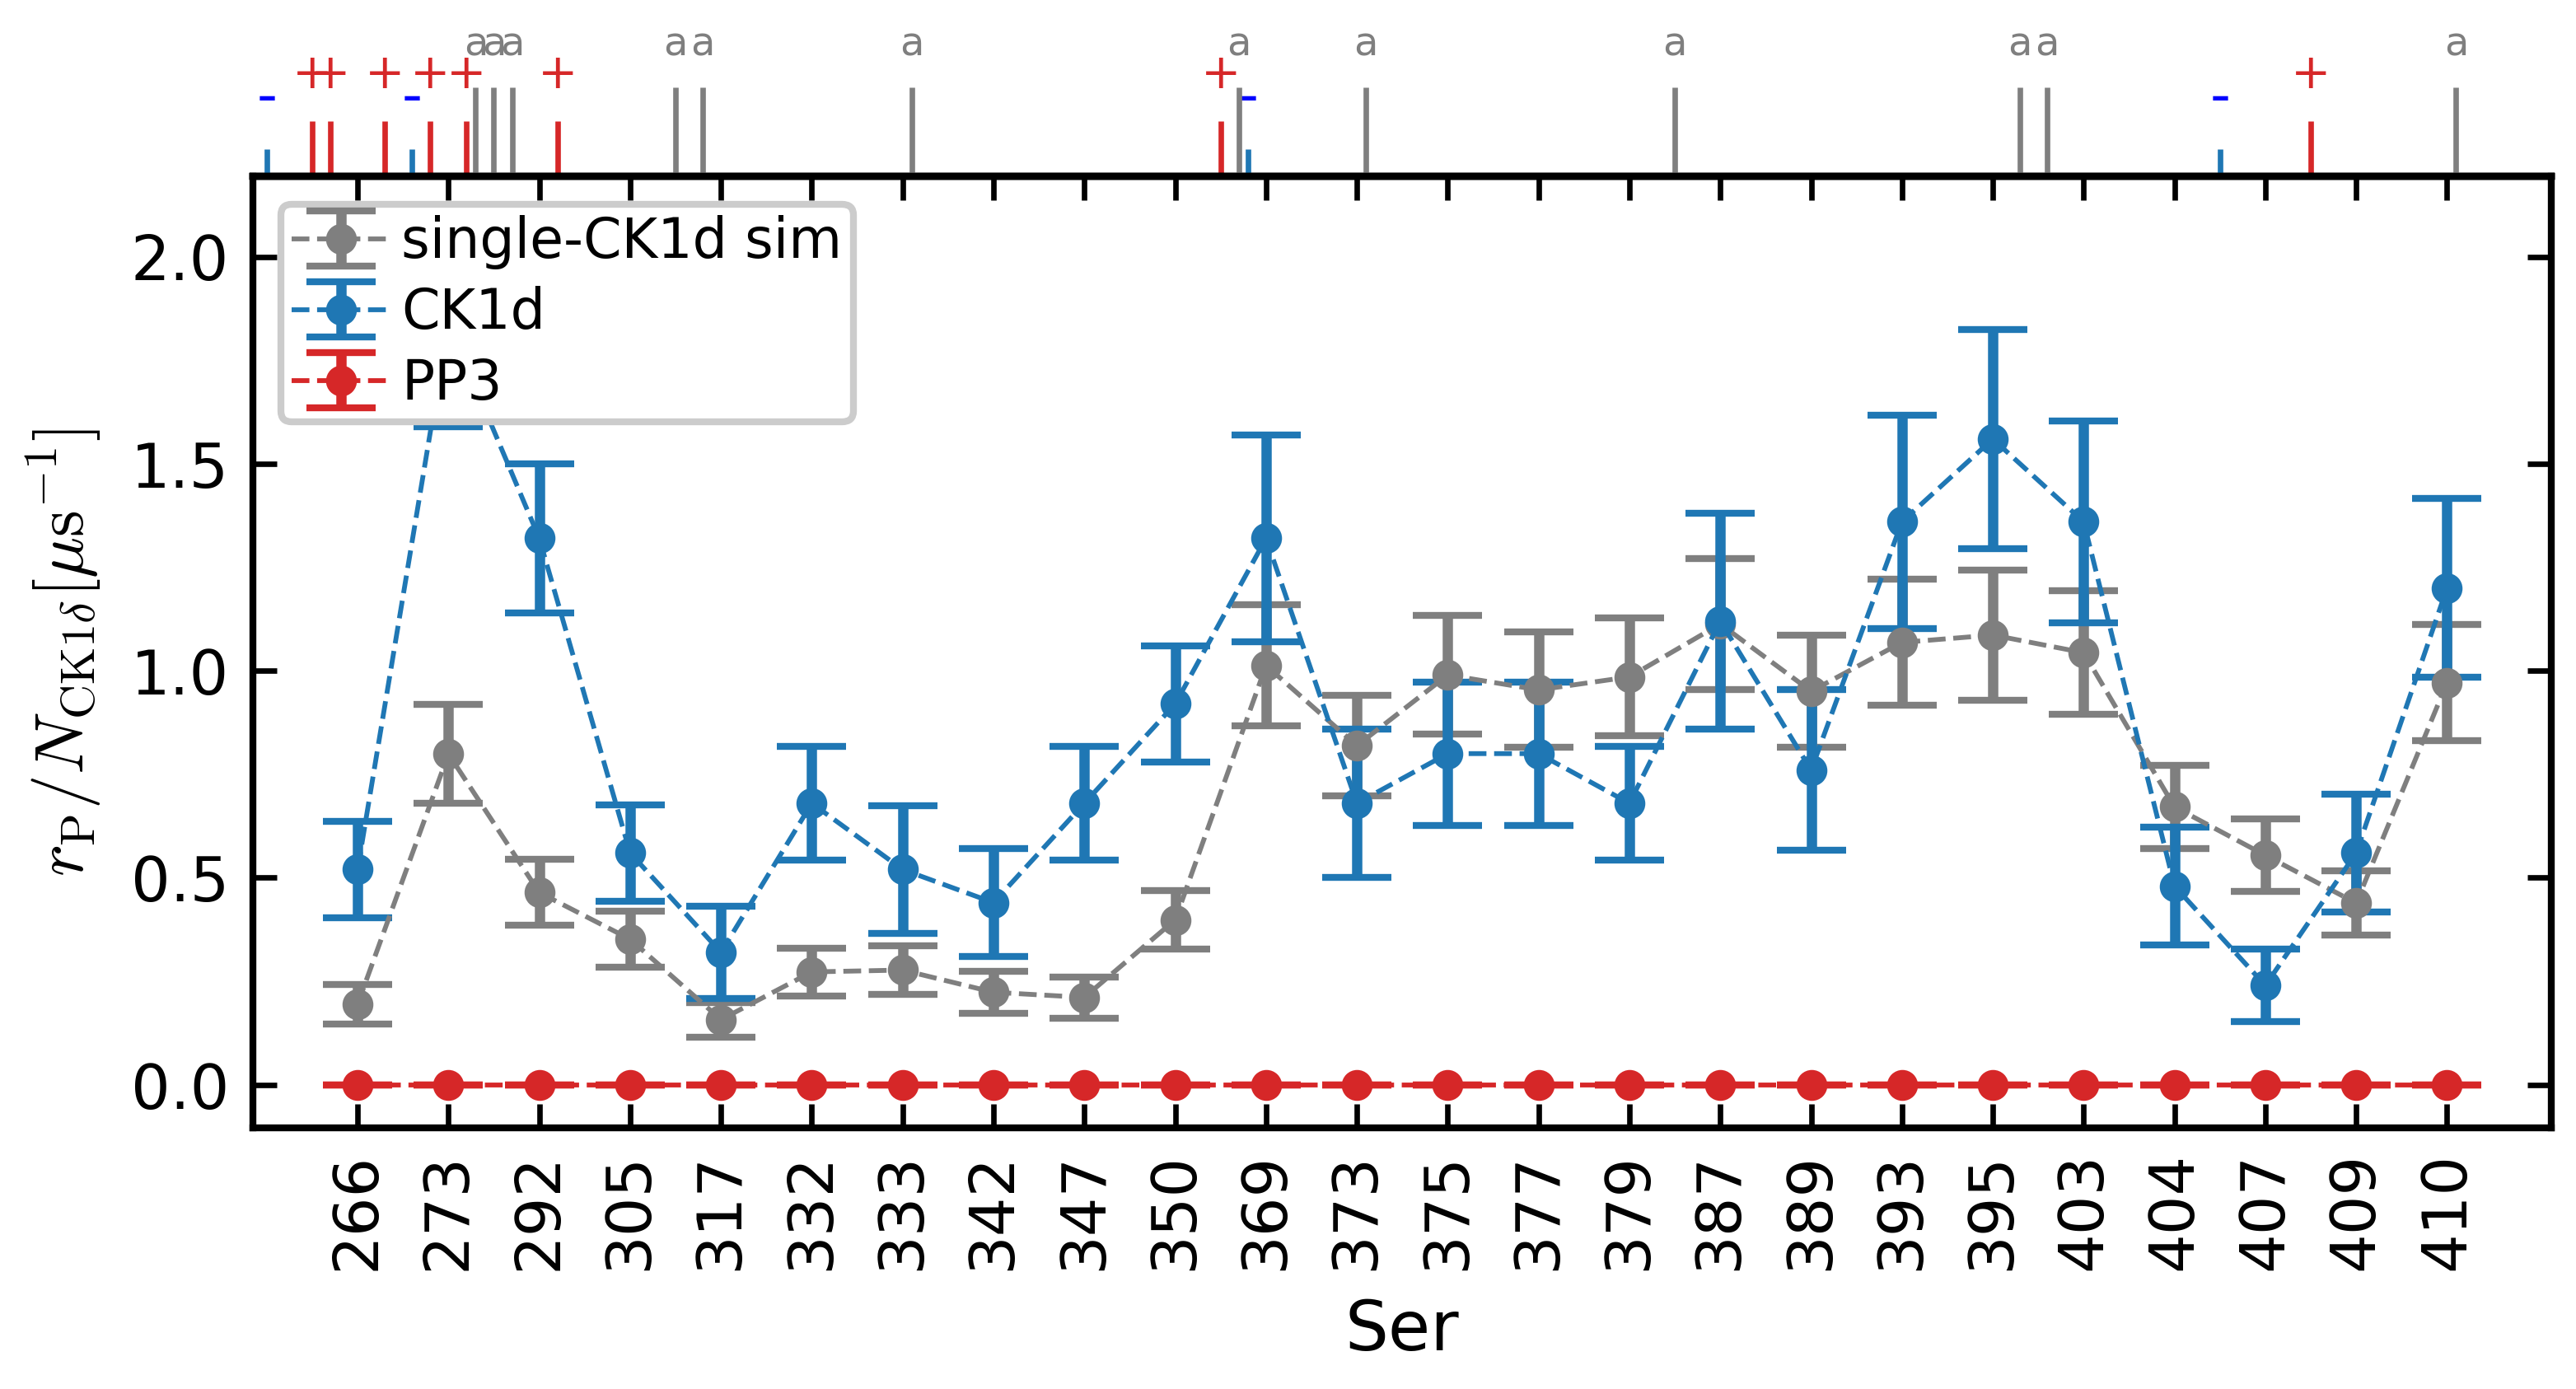

In [80]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:grey', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"single-CK1d sim")
ax1.errorbar(np.arange(1,25), rp_k, drp_k, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d")
ax1.errorbar(np.arange(1,25), rp_p, drp_p, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

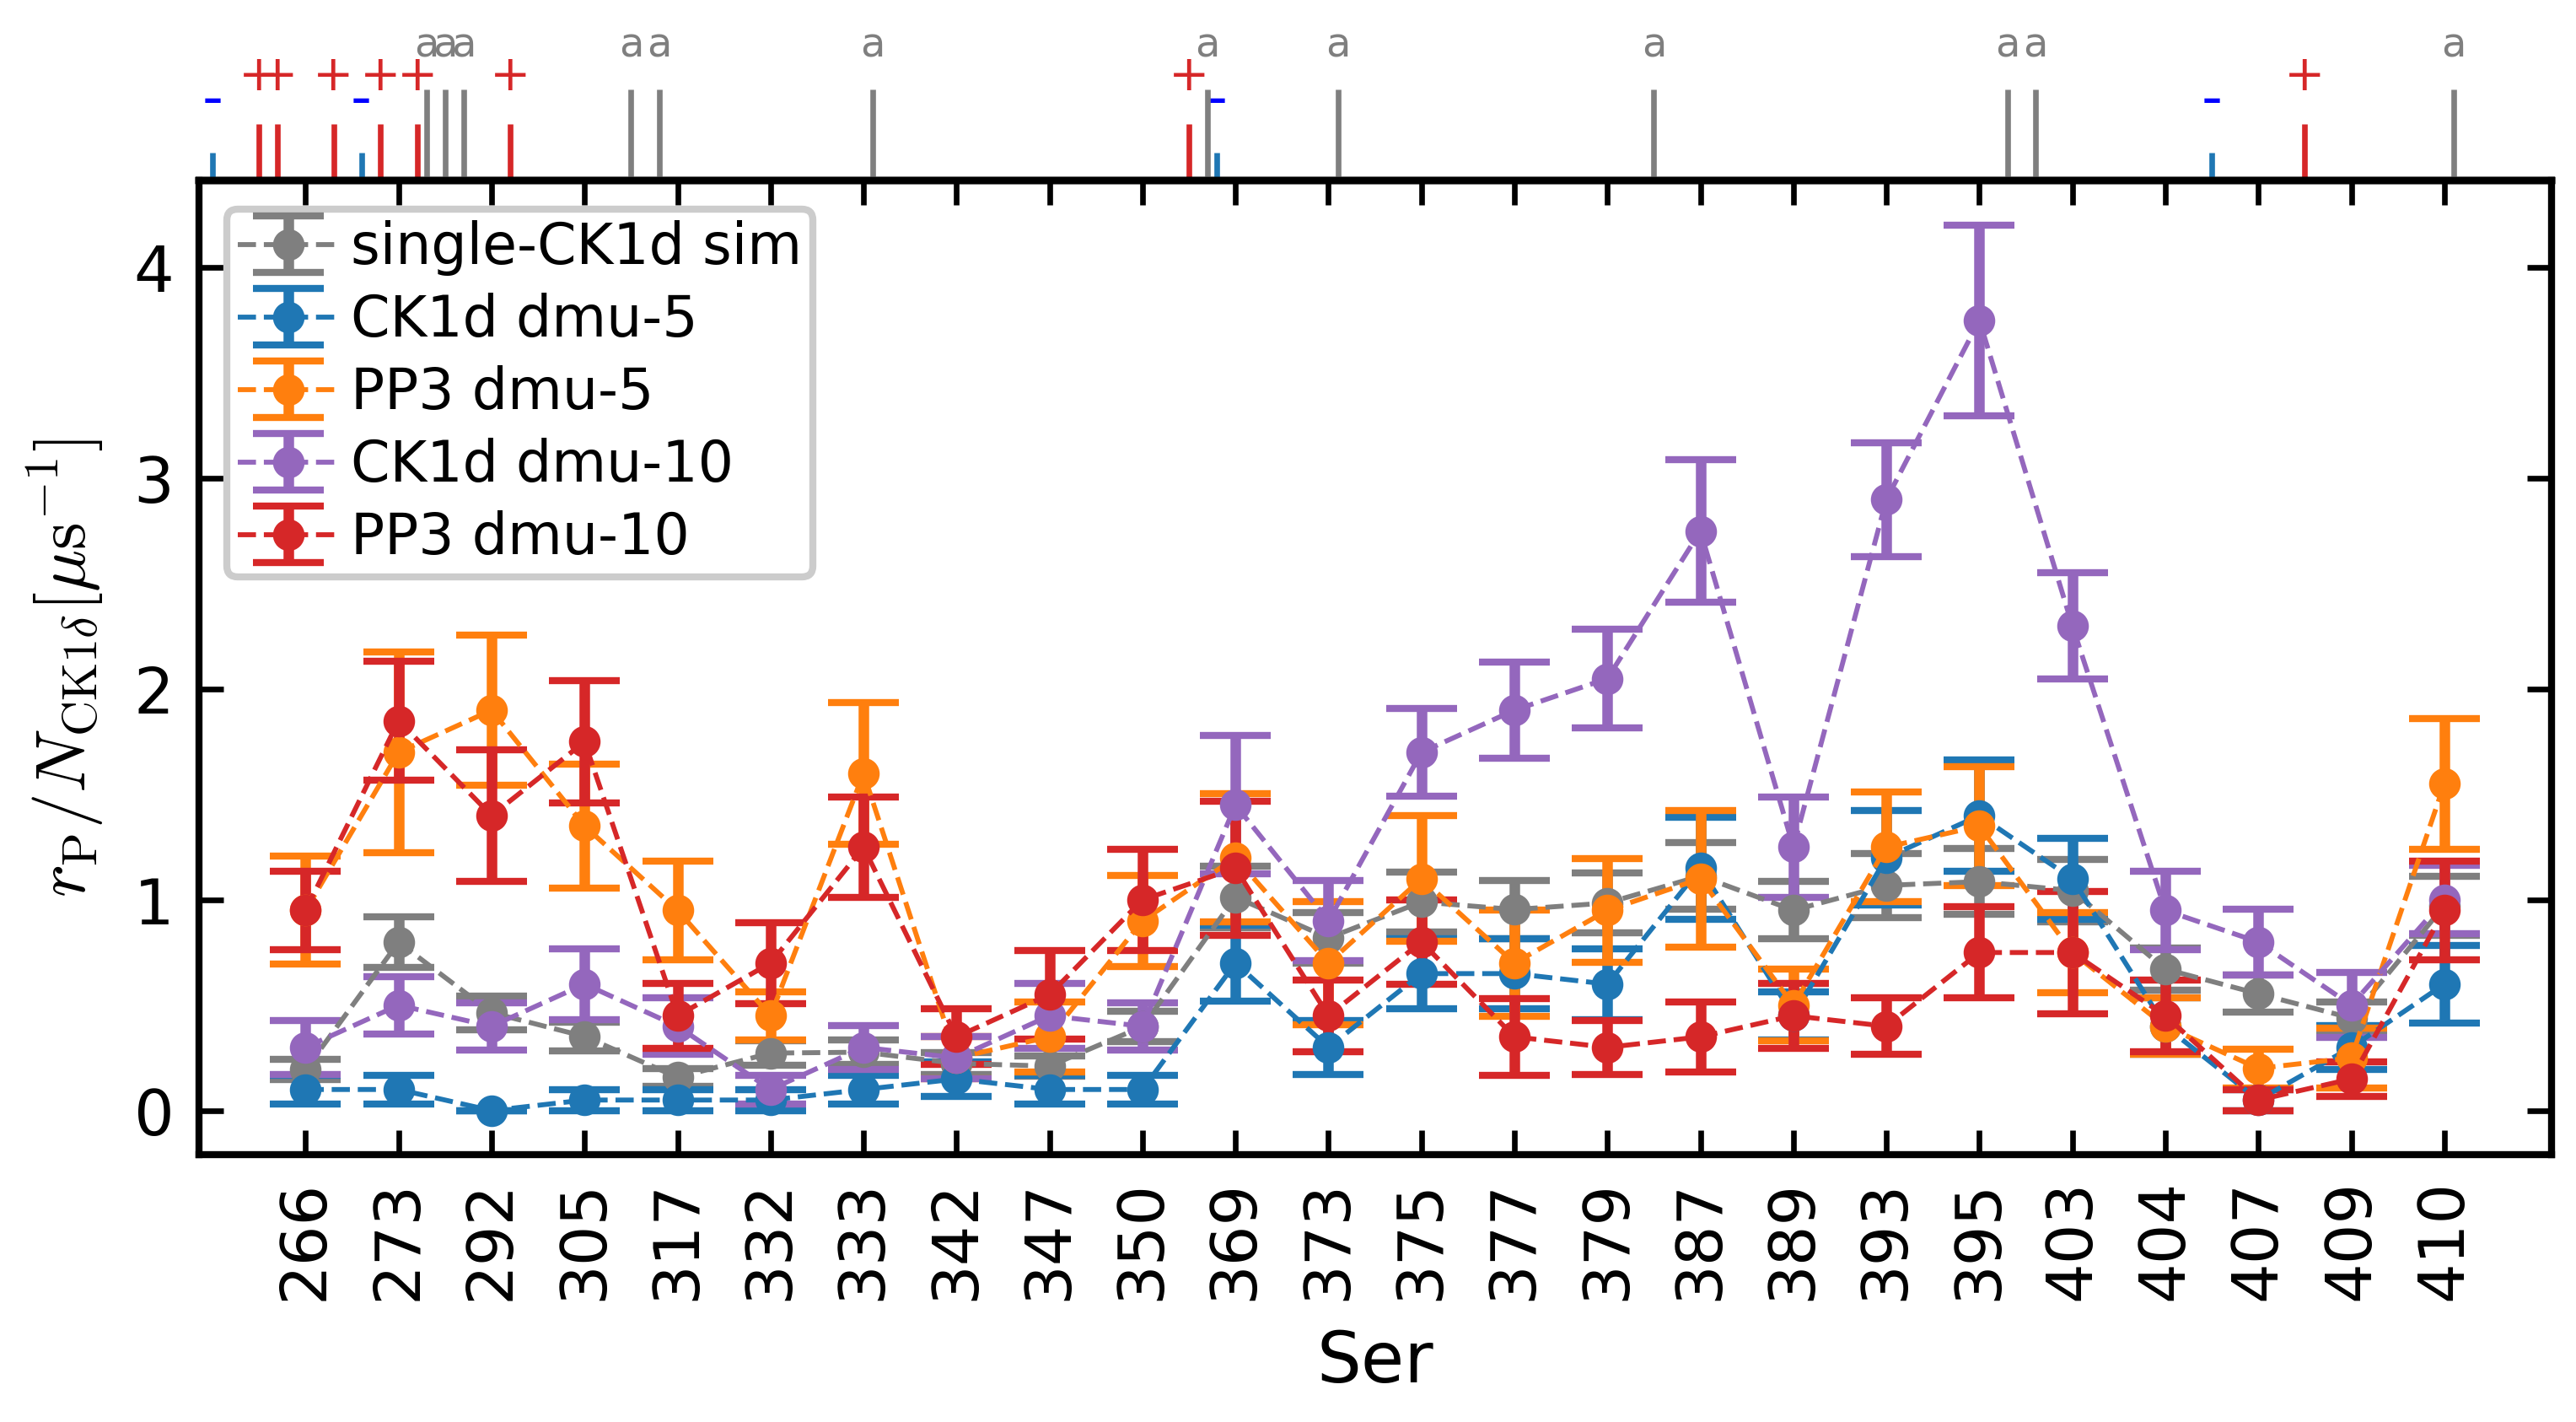

In [33]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp, drp, fmt='.--', color='tab:grey', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"single-CK1d sim")
ax1.errorbar(np.arange(1,25), rp_k_dmu5, drp_k_dmu5, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d dmu-5")
ax1.errorbar(np.arange(1,25), rp_p_dmu5, drp_p_dmu5, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3 dmu-5")
ax1.errorbar(np.arange(1,25), rp_k_dmu10, drp_k_dmu10, fmt='.--', color='tab:purple', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d dmu-10")
ax1.errorbar(np.arange(1,25), rp_p_dmu10, drp_p_dmu10, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3 dmu-10")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

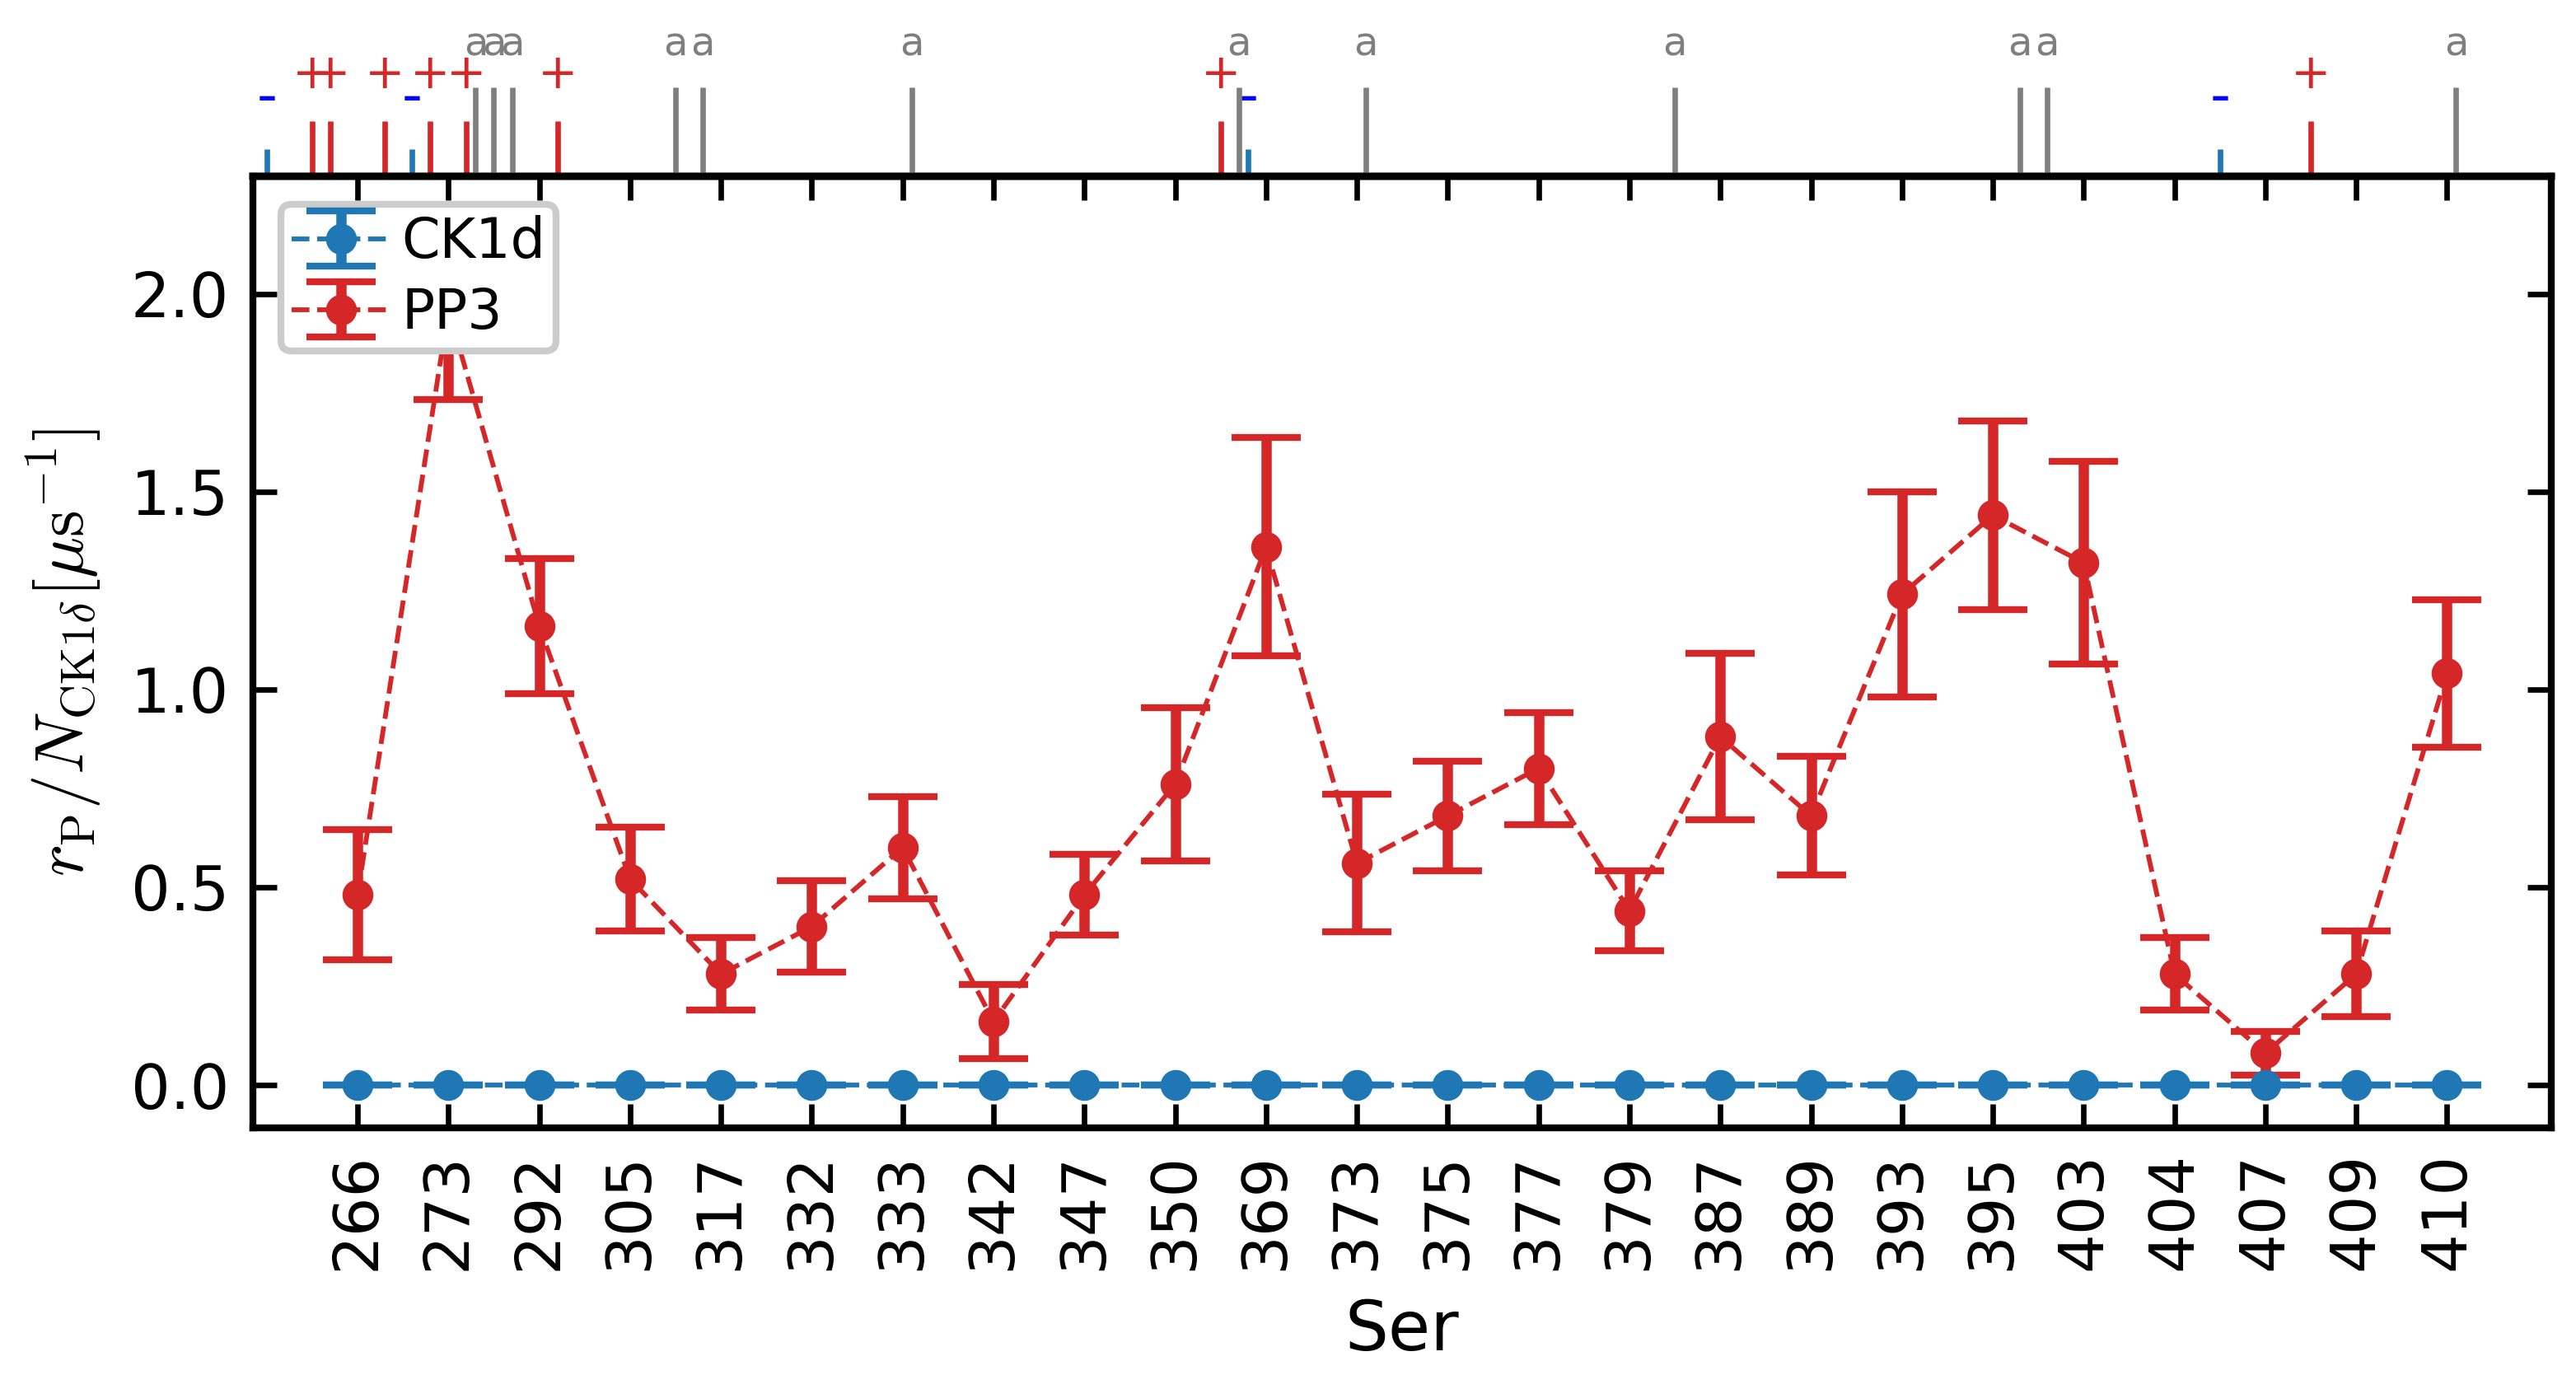

In [81]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rdp_k, drdp_k, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d")
ax1.errorbar(np.arange(1,25), rdp_p, drdp_p, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

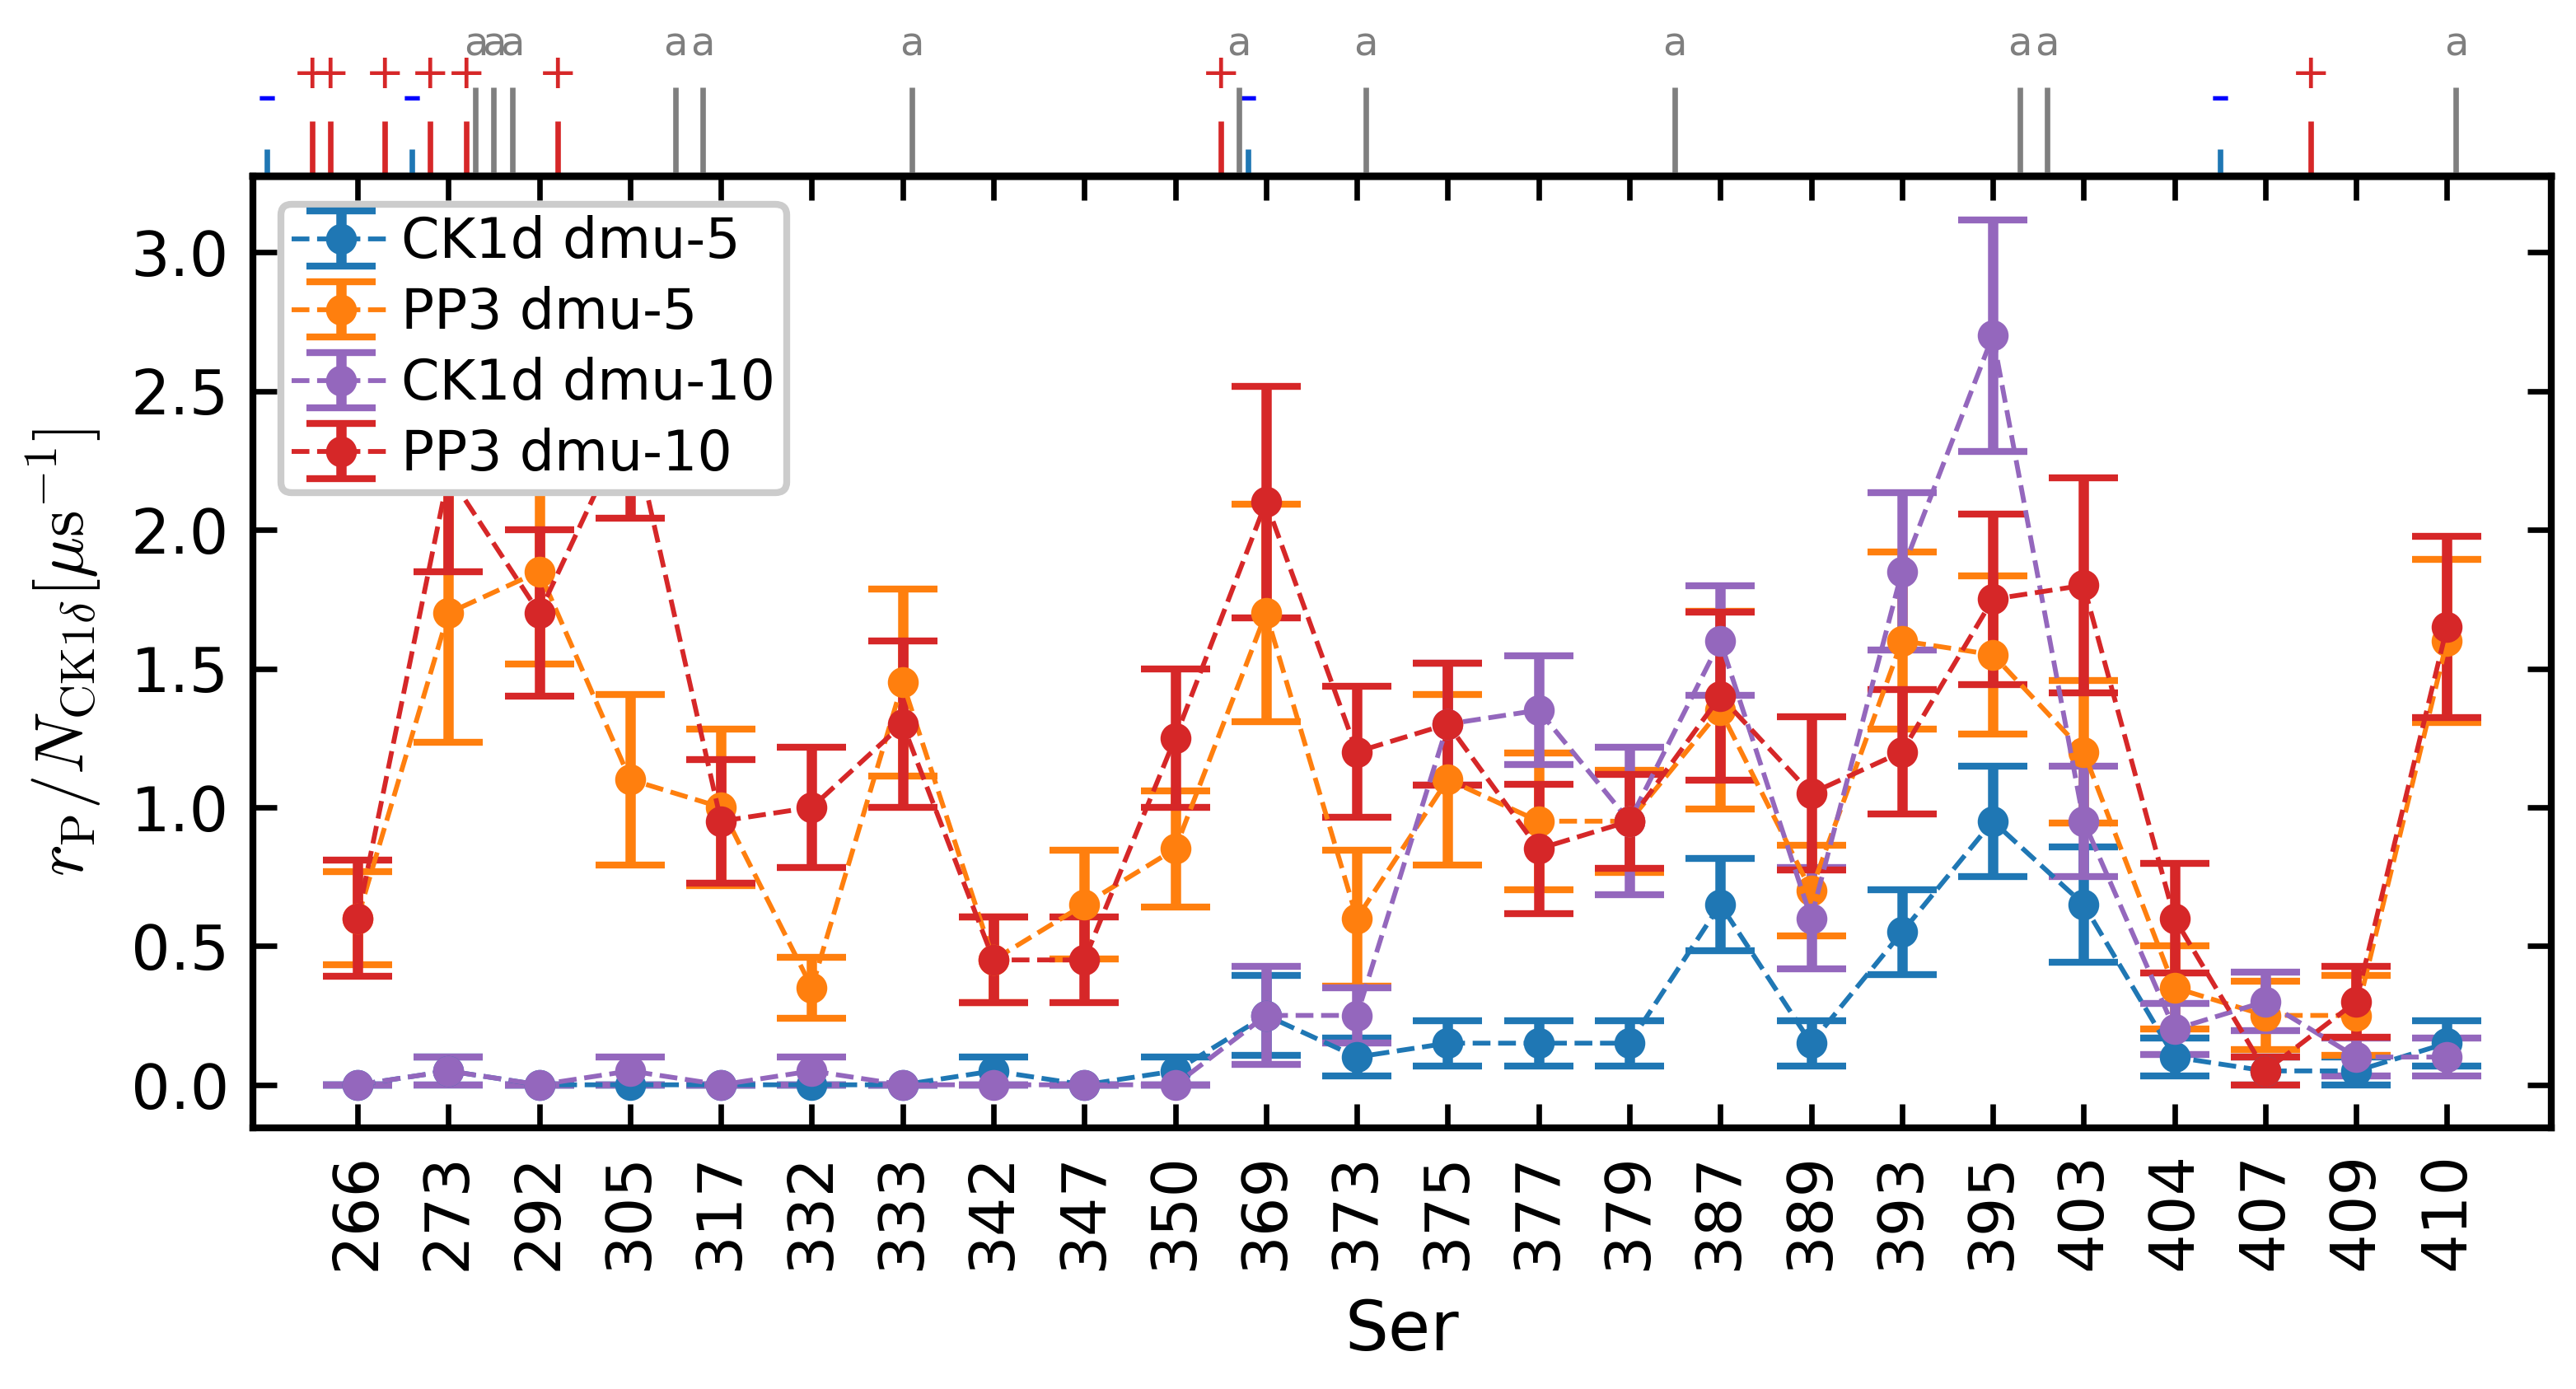

In [34]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rdp_k_dmu5, drdp_k_dmu5, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d dmu-5")
ax1.errorbar(np.arange(1,25), rdp_p_dmu5, drdp_p_dmu5, fmt='.--', color='tab:orange', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3 dmu-5")
ax1.errorbar(np.arange(1,25), rdp_k_dmu10, drdp_k_dmu10, fmt='.--', color='tab:purple', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d dmu-10")
ax1.errorbar(np.arange(1,25), rdp_p_dmu10, drdp_p_dmu10, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3 dmu-10")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

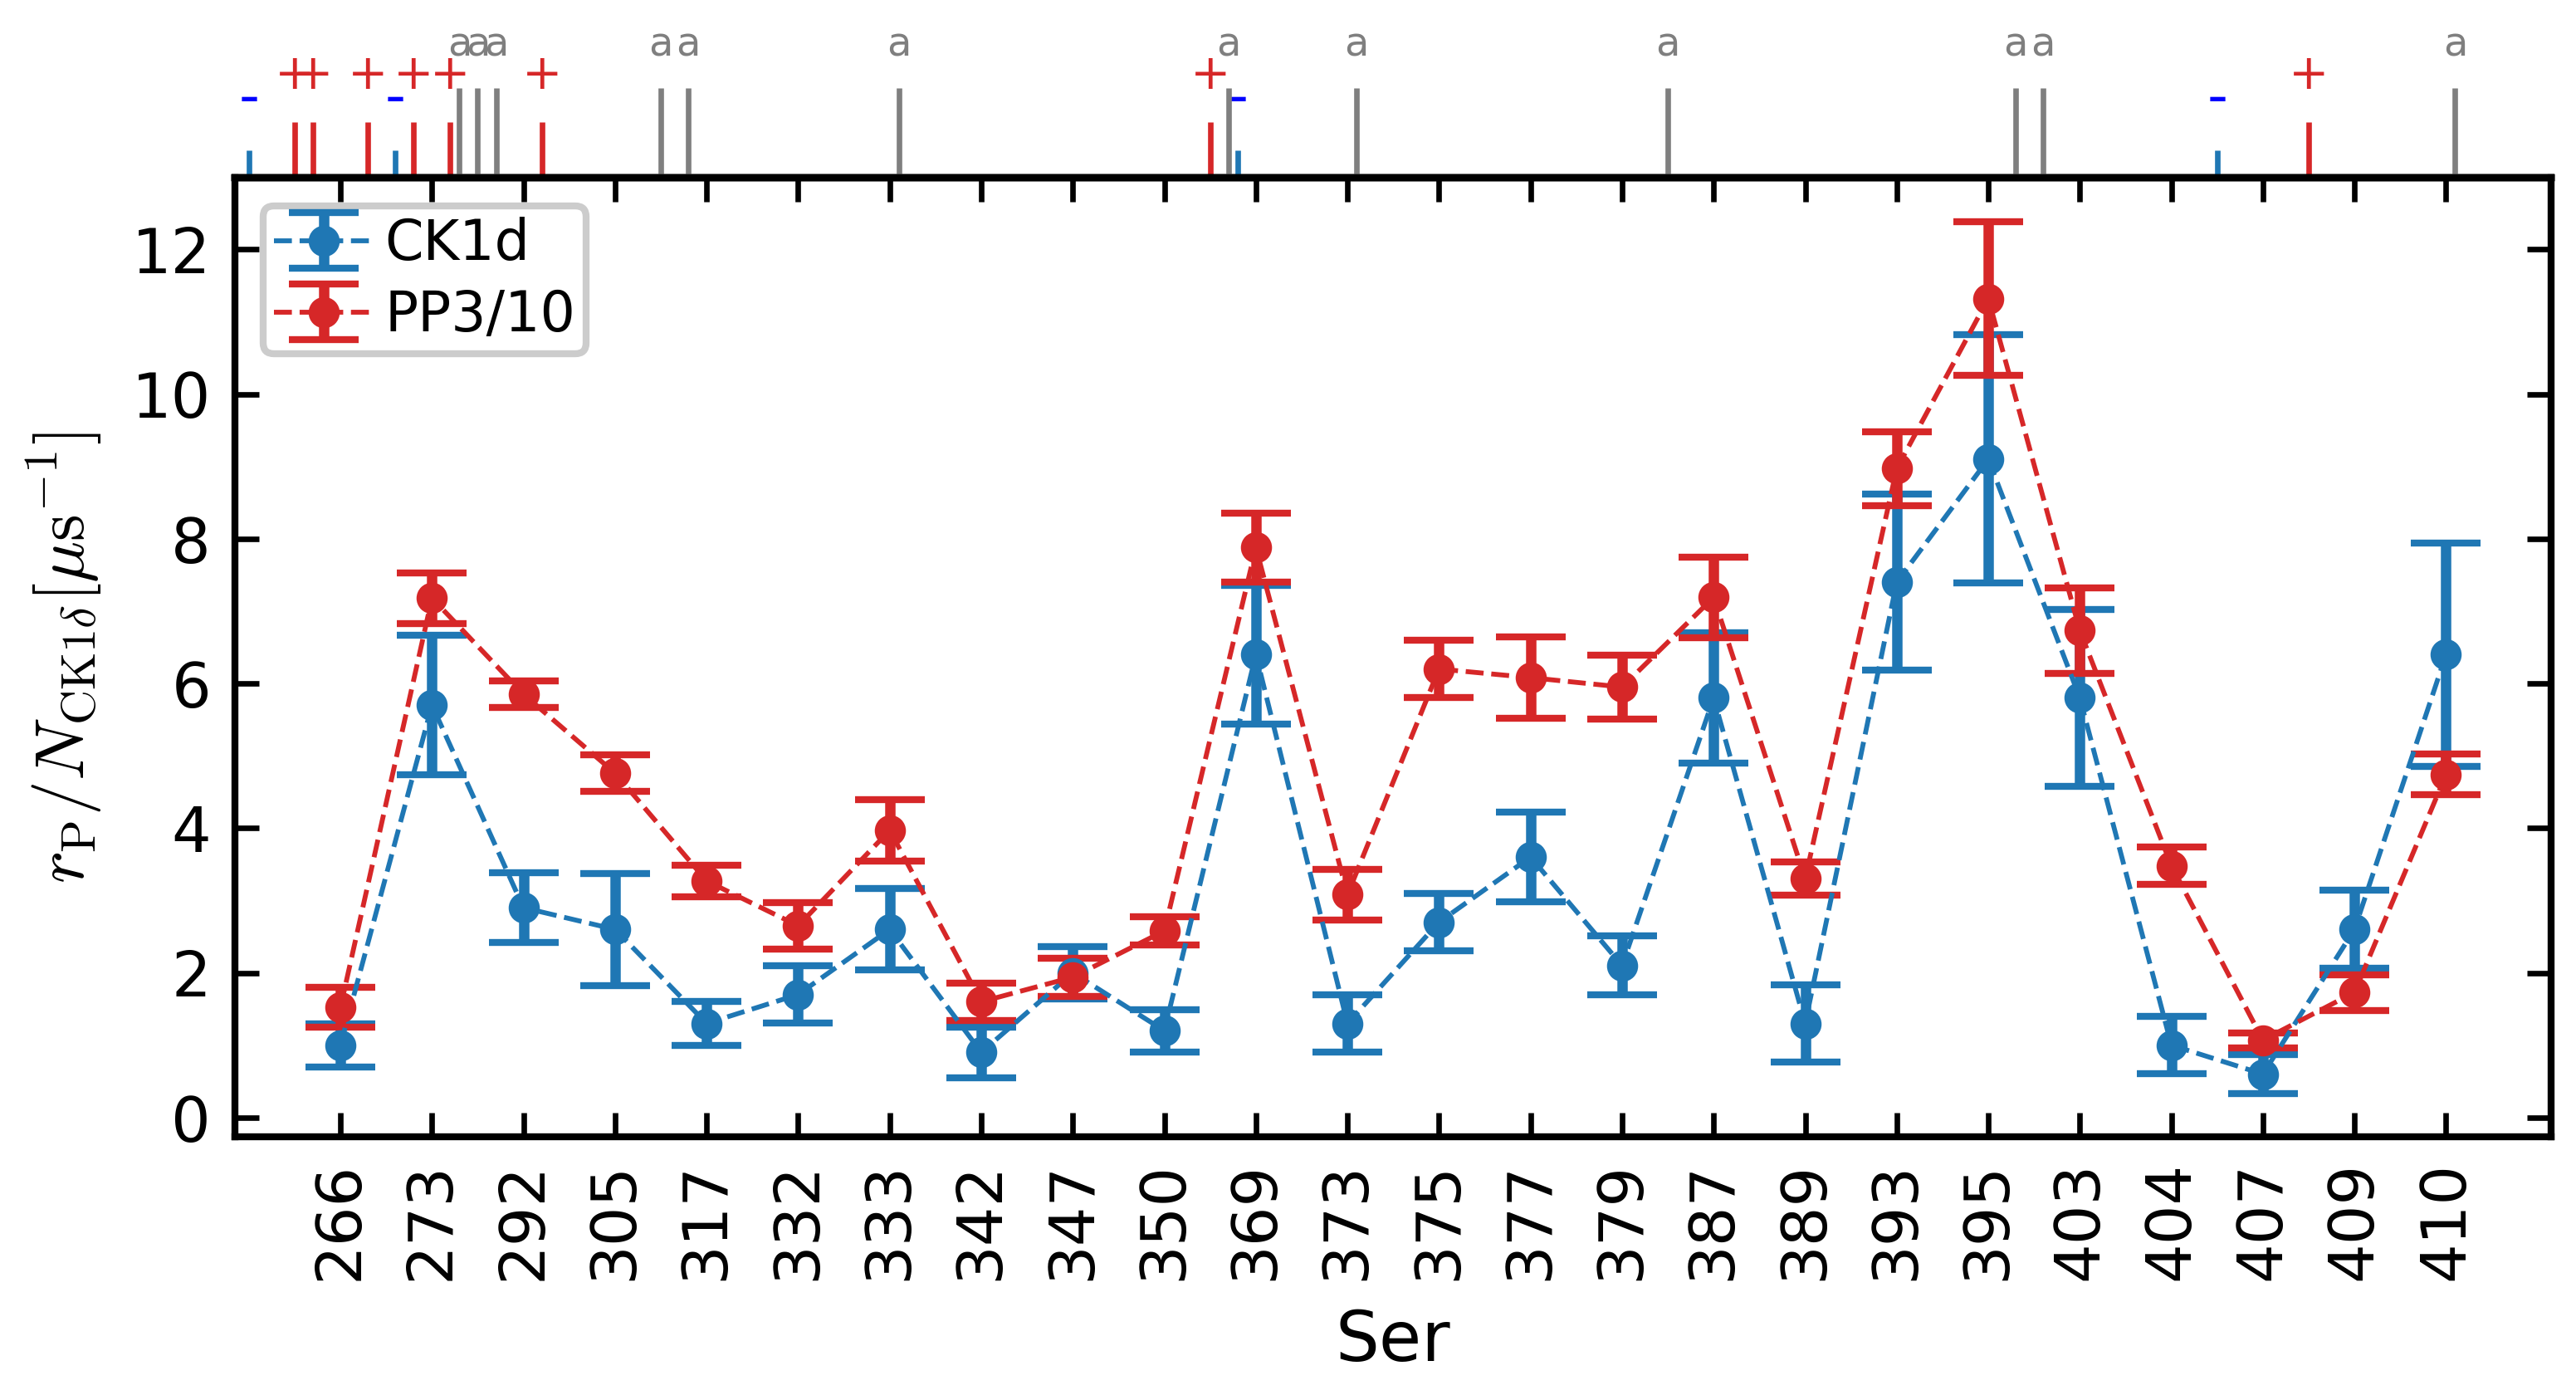

In [82]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rc_k, drc_k, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"CK1d")
ax1.errorbar(np.arange(1,25), rc_p/10, drc_p/10, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"PP3/10")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

## pSer per chain  

### Droplet

In [66]:
step = 20
times_10us = np.arange(step,5000+step,step)-1
times_5us = np.arange(0,2500,20)

times_2_5us = np.arange(0,1250,20)
times_10us

array([  19,   39,   59,   79,   99,  119,  139,  159,  179,  199,  219,
        239,  259,  279,  299,  319,  339,  359,  379,  399,  419,  439,
        459,  479,  499,  519,  539,  559,  579,  599,  619,  639,  659,
        679,  699,  719,  739,  759,  779,  799,  819,  839,  859,  879,
        899,  919,  939,  959,  979,  999, 1019, 1039, 1059, 1079, 1099,
       1119, 1139, 1159, 1179, 1199, 1219, 1239, 1259, 1279, 1299, 1319,
       1339, 1359, 1379, 1399, 1419, 1439, 1459, 1479, 1499, 1519, 1539,
       1559, 1579, 1599, 1619, 1639, 1659, 1679, 1699, 1719, 1739, 1759,
       1779, 1799, 1819, 1839, 1859, 1879, 1899, 1919, 1939, 1959, 1979,
       1999, 2019, 2039, 2059, 2079, 2099, 2119, 2139, 2159, 2179, 2199,
       2219, 2239, 2259, 2279, 2299, 2319, 2339, 2359, 2379, 2399, 2419,
       2439, 2459, 2479, 2499, 2519, 2539, 2559, 2579, 2599, 2619, 2639,
       2659, 2679, 2699, 2719, 2739, 2759, 2779, 2799, 2819, 2839, 2859,
       2879, 2899, 2919, 2939, 2959, 2979, 2999, 30

In [11]:
pSer_5_5, d_pSer_5_5 = hpar.pSer_per_chain(dirpath=path_no+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/', 
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_5us, len_prot=154, n_prot=200)
pSer_5_5_5us, d_pSer_5_5_5us = hpar.pSer_per_chain(dirpath=path_no+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/', 
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_5us_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_5us, len_prot=154, n_prot=200)

pSer_5_5_10us, d_pSer_5_5_10us = hpar.pSer_per_chain(dirpath=path_no+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/', 
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_10us_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_2_5us, len_prot=154, n_prot=200)


100%|███████████████████████████████████████████████████████████████████| 63/63 [00:01<00:00, 53.83it/s]


In [12]:
pSer_5_5_15us, d_pSer_5_5_15us = hpar.pSer_per_chain(dirpath=path_no+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/', 
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_15us_dump.gsd', 
                                              ser_l=ser_i, n_sims=1, times=times_5us, len_prot=154, n_prot=200)

100%|█████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 57.70it/s]


In [68]:
pSer_cond_dp, d_pSer_cond_dp = hpar.pSer_per_chain(dirpath=path_drop+'sim_200-tdp43-lcd_5-pp3/', 
                                              file_suffix='200-tdp43-lcd-2100pser_5-com-pp3_CAL3_dump.gsd', 
                                              n_sims=4, times=times_10us, len_prot=154, n_prot=200)
'''
pSer_cond_dp_5us, d_pSer_cond_dp_5us = hpar.pSer_per_chain(dirpath=path_drop+'sim_200-tdp43-lcd_5-pp3/', 
                                              file_suffix='200-tdp43-lcd-2100pser_5-com-pp3_CAL3_5us_dump.gsd', 
                                              ser_l=ser_i, n_sims=4, times=times_5us, len_prot=154, n_prot=200)

pSer_cond_dp_10us, d_pSer_cond_dp_10us = hpar.pSer_per_chain(dirpath=path_drop+'sim_200-tdp43-lcd_5-pp3/', 
                                              file_suffix='200-tdp43-lcd-2100pser_5-com-pp3_CAL3_10us_dump.gsd', 
                                              ser_l=ser_i, n_sims=4, times=times_2_5us[:50], len_prot=154, n_prot=200)
'''

100%|█████████████████████████████████████████████████████████████████| 250/250 [00:26<00:00,  9.53it/s]


"\npSer_cond_dp_5us, d_pSer_cond_dp_5us = hpar.pSer_per_chain(dirpath=path_drop+'sim_200-tdp43-lcd_5-pp3/', \n                                              file_suffix='200-tdp43-lcd-2100pser_5-com-pp3_CAL3_5us_dump.gsd', \n                                              ser_l=ser_i, n_sims=4, times=times_5us, len_prot=154, n_prot=200)\n\npSer_cond_dp_10us, d_pSer_cond_dp_10us = hpar.pSer_per_chain(dirpath=path_drop+'sim_200-tdp43-lcd_5-pp3/', \n                                              file_suffix='200-tdp43-lcd-2100pser_5-com-pp3_CAL3_10us_dump.gsd', \n                                              ser_l=ser_i, n_sims=4, times=times_2_5us[:50], len_prot=154, n_prot=200)\n"

In [67]:
pSer_cond_p, d_pSer_cond_p = hpar.pSer_per_chain(dirpath=path_drop+'sim_200-tdp43-lcd_5-ck1d-open/', 
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_CAL3_dump.gsd', 
                                              n_sims=4, times=times_10us, len_prot=154, n_prot=200)


/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),
100%|█████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.31it/s]


In [17]:
pSer_2_10, d_pSer_2_10 = hpar.pSer_per_chain(dirpath=path_no+'sim_sh_200-tdp43-lcd-793pser_2-ck1d-open_10-pp3/', 
                                              file_suffix='200-tdp43-lcd-793pser_2-com-ck1d-open_10-com-pp3_CAL3_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_5us, len_prot=154, n_prot=200)

pSer_2_10_5us, d_pSer_2_10_5us = hpar.pSer_per_chain(dirpath=path_no+'sim_sh_200-tdp43-lcd-793pser_2-ck1d-open_10-pp3/', 
                                              file_suffix='200-tdp43-lcd-793pser_2-com-ck1d-open_10-com-pp3_CAL3_5us_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_5us, len_prot=154, n_prot=200)


100%|█████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 53.43it/s]


In [18]:
pSer_2_10_10us, d_pSer_2_10_10us = hpar.pSer_per_chain(dirpath=path_no+'sim_sh_200-tdp43-lcd-793pser_2-ck1d-open_10-pp3/', 
                                              file_suffix='200-tdp43-lcd-793pser_2-com-ck1d-open_10-com-pp3_CAL3_10us_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_5us, len_prot=154, n_prot=200)


100%|█████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 51.60it/s]


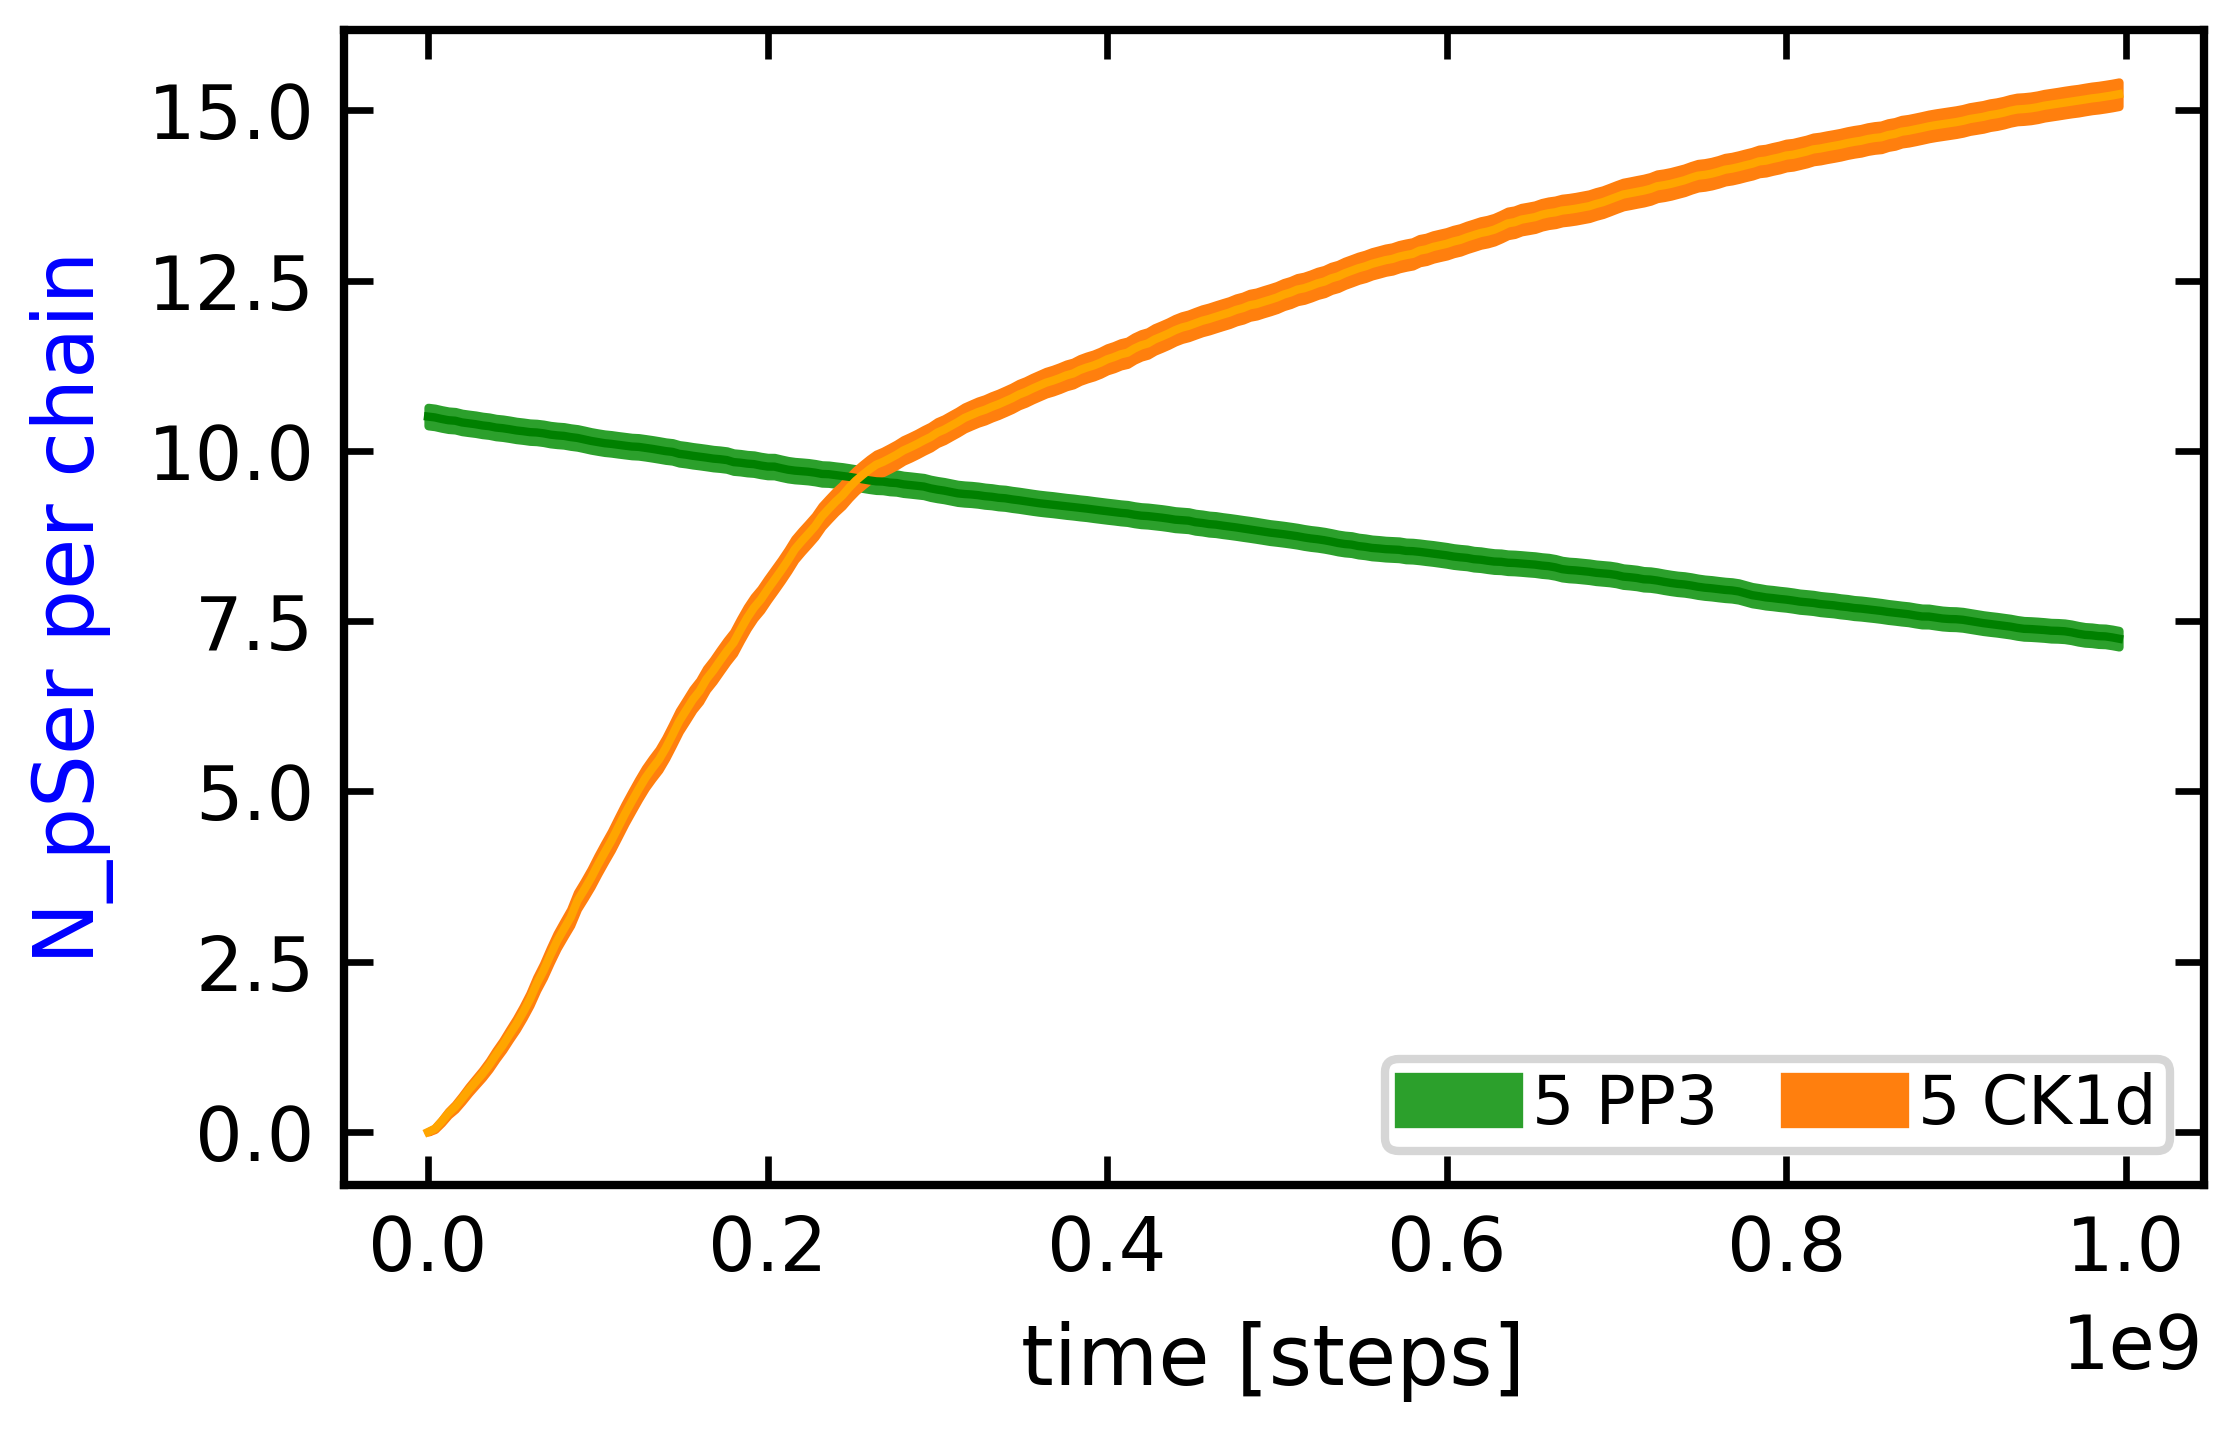

In [48]:
time_0_5us = times_5us*200000
time_0_10us = times_10us*200000
time_5_10us = time_0_5us + 5*1e8
time_10_125us = times_2_5us*200000 + 10*1e8
time_10_15us = times_5us*200000 + 10*1e8
time_15_20us = times_5us*200000 + 15*1e8

fig, ax1 = plt.subplots(figsize=(4, 2.5))
'''
# Plot the first array with the primary y-axis
ax1.plot(time_0_5us, pSer_5_5, 'b')
ax1.fill_between(time_0_5us, pSer_5_5-d_pSer_5_5, pSer_5_5+d_pSer_5_5, color='tab:blue', label='5 CK1d, 5 PP3')
ax1.plot(time_5_10us, pSer_5_5_5us, 'b')
ax1.fill_between(time_5_10us, pSer_5_5_5us-d_pSer_5_5_5us, pSer_5_5_5us+d_pSer_5_5_5us, color='tab:blue')
ax1.plot(time_10_125us, pSer_5_5_10us, 'b')
ax1.fill_between(time_10_125us, pSer_5_5_10us-d_pSer_5_5_10us, pSer_5_5_10us+d_pSer_5_5_10us, color='tab:blue')
ax1.plot(time_15_20us, pSer_5_5_15us, 'b')

ax1.plot(time_0_5us+2*1e8, pSer_2_10, 'r')
ax1.fill_between(time_0_5us+2*1e8, pSer_2_10-d_pSer_2_10, pSer_2_10+d_pSer_2_10, color='tab:red', label='2 CK1d, 10 PP3')
ax1.plot(time_5_10us+2*1e8, pSer_2_10_5us, 'r')
ax1.fill_between(time_5_10us+2*1e8, pSer_2_10_5us-d_pSer_2_10_5us, pSer_2_10_5us+d_pSer_2_10_5us, color='tab:red')
ax1.plot(time_10_15us+2*1e8, pSer_2_10_10us, 'r')
ax1.fill_between(time_10_15us+2*1e8, pSer_2_10_10us-d_pSer_2_10_10us, pSer_2_10_10us+d_pSer_2_10_10us, color='tab:red')
'''
ax1.plot(time_0_10us, pSer_cond_dp, 'green')
ax1.fill_between(time_0_10us, pSer_cond_dp-d_pSer_cond_dp, pSer_cond_dp+d_pSer_cond_dp, color='tab:green', label='5 PP3')
#ax1.plot(time_5_10us, pSer_cond_dp_5us, 'green')
#ax1.fill_between(time_5_10us, pSer_cond_dp_5us-d_pSer_cond_dp_5us, pSer_cond_dp_5us+d_pSer_cond_dp_5us, color='tab:green')
#ax1.plot(time_10_125us[:50], pSer_cond_dp_10us, 'green')
#ax1.fill_between(time_10_125us[:50], pSer_cond_dp_10us-d_pSer_cond_dp_10us, pSer_cond_dp_10us+d_pSer_cond_dp_10us, color='tab:green')
ax1.plot(time_0_10us, pSer_cond_p, 'orange')
ax1.fill_between(time_0_10us, pSer_cond_p-d_pSer_cond_p, pSer_cond_p+d_pSer_cond_p, color='tab:orange', label='5 CK1d')

ax1.set_xlabel('time [steps]')
ax1.set_ylabel('N_pSer per chain', color='b')

#ax1.set_ylim(10,11.2)
#ax1.set_xlim(0.*1e9,0.6*1e9)
ax1.legend(ncols=2, loc='lower right')

filename = '/localscratch/zippoema/project_ness/plots/droplet_200-tdp43-lcd/n_pser_in_time_droplet'
plt.savefig(filename+'.png', dpi=600)
plt.savefig(filename+'.pdf', dpi=600)

In [131]:
nc_5ck1d = np.loadtxt(path_drop_an+'sim_200-tdp43-lcd_5-ck1d-open/size_cond_200-tdp43-lcd_5-com-ck1d-open_CAL3.txt')/2
nc_5pp3 = np.loadtxt(path_drop_an+'sim_200-tdp43-lcd_5-pp3/size_cond_200-tdp43-lcd_5-com-pp3_CAL3.txt')/2

In [141]:
time_0_10us = times_10us*200000

popt_p1, pcov_p1 = curve_fit(linear, time_0_10us[12:50], pSer_cond_p[12:50])
popt_p2, pcov_p2 = curve_fit(linear, time_0_10us[75:150], pSer_cond_p[75:150])
popt_dp1, pcov_dp1 = curve_fit(linear, time_0_10us[:120], pSer_cond_dp[:120])
popt_dp2, pcov_dp2 = curve_fit(linear, time_0_10us[170:], pSer_cond_dp[170:])

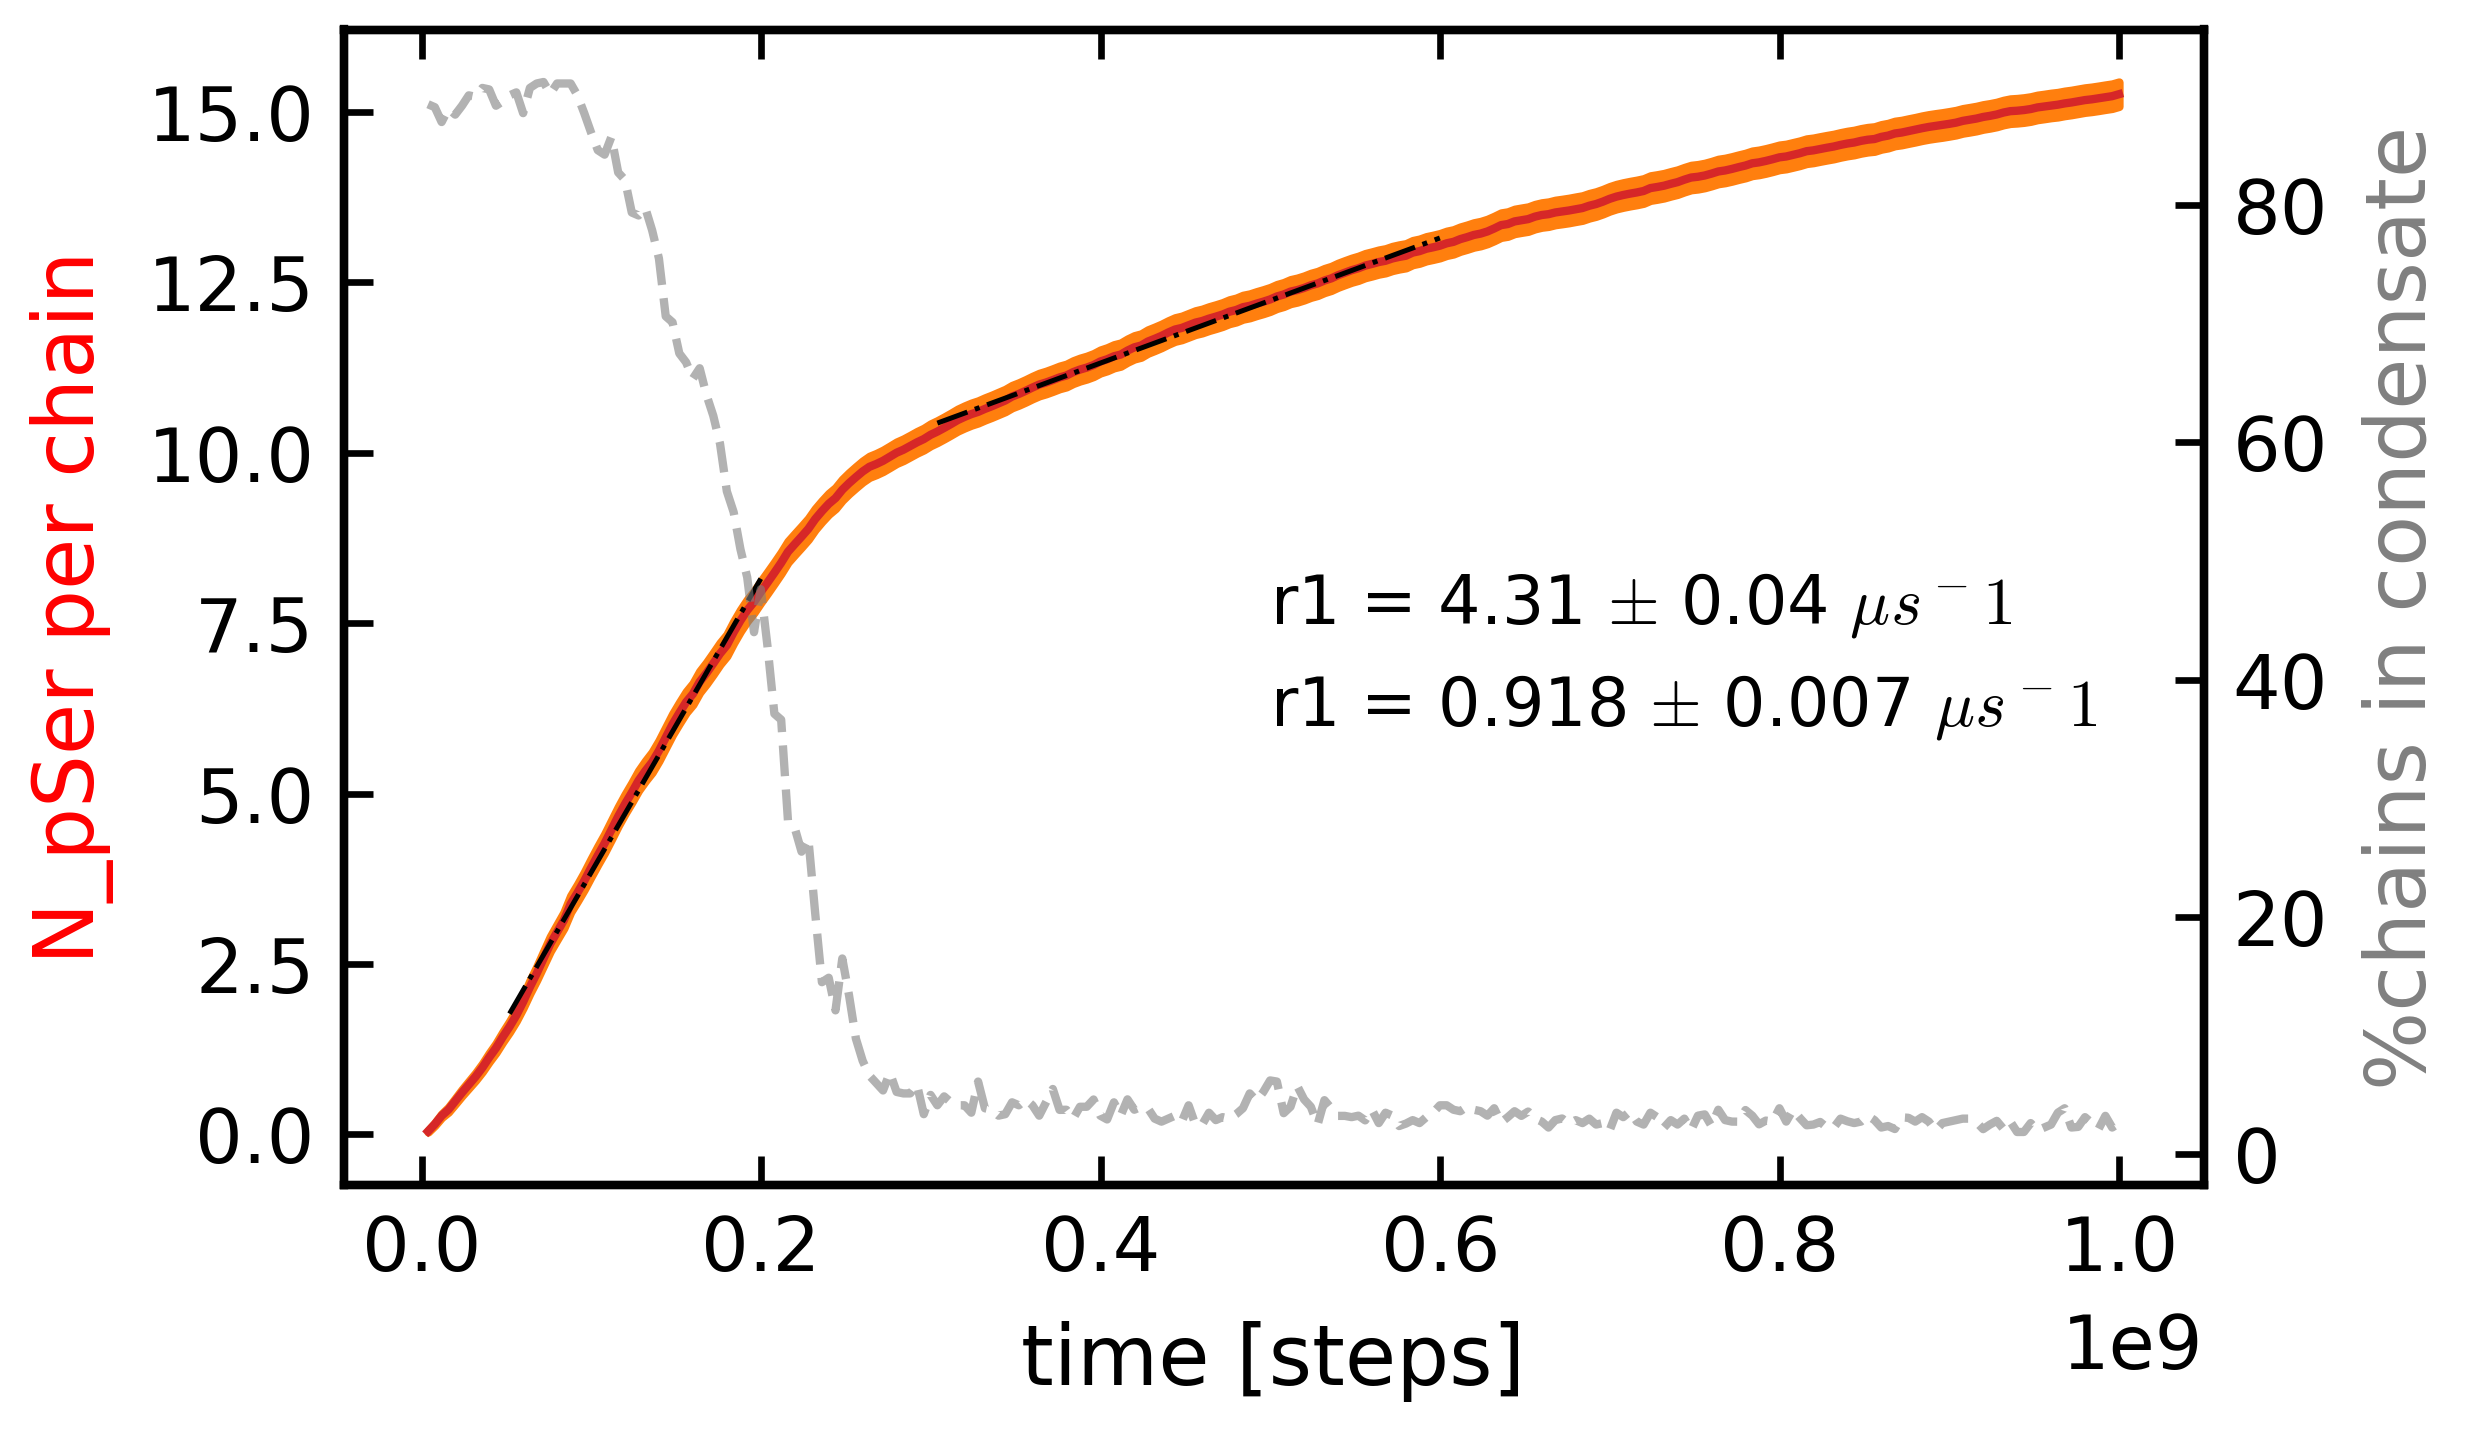

In [147]:
fig, ax1 = plt.subplots(figsize=(4, 2.5))

ax1.plot(time_0_10us, pSer_cond_p, 'tab:red', label='5 CK1d')
ax1.fill_between(time_0_10us, pSer_cond_p-d_pSer_cond_p, pSer_cond_p+d_pSer_cond_p, color='tab:orange')
ax1.plot(time_0_10us[12:50], linear(time_0_10us[12:50], *popt_p1), '-.k', lw=0.6)
ax1.plot(time_0_10us[75:150], linear(time_0_10us[75:150], *popt_p2),'-.k', lw=0.6)

ax2 = ax1.twinx()
ax2.plot(time_0_10us, nc_5ck1d, '--', color='grey', alpha=0.6)


ax1.set_xlabel('time [steps]')
ax1.set_ylabel('N_pSer per chain', color='r')
ax2.set_ylabel('%chains in condensate', color='grey')

#ax1.set_ylim(10,11.2)
#ax1.set_xlim(0.*1e9,0.6*1e9)
#ax1.legend(ncols=2, loc='lower right')
ax1.text(5*1e8, 7.5, fr'r1 = {popt_p1[0]*1e8:.2f} $\pm$ {np.sqrt(pcov_p1[0,0])*1e8:.2f} $\mu s^{-1}$', fontsize=8)
ax1.text(5*1e8, 6, fr'r1 = {popt_p2[0]*1e8:.3f} $\pm$ {np.sqrt(pcov_p2[0,0])*1e8:.3f} $\mu s^{-1}$', fontsize=8)

filename = path_drop_pl+'n_pser_in_time_200-tdp43-lcd_5-ck1d-open'
plt.savefig(filename+'.png', dpi=600)
plt.savefig(filename+'.pdf', dpi=600)

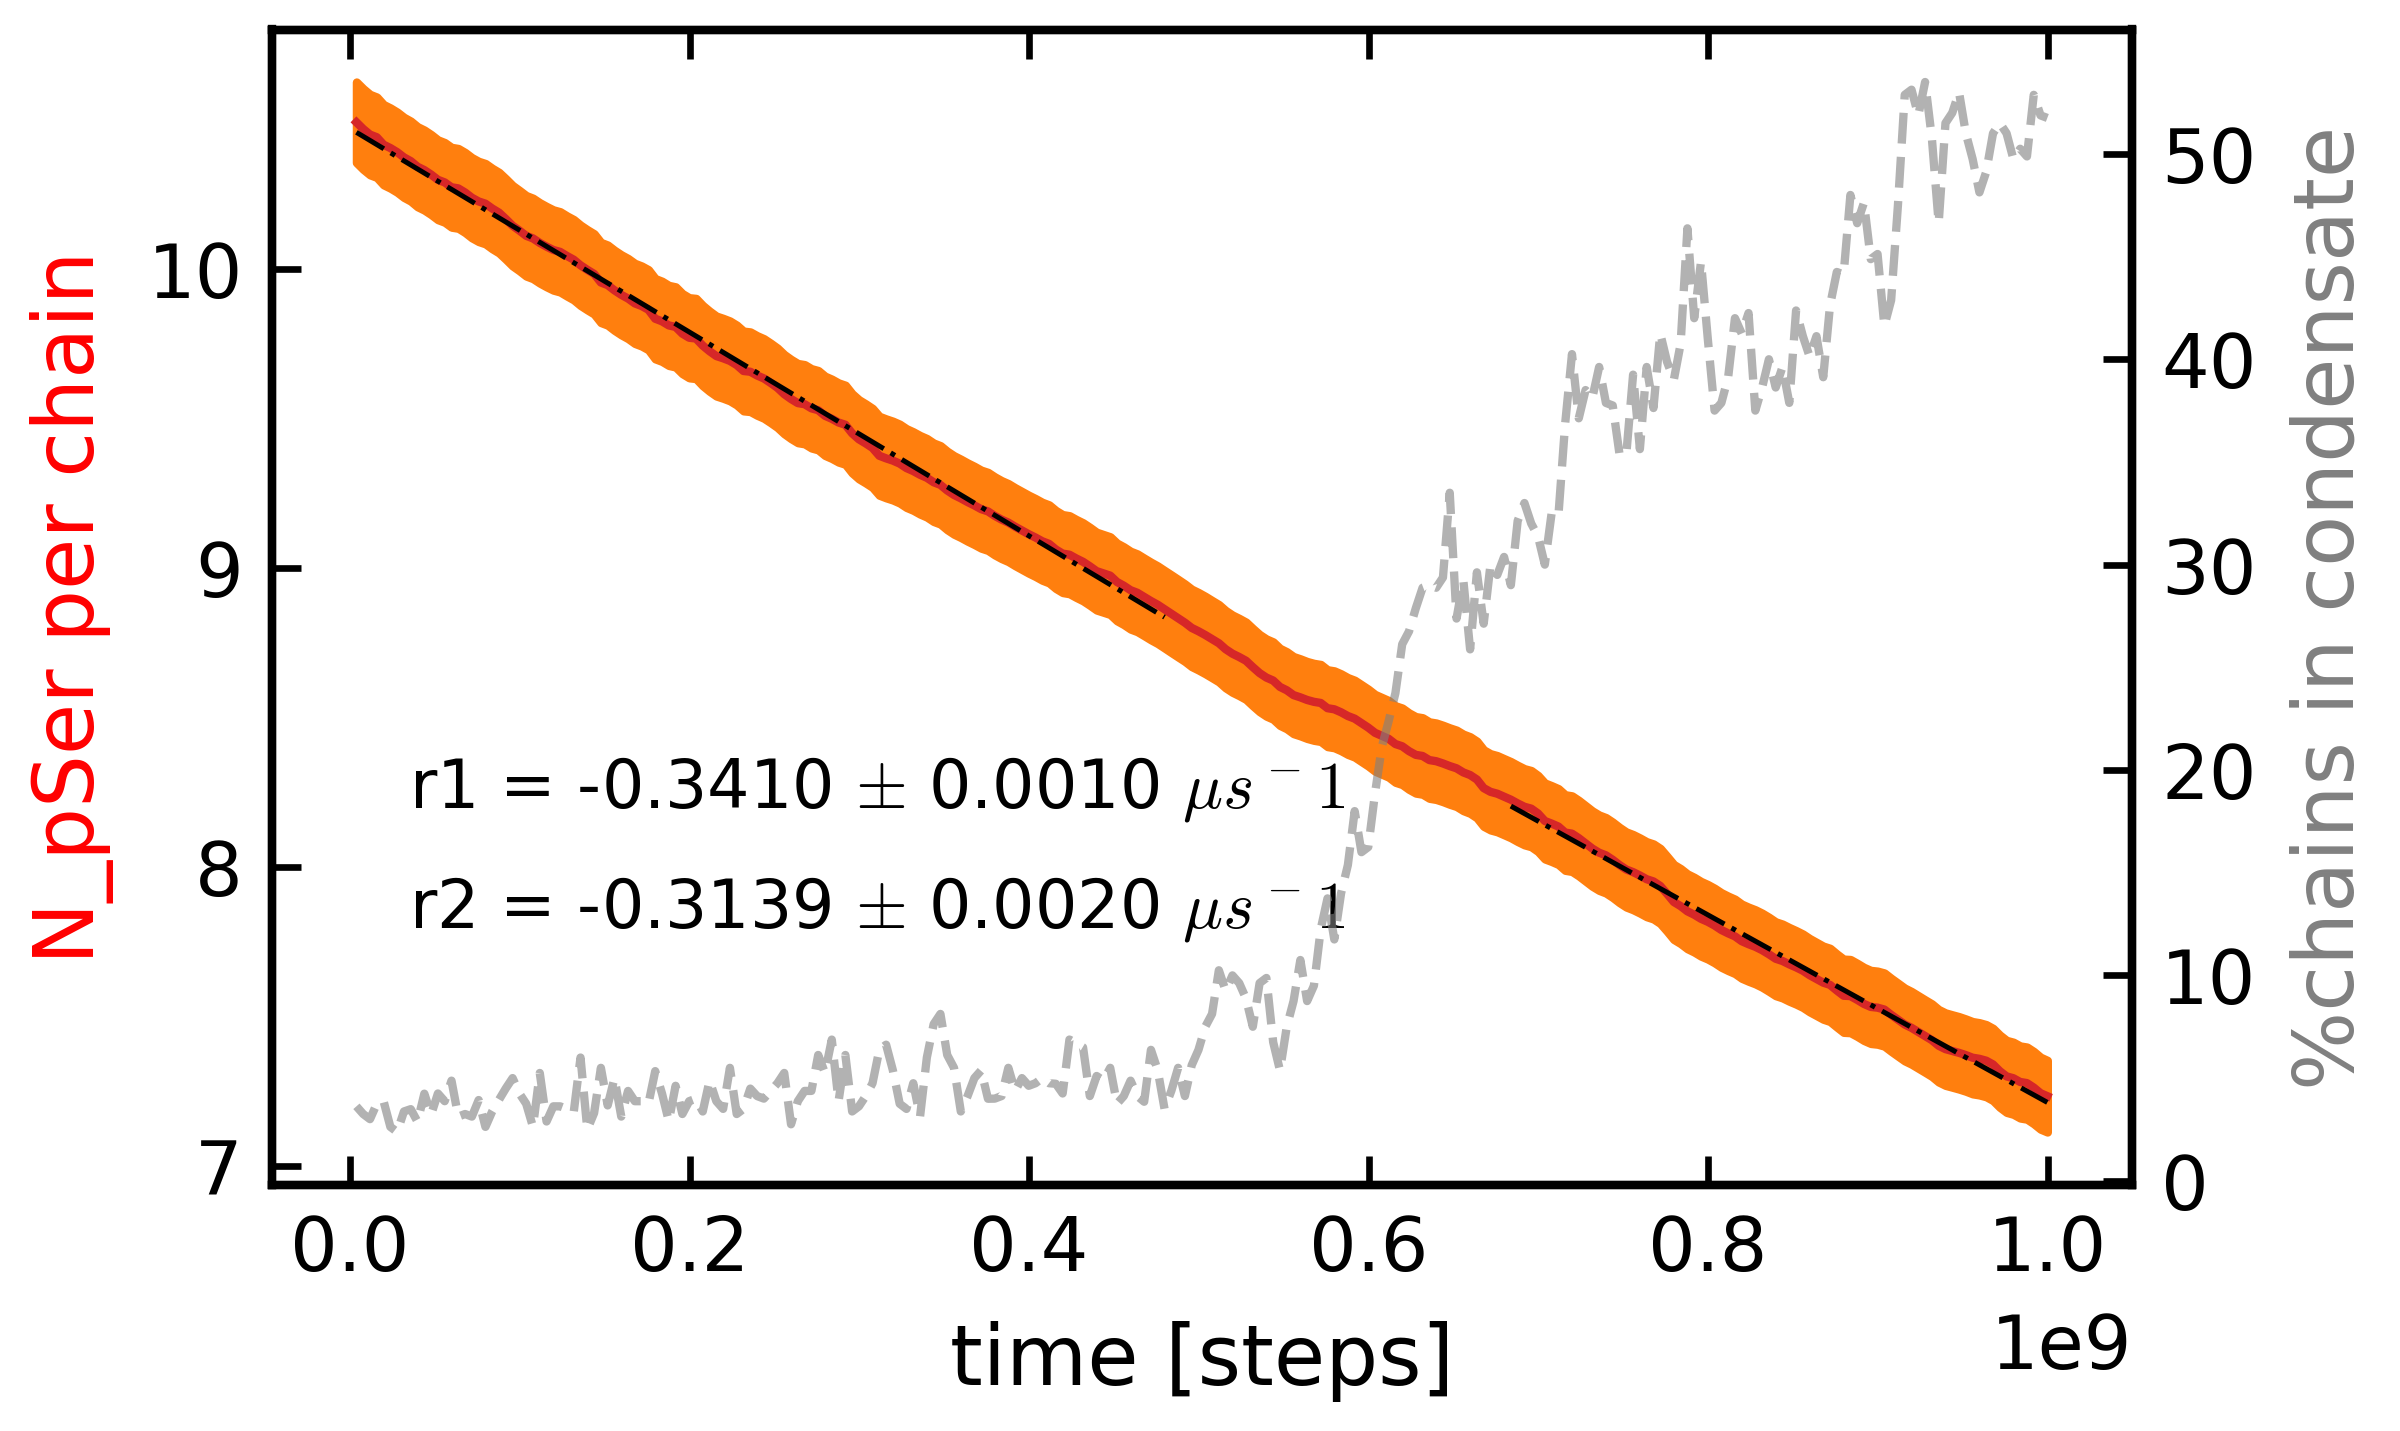

In [148]:
fig, ax1 = plt.subplots(figsize=(4, 2.5))

ax1.plot(time_0_10us, pSer_cond_dp, 'tab:red', label='5 CK1d')
ax1.fill_between(time_0_10us, pSer_cond_dp-d_pSer_cond_dp, pSer_cond_dp+d_pSer_cond_dp, color='tab:orange')
ax1.plot(time_0_10us[:120], linear(time_0_10us[:120], *popt_dp1), '-.k', lw=0.6)
ax1.plot(time_0_10us[170:], linear(time_0_10us[170:], *popt_dp2), '-.k', lw=0.6)

ax2 = ax1.twinx()
ax2.plot(time_0_10us, nc_5pp3, '--', color='grey', alpha=0.6)

ax1.set_xlabel('time [steps]')
ax1.set_ylabel('N_pSer per chain', color='r')
ax2.set_ylabel('%chains in condensate', color='grey')

#ax1.set_ylim(10,11.2)
#ax1.set_xlim(0.*1e9,0.6*1e9)
#ax1.legend(ncols=2, loc='lower right')
ax1.text(0.35*1e8, 8.2, fr'r1 = {popt_dp1[0]*1e8:.4f} $\pm$ {np.sqrt(pcov_dp1[0,0])*1e8:.4f} $\mu s^{-1}$', fontsize=8)
ax1.text(0.35*1e8, 7.8, fr'r2 = {popt_dp2[0]*1e8:.4f} $\pm$ {np.sqrt(pcov_dp2[0,0])*1e8:.4f} $\mu s^{-1}$', fontsize=8)

filename = path_drop_pl+'n_pser_in_time_200-tdp43-lcd_5-pp3'
plt.savefig(filename+'.png', dpi=600)
plt.savefig(filename+'.pdf', dpi=600)

In [143]:
rp_cond, drp_cond = hpar.count_contacts(dirpath=path_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/',  
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_contacts.txt', 
                                              ser_l=ser_i, n_sims=1, type_of_contact=1, len_prot=154, n_prot=200, max_dist=1.05, start=300000000)

rdp_cond, drdp_cond = hpar.count_contacts(dirpath=path_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/',  
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_contacts.txt', 
                                              ser_l=ser_i, n_sims=1, type_of_contact=-1, len_prot=154, n_prot=200, max_dist=1.05, start=300000000)


NameError: name 'path_200' is not defined

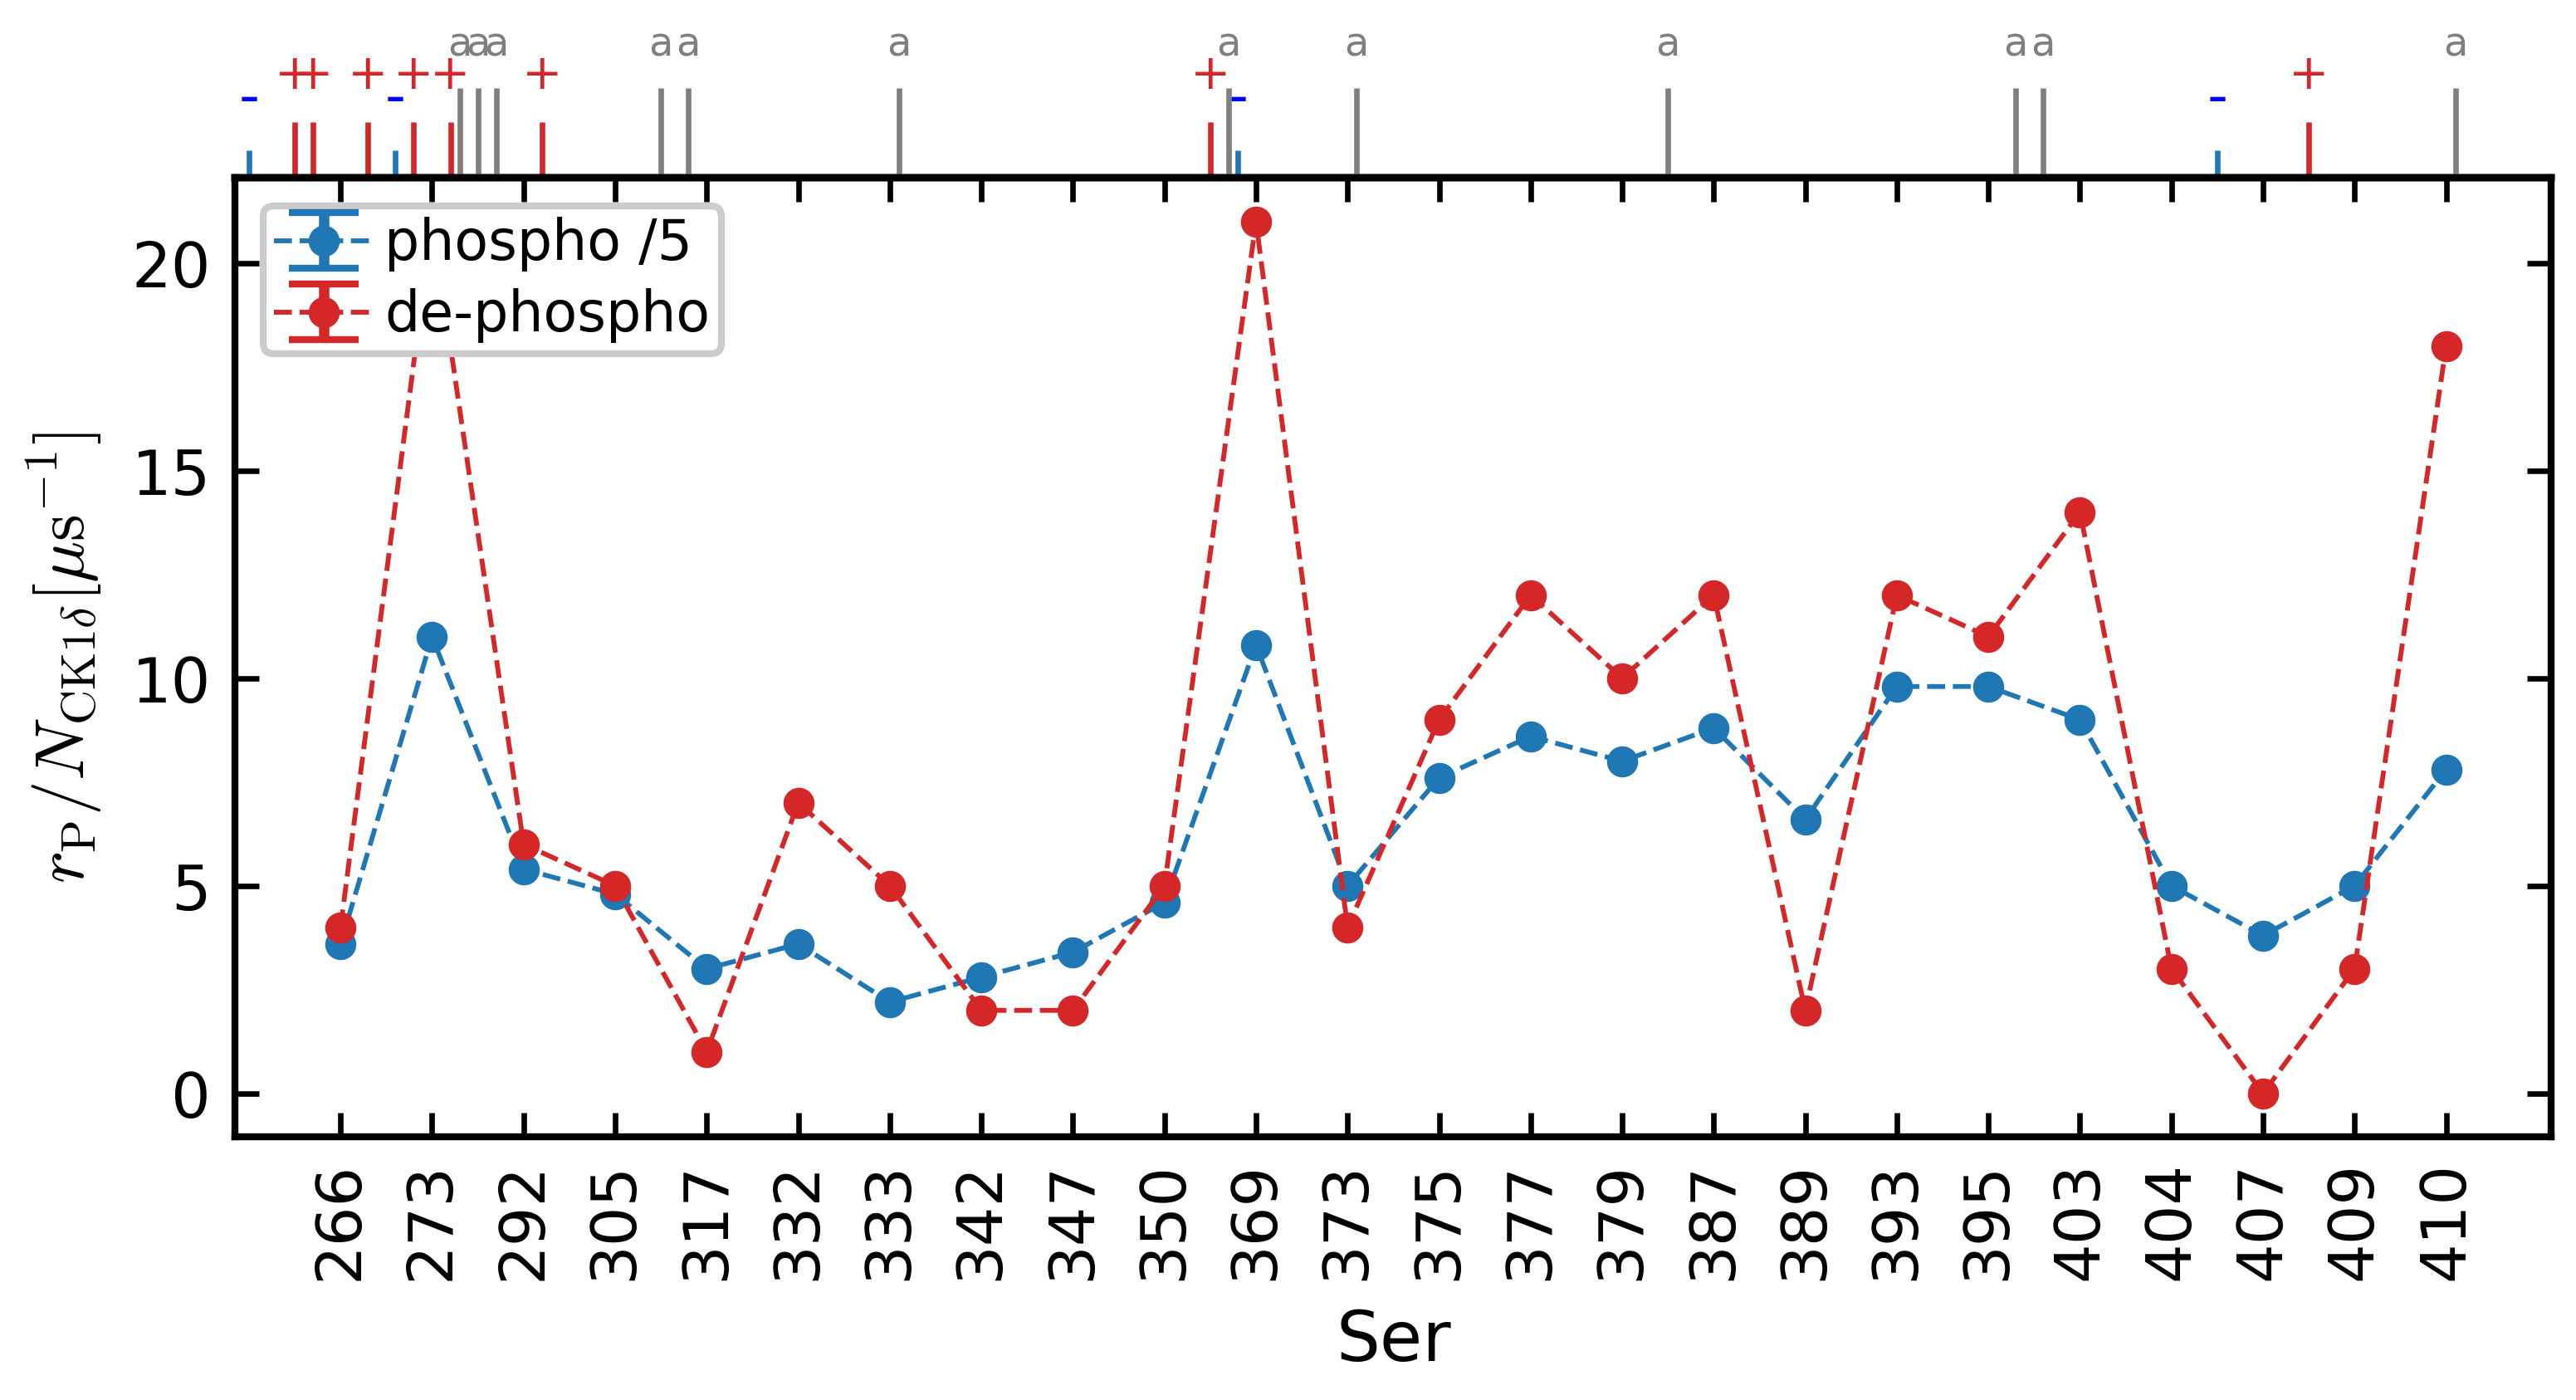

In [68]:
f, ax1 = plt.subplots(figsize=(6,2.5))

ax1.errorbar(np.arange(1,25), rp_cond/5, drp_cond, fmt='.--', color='tab:blue', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"phospho /5")
ax1.errorbar(np.arange(1,25), rdp_cond, drdp_cond, fmt='.--', color='tab:red', elinewidth=1.5, linewidth=.7, capsize=5, markersize=7,  label=r"de-phospho")

secax = ax1.secondary_xaxis('top')
secax.set_xticks([0.5, 0.7, 1.3, 1.8, 2.2, 3.2, 10.5, 22.5], ['+']*8, color='tab:red', fontsize='x-small' )
secax.tick_params(direction='out', color='tab:red' , length=8)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([0., 1.6, 10.8, 21.5], ['-']*4, color='blue', fontsize='small' )
secax2.tick_params(direction='out', color='tab:blue' , length=4)

secax2 = ax1.secondary_xaxis('top')
secax2.set_xticks([2.3,2.5,2.7,4.5, 4.8,7.1, 10.7, 12.1, 15.5, 19.3, 19.6, 24.1], ['a']*12, color='tab:grey', fontsize='xx-small' )
secax2.tick_params(direction='out', color='tab:grey' , length=13)


plt.legend(loc='upper left', framealpha=1, ncols=1)
plt.xticks(np.arange(1,25) , ser_i+261, rotation="vertical" )
plt.xlabel('Ser')
plt.ylabel('$r_{\mathrm{P}}/N_{\mathrm{CK1\delta}} [\mathrm{\mu s}^{-1}]$')
plt.show()

### Slab

In [28]:
times_7_5us = np.arange(0,3750,20)

In [34]:
pSer_slab_p, d_pSer_slab_p = hpar.pSer_per_chain(dirpath=path_slab+'sim_200-tdp43-lcd_5-ck1d-open_slab/', 
                                              file_suffix='200-tdp43-lcd_5-com-ck1d-open_CAL3_slab_dump.gsd', 
                                              n_sims=4, times=times_5us, len_prot=154, n_prot=200)


100%|█████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 56.26it/s]


In [35]:
pSer_slab_dp, d_pSer_slab_dp = hpar.pSer_per_chain(dirpath=path_slab+'sim_200-tdp43-lcd_5-pp3_slab/', 
                                              file_suffix='200-tdp43-lcd-2100pser_5-com-pp3_CAL3_slab_dump.gsd', 
                                              n_sims=4, times=times_5us, len_prot=154, n_prot=200)


100%|█████████████████████████████████████████████████████████████████| 125/125 [00:02<00:00, 52.08it/s]


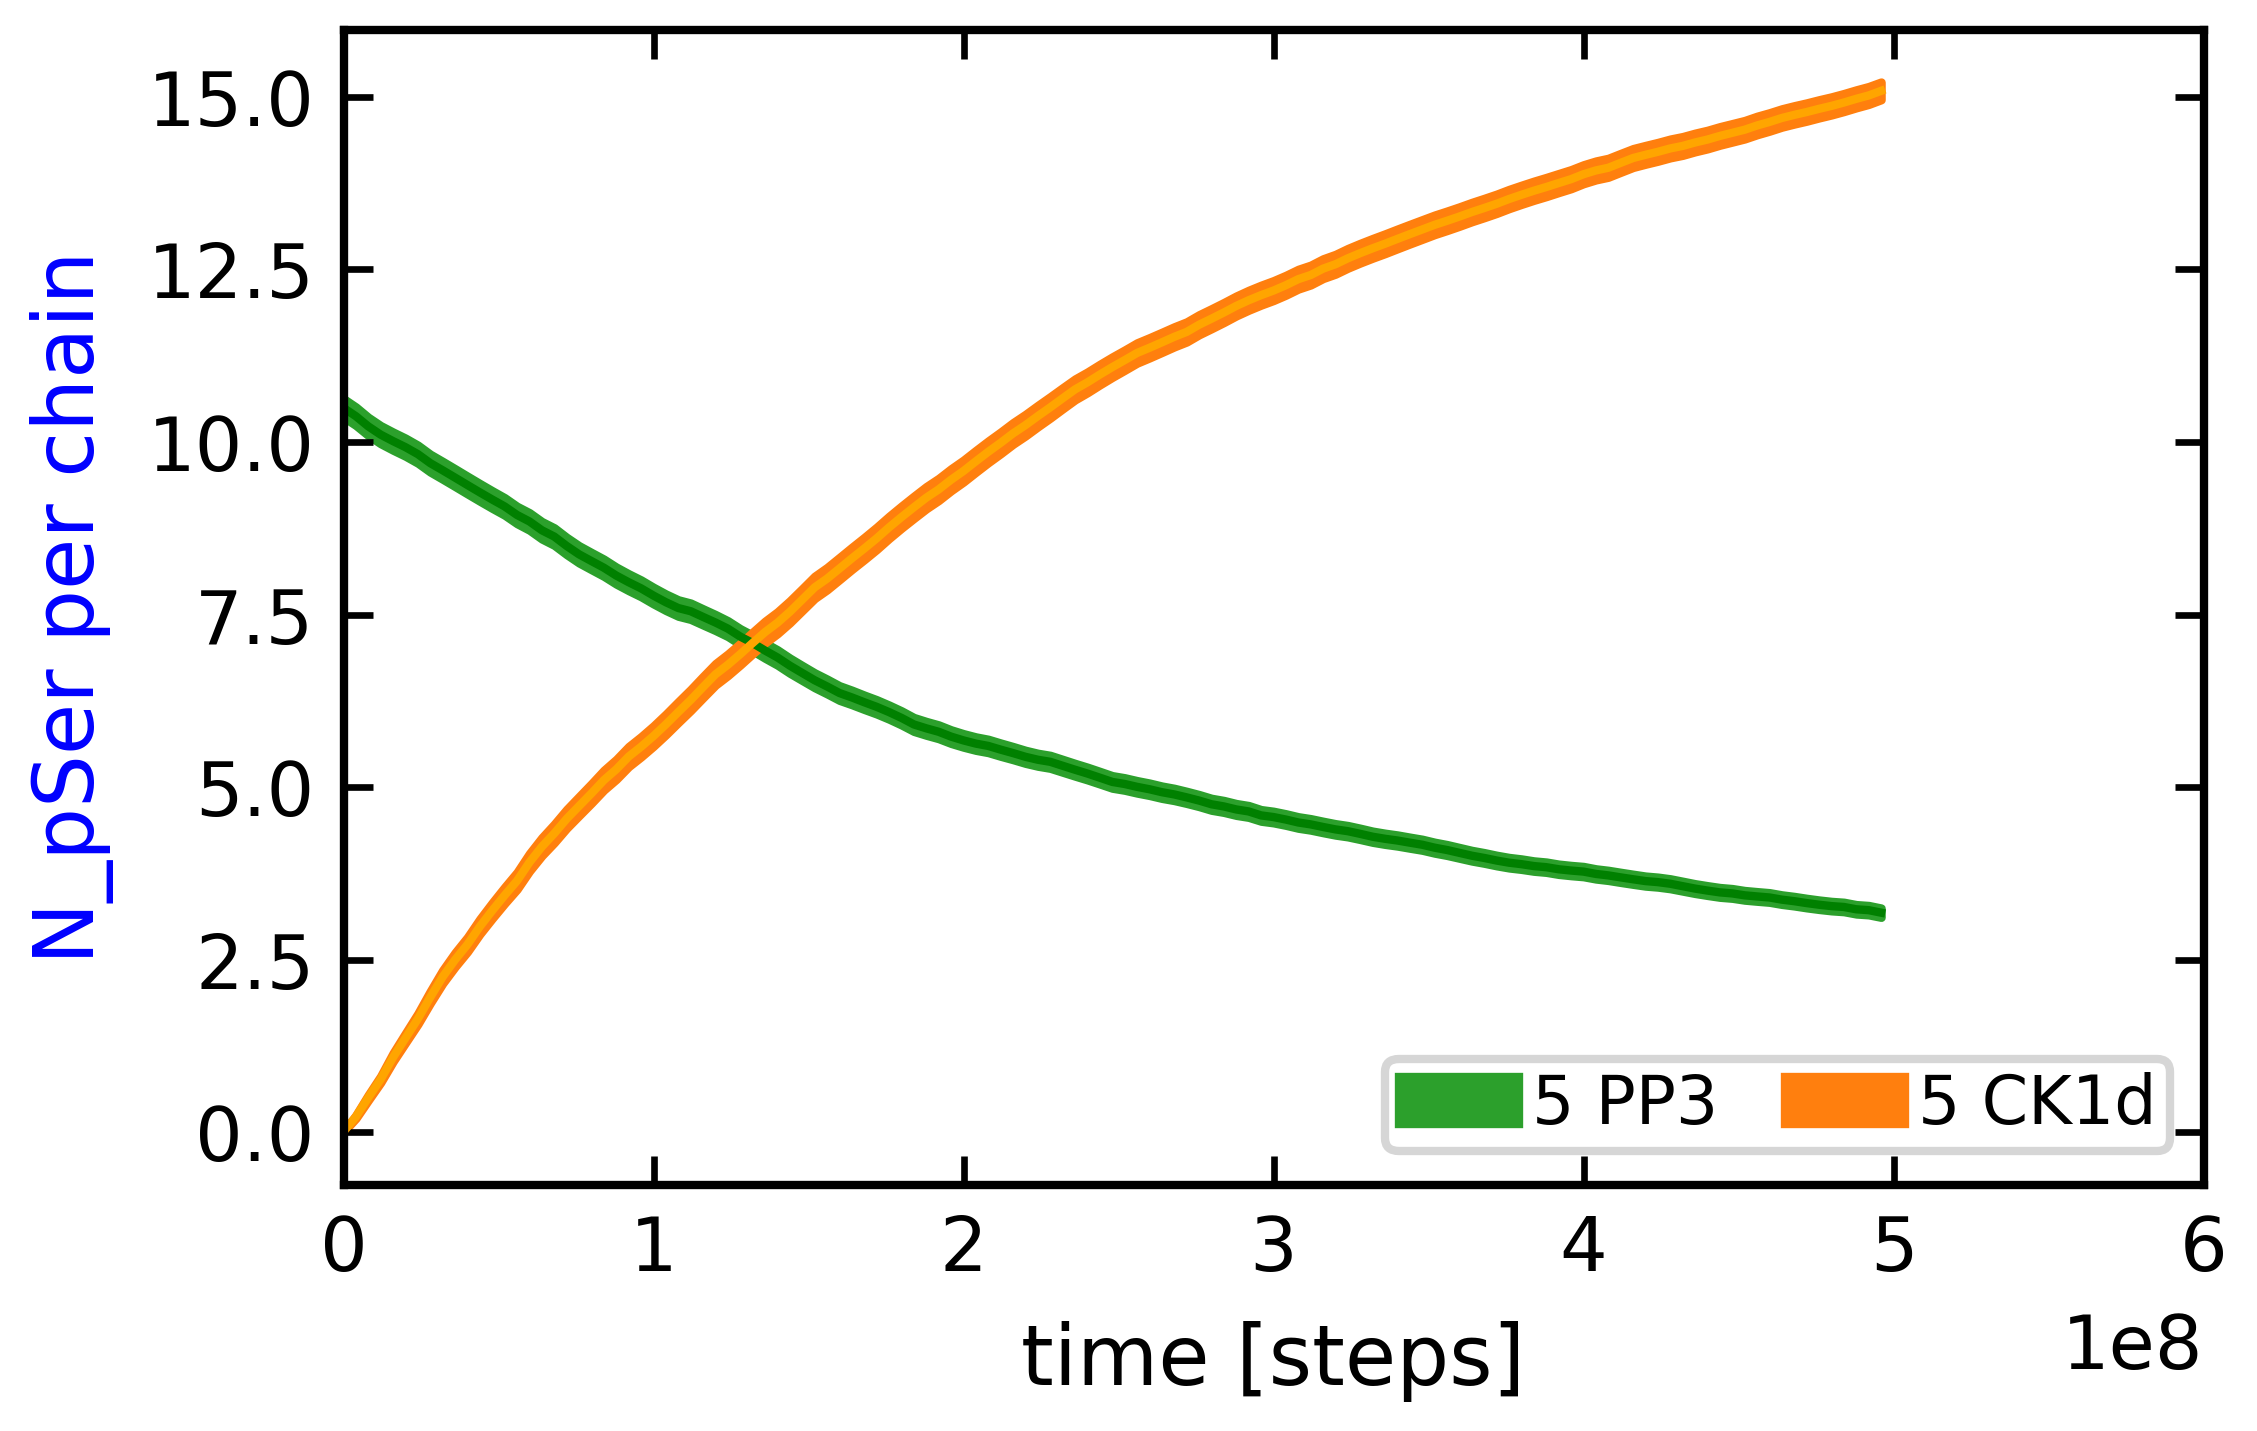

In [40]:
time_0_5us = times_5us*200000
time_0_75us = times_7_5us*200000

fig, ax1 = plt.subplots(figsize=(4, 2.5))

ax1.plot(time_0_5us, pSer_slab_dp, 'green')
ax1.fill_between(time_0_5us, pSer_slab_dp-d_pSer_slab_dp, pSer_slab_dp+d_pSer_slab_dp, color='tab:green', label='5 PP3')
#ax1.plot(time_5_10us, pSer_cond_dp_5us, 'green')
#ax1.fill_between(time_5_10us, pSer_cond_dp_5us-d_pSer_cond_dp_5us, pSer_cond_dp_5us+d_pSer_cond_dp_5us, color='tab:green')
#ax1.plot(time_10_125us[:50], pSer_cond_dp_10us, 'green')
#ax1.fill_between(time_10_125us[:50], pSer_cond_dp_10us-d_pSer_cond_dp_10us, pSer_cond_dp_10us+d_pSer_cond_dp_10us, color='tab:green')
ax1.plot(time_0_5us, pSer_slab_p, 'orange')
ax1.fill_between(time_0_5us, pSer_slab_p-d_pSer_slab_p, pSer_slab_p+d_pSer_slab_p, color='tab:orange', label='5 CK1d')

ax1.set_xlabel('time [steps]')
ax1.set_ylabel('N_pSer per chain', color='b')

#ax1.set_ylim(10,11.2)
ax1.set_xlim(0.*1e9,0.6*1e9)
ax1.legend(ncols=2, loc='lower right')

filename = '/localscratch/zippoema/project_ness/plots/slab_200-tdp43-lcd/n_pser_in_time_slab'
plt.savefig(filename+'.png', dpi=600)
plt.savefig(filename+'.pdf', dpi=600)

### Search steady state

In [25]:
times_ss = np.arange(0,5000,20)
len(times_ss)


250

In [27]:
pSer_20_1_4, d_pSer_20_1_4 = hpar.pSer_per_chain(dirpath=path_ss+'search_20-tdp43-lcd_1-ck1d-open_4-pp3/', 
                                              file_suffix='20-tdp43-lcd_1-com-ck1d-open_4-com-pp3_search_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_ss, len_prot=154, n_prot=20)


/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),
100%|████████████████████████████████████████████████████████████████| 250/250 [00:01<00:00, 145.15it/s]


In [28]:
pSer_20_2_2, d_pSer_20_2_2 = hpar.pSer_per_chain(dirpath=path_ss+'search_20-tdp43-lcd_2-ck1d-open_2-pp3/', 
                                              file_suffix='20-tdp43-lcd_2-com-ck1d-open_2-com-pp3_search_dump.gsd', 
                                              ser_l=ser_i, n_sims=5, times=times_ss, len_prot=154, n_prot=20)


100%|████████████████████████████████████████████████████████████████| 250/250 [00:02<00:00, 114.95it/s]


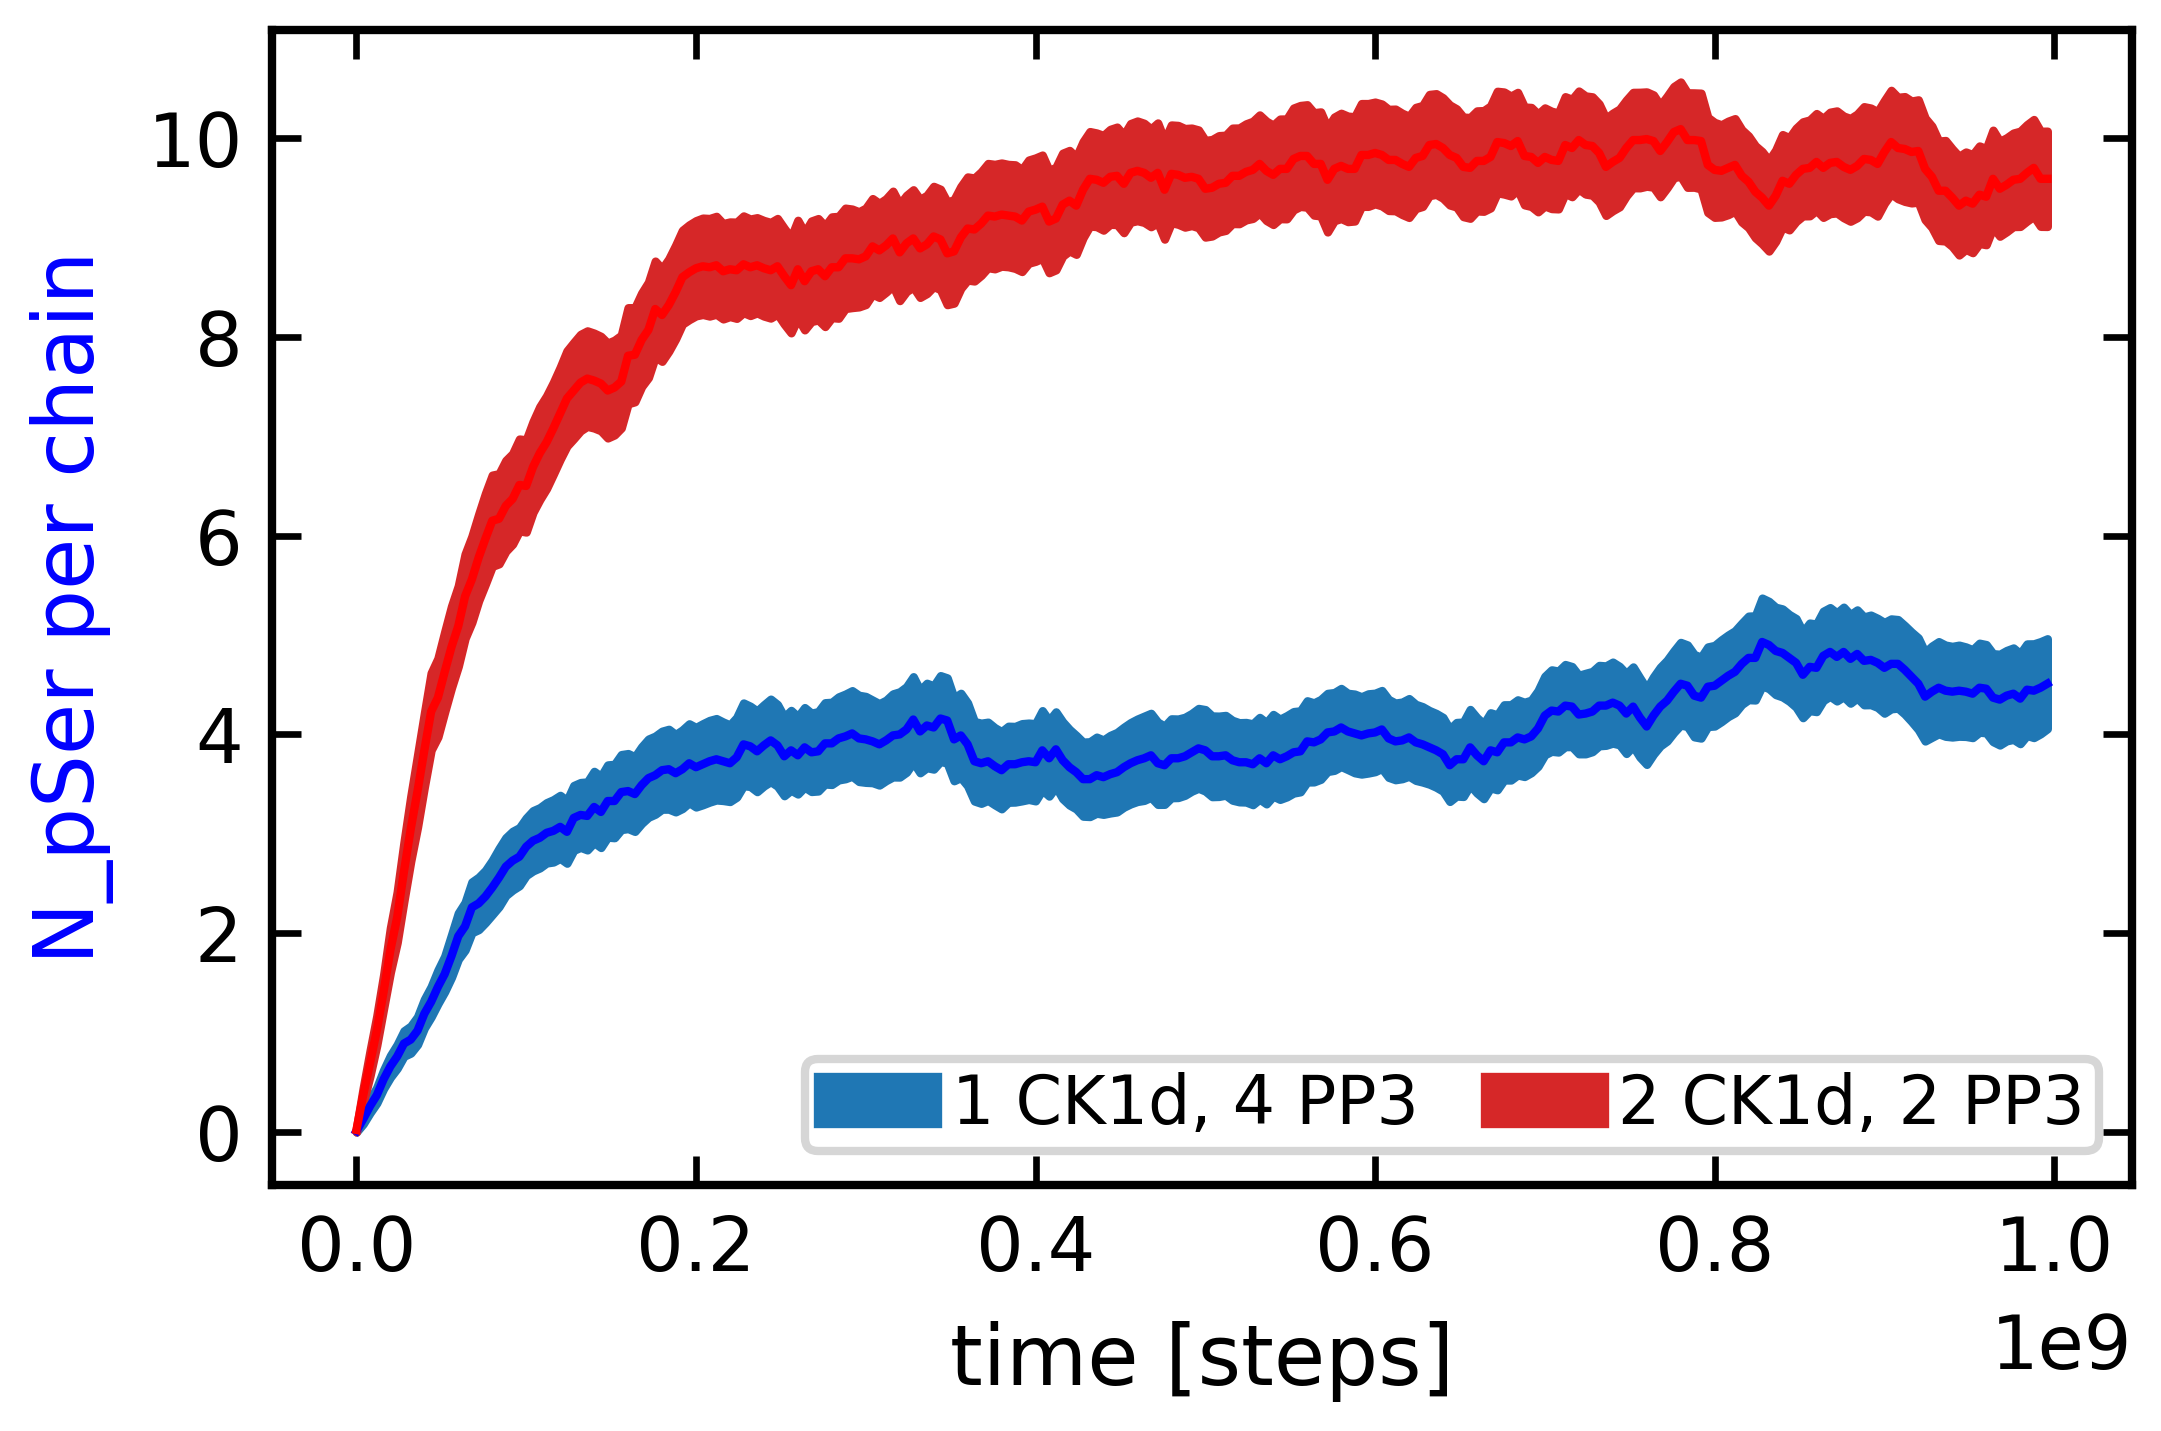

In [29]:
time_step_ss = times_ss*200000 

fig, ax1 = plt.subplots(figsize=(4, 2.5))

# Plot the first array with the primary y-axis
ax1.plot(time_step_ss, pSer_20_1_4, 'b')
ax1.fill_between(time_step_ss, pSer_20_1_4-d_pSer_20_1_4, pSer_20_1_4+d_pSer_20_1_4, color='tab:blue', label='1 CK1d, 4 PP3')
ax1.plot(time_step_ss, pSer_20_2_2, 'r')
ax1.fill_between(time_step_ss, pSer_20_2_2-d_pSer_20_2_2, pSer_20_2_2+d_pSer_20_2_2, color='tab:red', label='2 CK1d, 2 PP3')

ax1.set_xlabel('time [steps]')
ax1.set_ylabel('N_pSer per chain', color='b')

#ax1.set_ylim(3,5)
#ax1.set_xlim(2*1e8,10*1e8)
ax1.legend(ncols=2, loc='lower right')
filename = '/localscratch/zippoema/project_ness/plots/2-tdp43-lcd_1-ck1d-open_1-pp3/n_pser_in_time_20-tdp43'
plt.savefig(filename+'.png', dpi=600)
plt.savefig(filename+'.pdf', dpi=600)

## Reaching equilibrium

In [34]:
pSer_slab_2_10, d_pSer_slab_2_10 = hpar.pSer_per_chain(dirpath=path_work+'no_driving_slab/init_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/', 
                                              file_suffix='eq_slab_200-tdp43-lcd_2-com-ck1d-open_10-com-pp3_CAL3__dump.gsd', 
                                              ser_l=ser_i, n_sims=1, times=times_5us, len_prot=154, n_prot=20)

pSer_slab_2_10_5us, d_pSer_slab_2_10_5us = hpar.pSer_per_chain(dirpath=path_work+'no_driving_slab/init_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/', 
                                              file_suffix='eq_slab_200-tdp43-lcd_2-com-ck1d-open_10-com-pp3_CAL3_5us_dump.gsd', 
                                              ser_l=ser_i, n_sims=1, times=times_2_5us, len_prot=154, n_prot=20)


100%|█████████████████████████████████████████████████████████████████████| 63/63 [00:01<00:00, 50.39it/s]


In [ ]:
(rp_k, drp_k), (rp_p, drp_p) = hpar.count_contacts(dirpath=path_work+'no_driving_slab/init_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/', 
                                              file_suffix='eq_slab_200-tdp43-lcd_2-com-ck1d-open_10-com-pp3_CAL3_5us_contacts.txt', 
                                              ser_l=ser_i, n_sims=1, type_of_contact=1, len_prot=154, n_prot=200, max_dist=1.05, nenz=2, start=200000000)


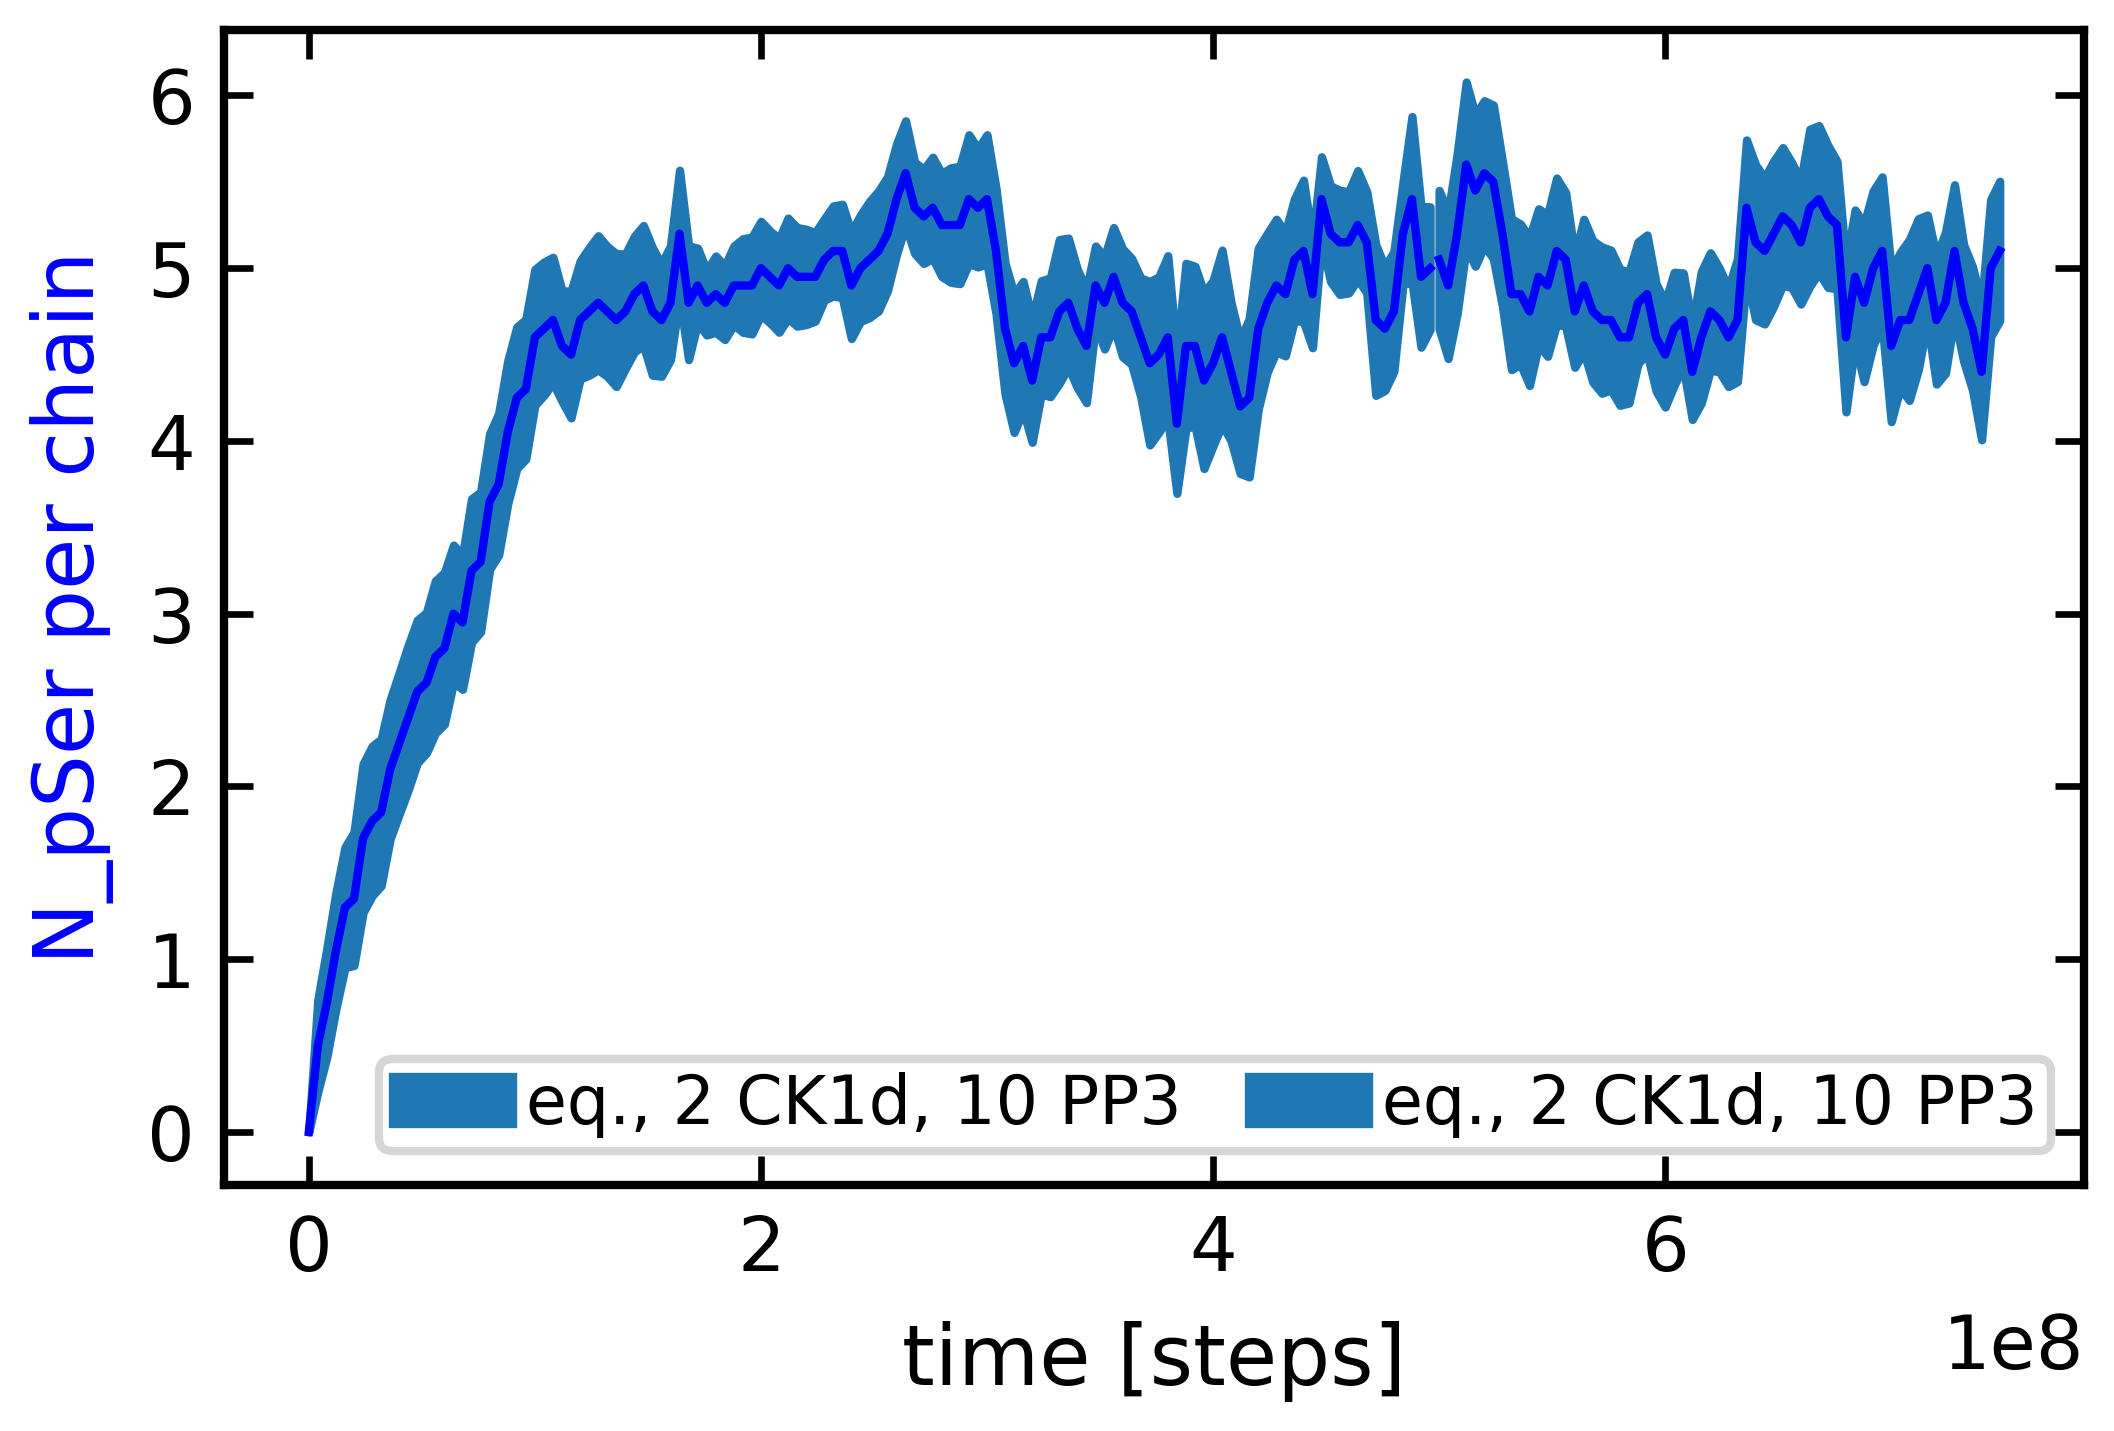

In [35]:
time_0_5us = times_5us*200000
time_5_75us = times_2_5us*200000 + 5*1e8

fig, ax1 = plt.subplots(figsize=(4, 2.5))

# Plot the first array with the primary y-axis
ax1.plot(time_0_5us, pSer_slab_2_10, 'b')
ax1.fill_between(time_0_5us, pSer_slab_2_10-d_pSer_slab_2_10, pSer_slab_2_10+d_pSer_slab_2_10, color='tab:blue', label='eq., 2 CK1d, 10 PP3')
ax1.plot(time_5_75us, pSer_slab_2_10_5us, 'b')
ax1.fill_between(time_5_75us, pSer_slab_2_10_5us-d_pSer_slab_2_10_5us, pSer_slab_2_10_5us+d_pSer_slab_2_10_5us, color='tab:blue', label='eq., 2 CK1d, 10 PP3')

ax1.set_xlabel('time [steps]')
ax1.set_ylabel('N_pSer per chain', color='b')

#ax1.set_ylim(3,5)
#ax1.set_xlim(2*1e8,10*1e8)
ax1.legend(ncols=2, loc='lower right')